In [410]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [411]:
companies = [
    "SAP", "IBM", "WDAY", "ADP", "ACN",  # Technology
    "NXPI", "STM", "ADI", "ON", "MCHP", "LSCC", "COHR", "AEIS", "ENTG",  # Semiconductors & Software
    "BX", "KKR", "STT", "AMP", "PNC", "CFG", "BK", "NTRS", "FITB",  # Financials
    "UL", "PDD", "JD", "BABA", "SBUX", "YUM", "ROST", "M", "KSS",  # Consumer Discretionary & Retail
    "ZTS", "DHR", "BDX", "SYK", "BSX", "STE", "MTD", "BIO",  # Healthcare
    "TAP", "KMB", "GIS", "HRL", "MDLZ", "LW", "MNST",  # Consumer Staples
]


In [417]:
companies = [
    "OKTA", "DOCU", "CDNS", "ANSS", "TTD",  # Technology
    "ICE", "AJG", "PGR", "CINF", "ALL",     # Financials
    "HES", "MPC", "CLR", "FTI", "WMB",      # Energy
    "ES", "XEL", "WEC", "PEG", "DTE",       # Utilities
    "LVS", "MGM", "HOG", "BBBY", "DHI",     # Consumer Discretionary
    "UPS", "FDX", "ROK", "ETN", "SWK"       # Industrials
]


In [392]:
companies = ['DJT']

In [418]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [419]:
def scale_data(uncscaled_data):
       price_columns = ['Open', 'High', 'Low', 'Close']
       technical_indicators = ['SMA15', 'EMA5',
              'RSI15', 'BB_upper', 'BB_lower', 'MACD', 'MACD_signal', 'OBV', 'ADX',
              'Aroon_Up', 'Aroon_Down']
       volume_column = 'Volume'
       
       for col in price_columns:
              uncscaled_data = remove_outliers(uncscaled_data, col)
       
       min_max_scaler = MinMaxScaler()
       standard_scaler = StandardScaler()
       standard_scaler_close = StandardScaler()

       price_columns.pop()

       uncscaled_data[price_columns] = standard_scaler.fit_transform(uncscaled_data[price_columns])

       uncscaled_data[volume_column] = np.log1p(uncscaled_data[volume_column])  
       uncscaled_data[[volume_column]] = standard_scaler.fit_transform(uncscaled_data[[volume_column]])

       uncscaled_data[technical_indicators] = standard_scaler.fit_transform(uncscaled_data[technical_indicators])

       return uncscaled_data



In [ ]:
def calculate_tech_ind(curr, data):

    data['SMA15'] = ta.sma(curr['Close'], length=15)  # Simple Moving Average
    data['EMA5'] = ta.ema(curr['Close'], length=5)    # Exponential Moving Average
    data['RSI15'] = ta.rsi(curr['Close'], length=15)  # Relative Strength Index

    # Bollinger Bands: Measures volatility with a moving average and standard deviations
    data['BB_upper'], data['BB_lower'] = ta.bbands(curr['Close'], length=56, std=2).iloc[:, [0, 2]].T.values

    # MACD and Signal Line: Trend-following momentum indicator
    data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values

    # On-Balance Volume: Volume-based trend indicator
    data['OBV'] = ta.obv(curr['Close'], curr['Volume'])

    # ADX (Average Directional Index): Measures trend strength
    data['ADX'] = ta.adx(curr['High'], curr['Low'], curr['Close']).iloc[:, 0]

    # Aroon Oscillator: Identifies trend direction and strength
    data['Aroon_Up'], data['Aroon_Down'] = ta.aroon(curr['High'], curr['Low']).iloc[:, [0, 1]].T.values
    
    uncleaned_data = pd.concat([curr, data], axis = 0)

    uncleaned_data = uncleaned_data.iloc[14:, :]

    uncleaned_data.fillna(method='ffill', inplace=True)

    uncleaned_data.fillna(method='bfill', inplace=True)

    scaled_data = scale_data(uncleaned_data)

    return scaled_data

In [421]:
from joblib import load

loaded_model = load('model_reg.joblib')

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  OKTA 

Mean Squared Error: 0.022453346784986304
Root Mean Squared Error (RMSE): 0.14984440858766238
R-squared: 0.9775466532150137
Mean Squared Error: 0.022453346784986304
Root Mean Squared Error (RMSE): 0.14984440858766238
Mean Squared Error: 2.8009920713072924
Root Mean Squared Error (RMSE): 1.673616464817221
R-squared: 0.9775466532150137


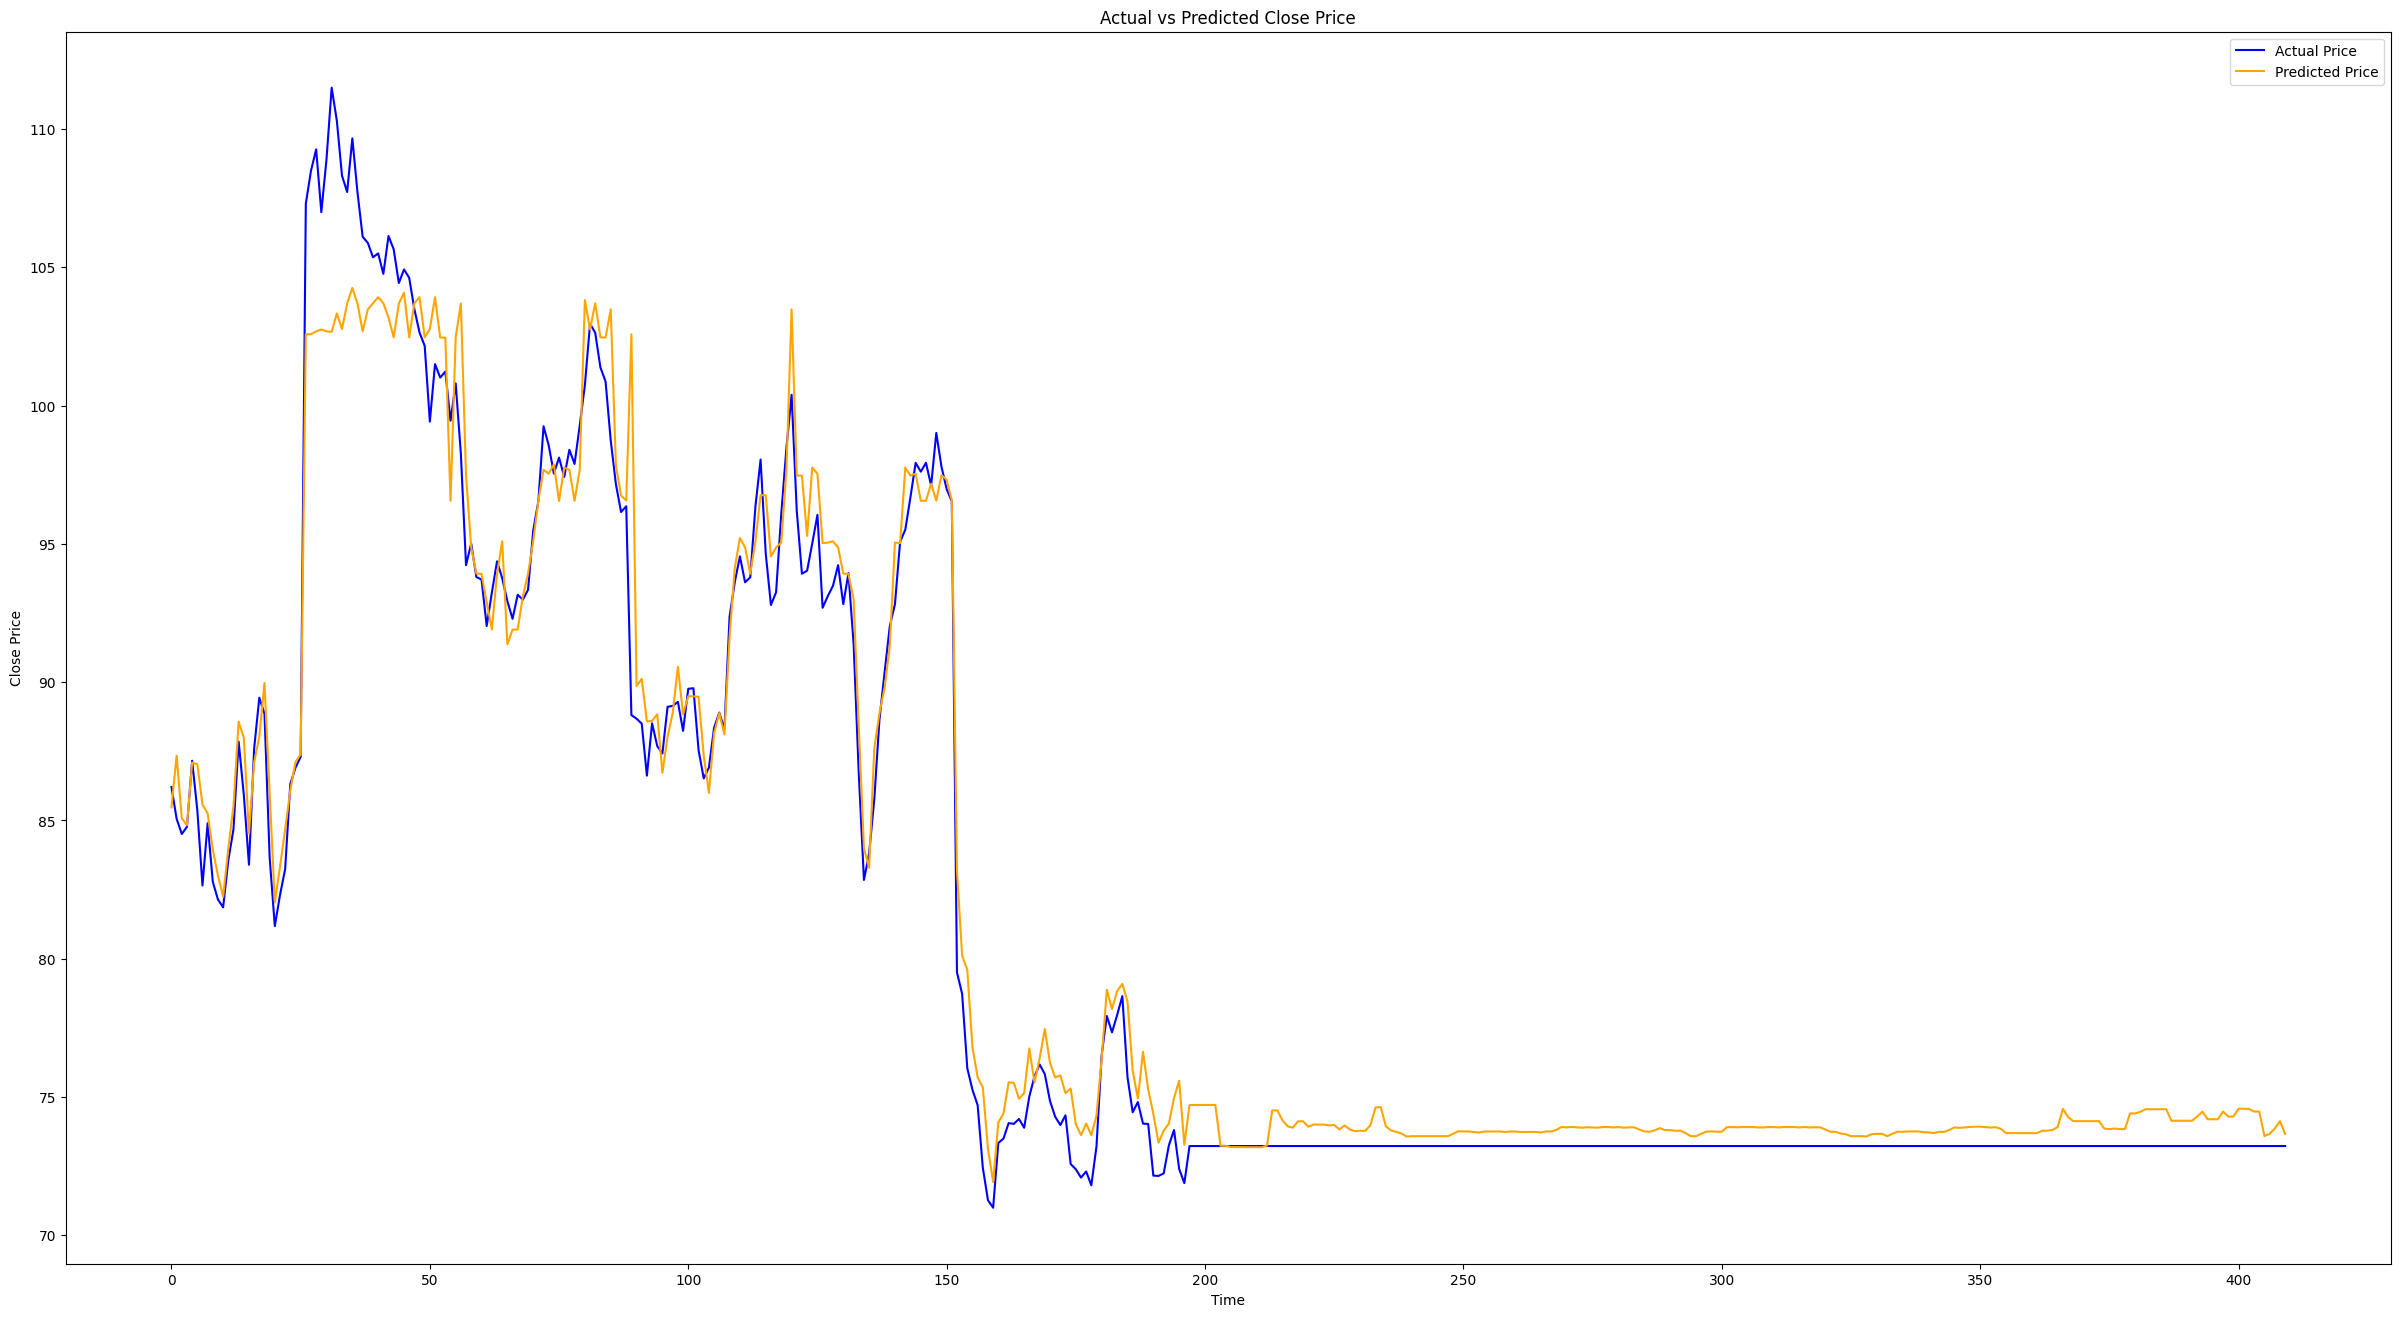

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  DOCU 

Mean Squared Error: 0.008867601607372159
Root Mean Squared Error (RMSE): 0.09416794362930603
R-squared: 0.9911323983926278
Mean Squared Error: 0.008867601607372159
Root Mean Squared Error (RMSE): 0.09416794362930603
Mean Squared Error: 0.5216170699801296
Root Mean Squared Error (RMSE): 0.7222306210485191
R-squared: 0.9911323983926278


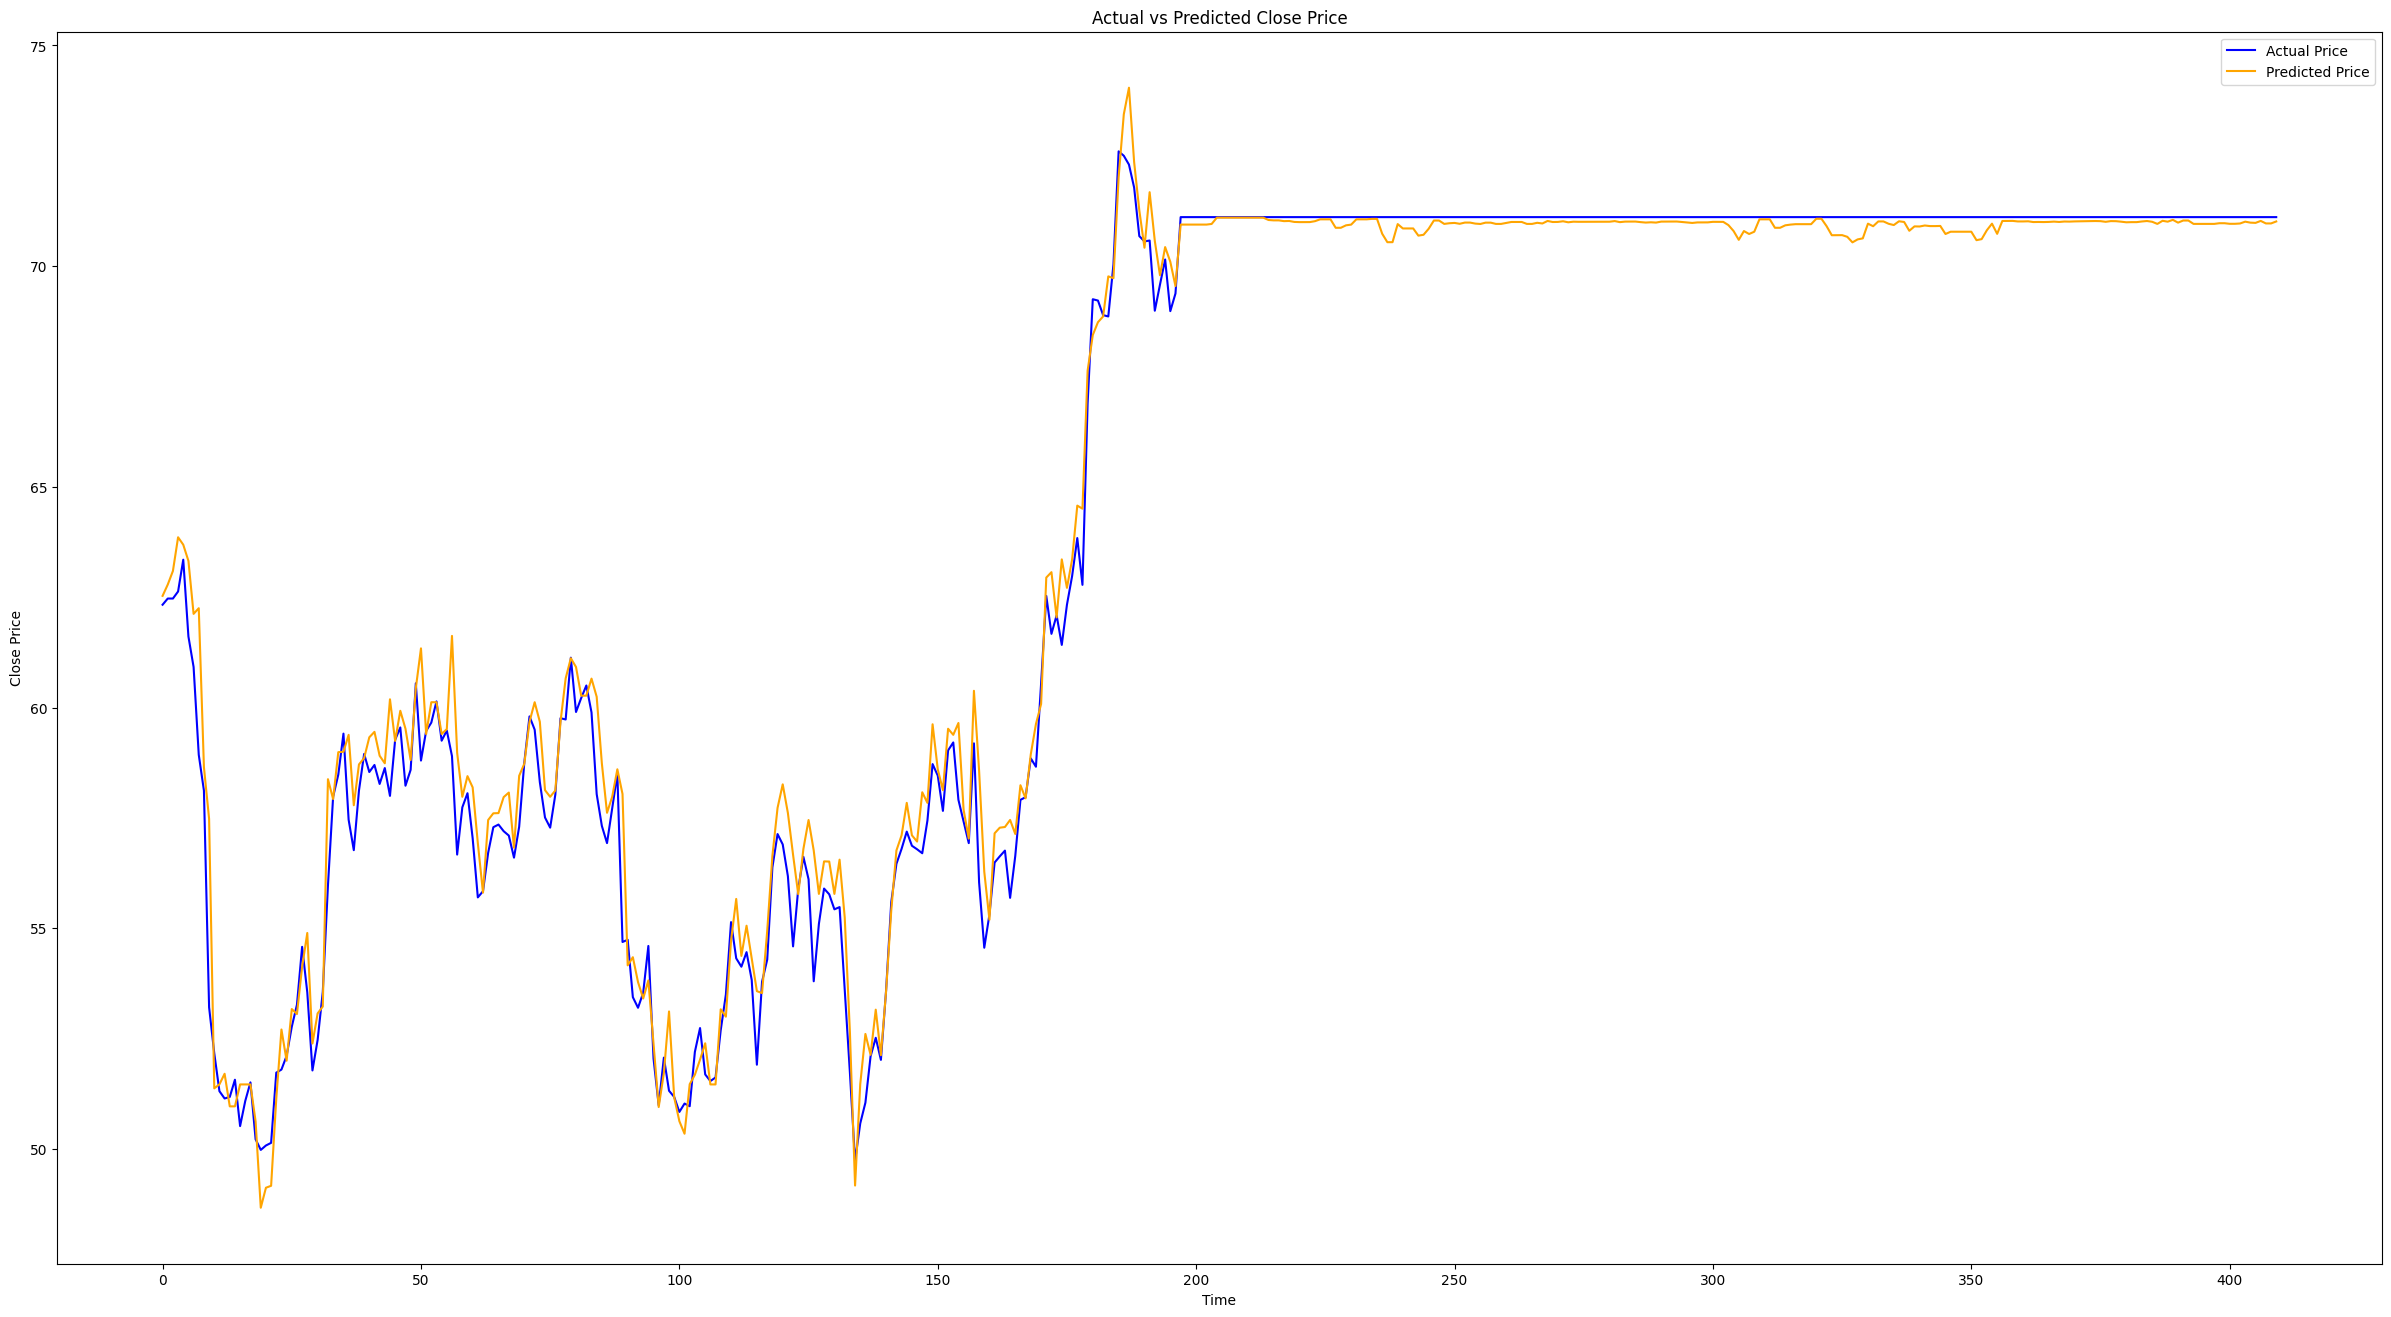

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  CDNS 

Mean Squared Error: 8.245547917940485e-05
Root Mean Squared Error (RMSE): 0.009080499941049768
R-squared: 0.0
Mean Squared Error: 8.245547917940485e-05
Root Mean Squared Error (RMSE): 0.009080499941049768
Mean Squared Error: 8.245034169563106e-05
Root Mean Squared Error (RMSE): 0.009080217051129949
R-squared: 0.0


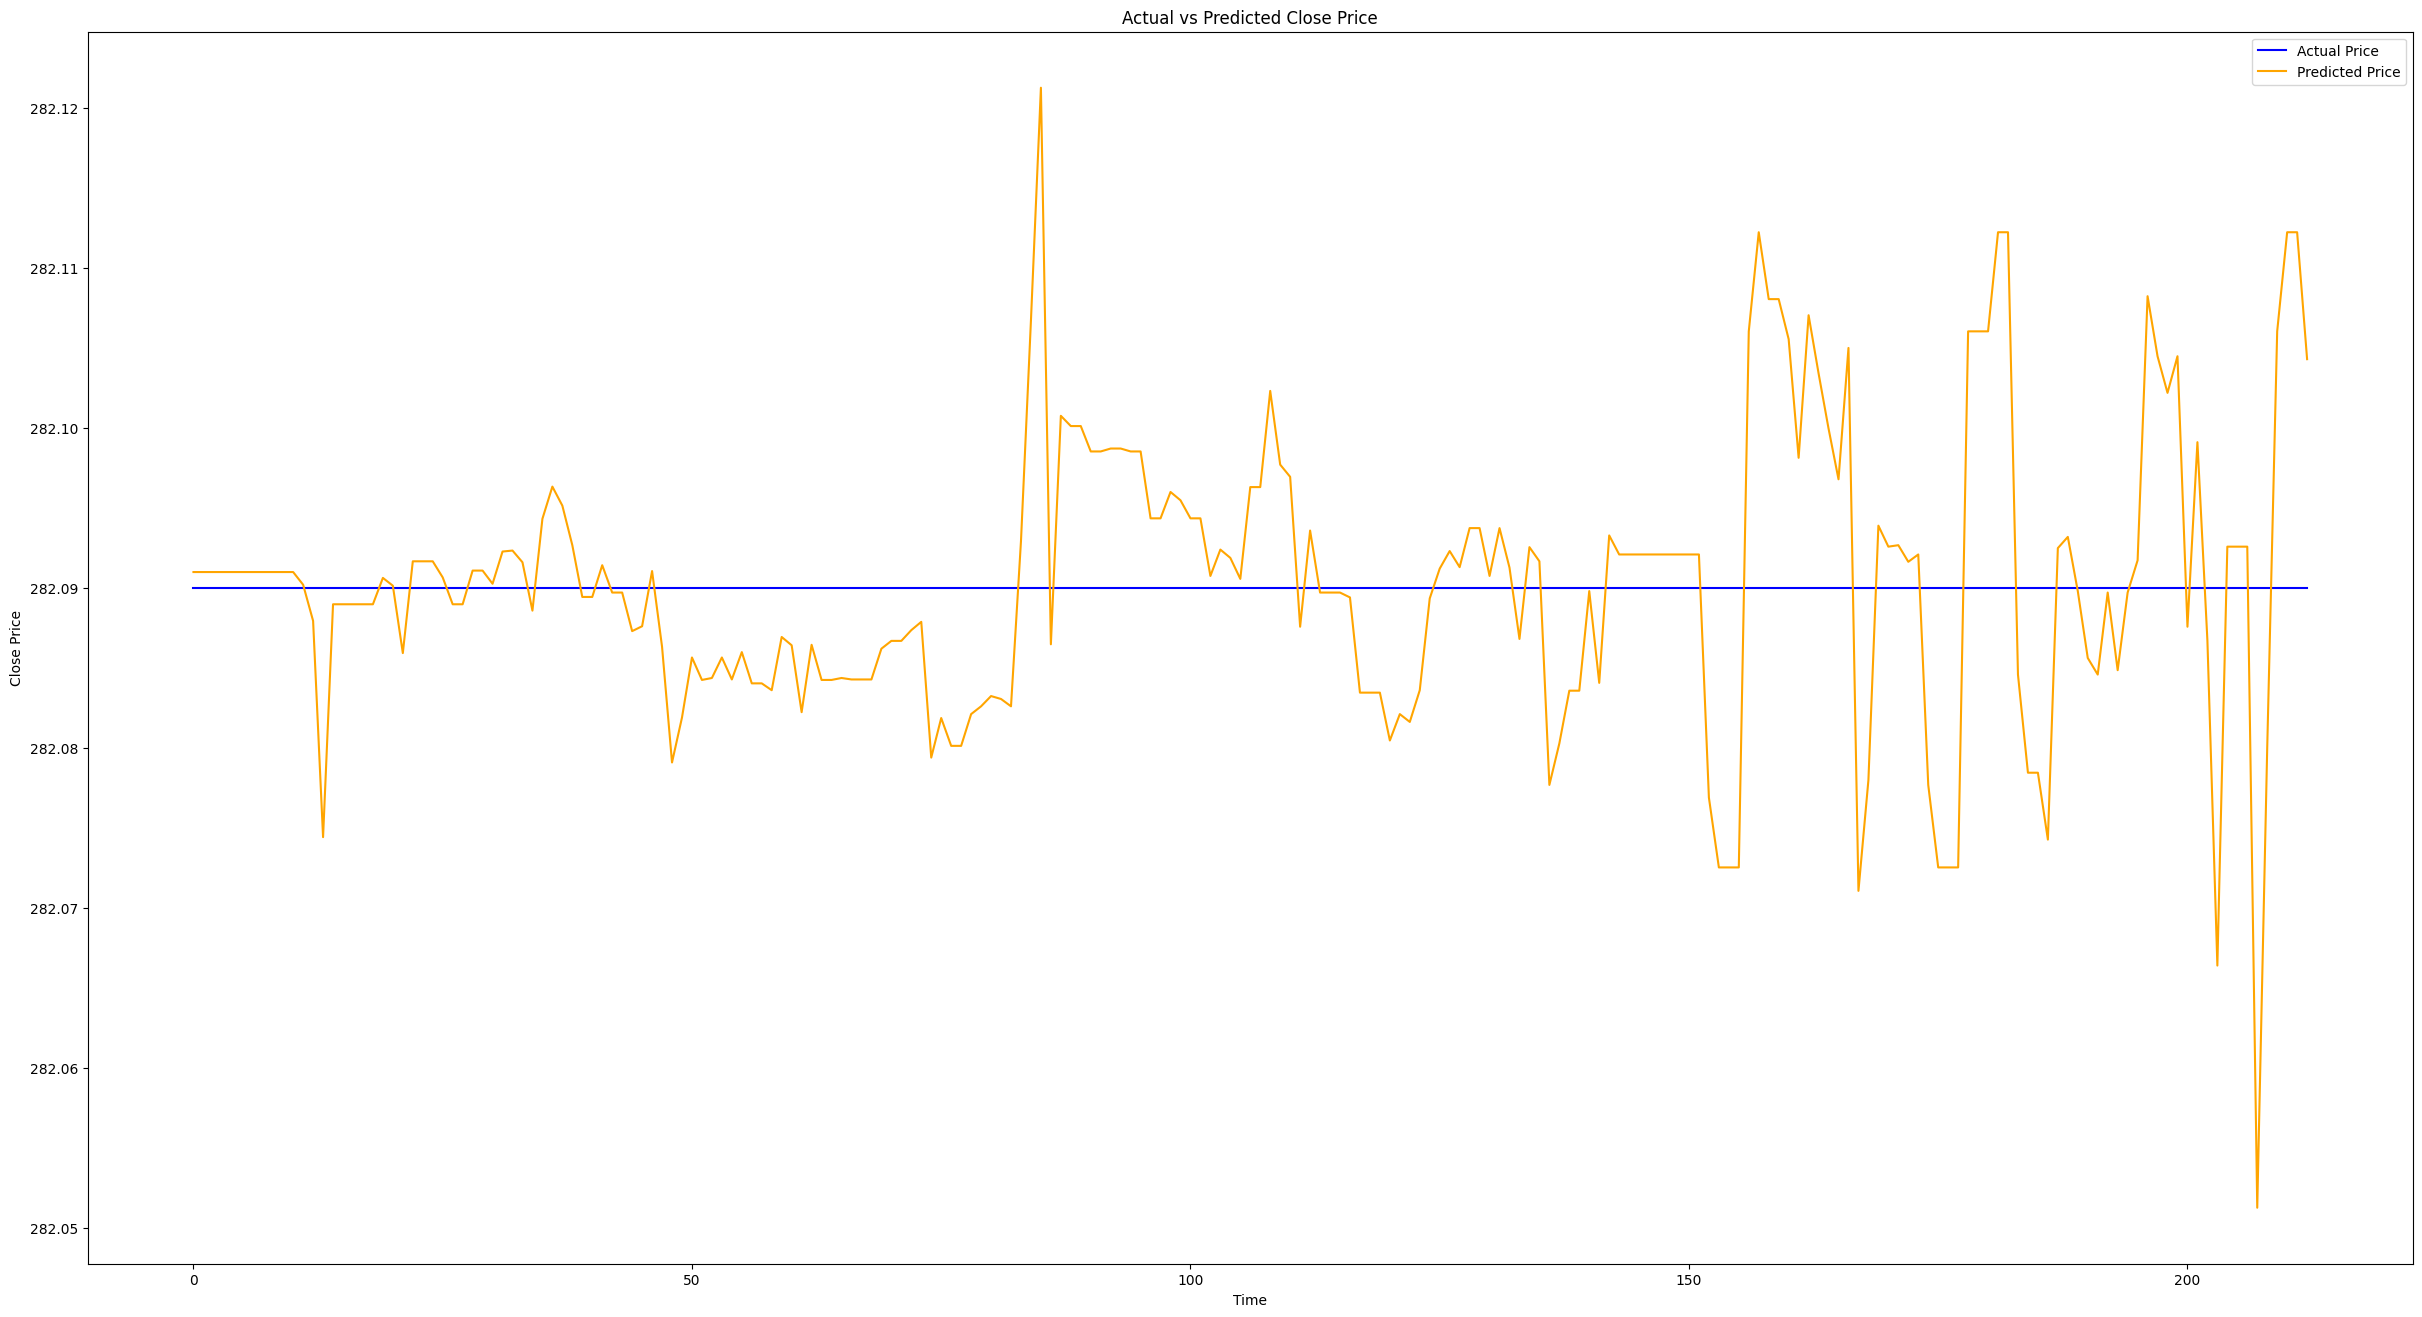

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  ANSS 

Mean Squared Error: 0.0002441949904469877
Root Mean Squared Error (RMSE): 0.015626739597465227
R-squared: 0.0
Mean Squared Error: 0.0002441949904469877
Root Mean Squared Error (RMSE): 0.015626739597465227
Mean Squared Error: 0.00024418878268467987
Root Mean Squared Error (RMSE): 0.01562654096992293
R-squared: 0.0


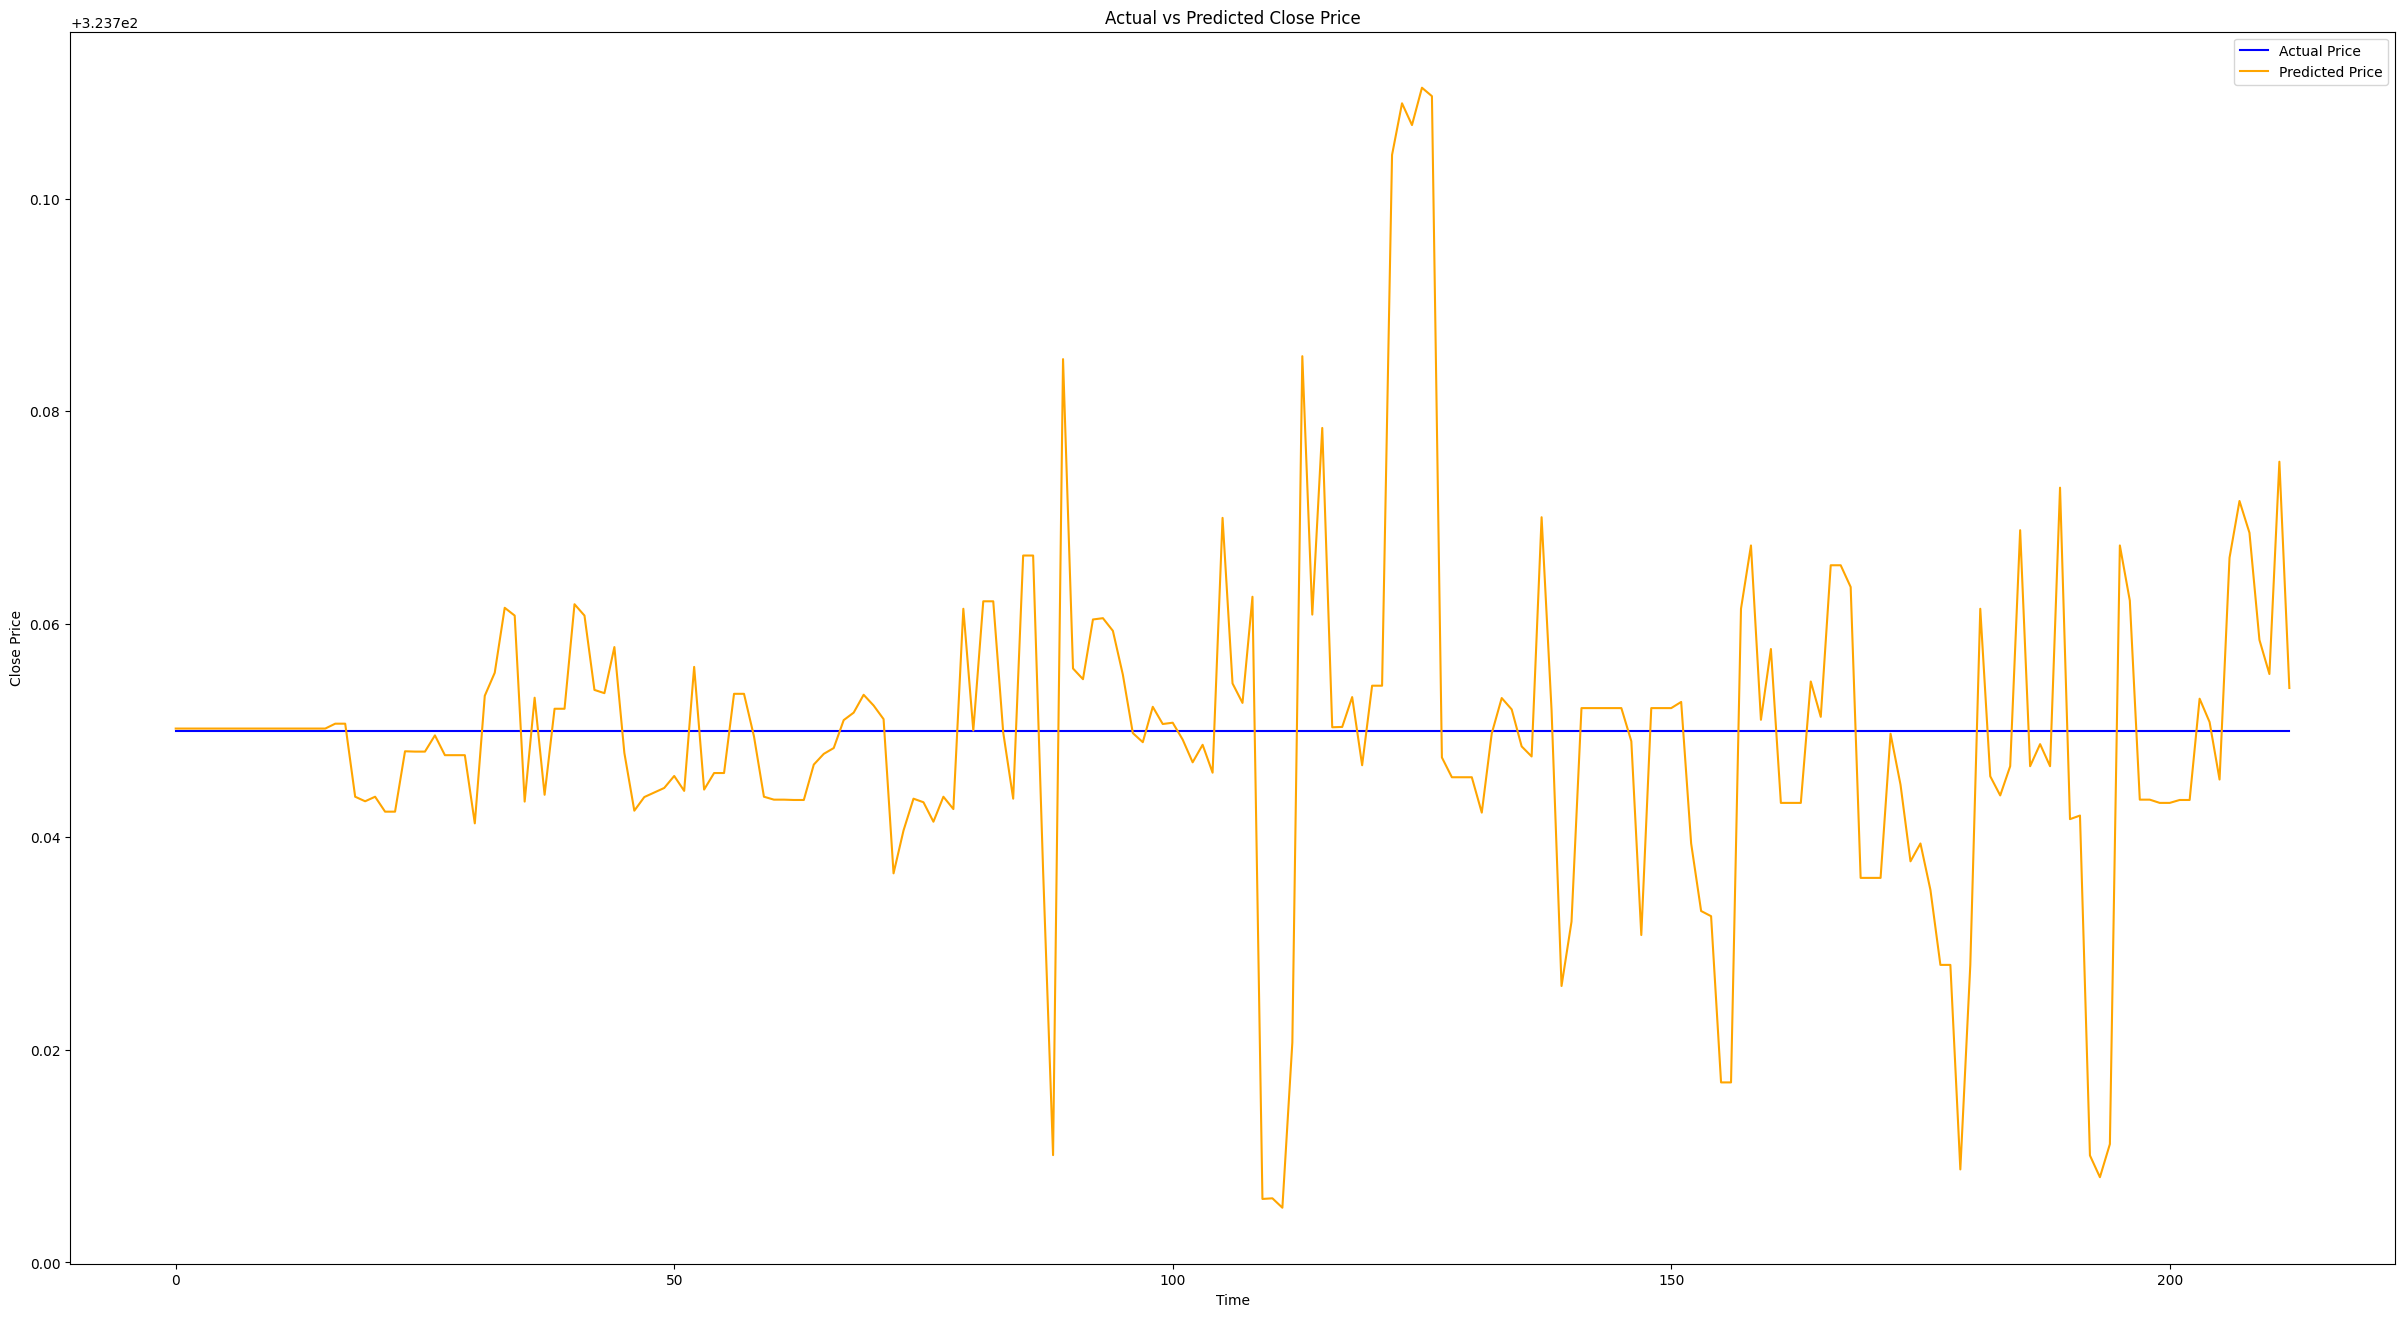

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  TTD 

Mean Squared Error: 0.004328022351038331
Root Mean Squared Error (RMSE): 0.06578770668626724
R-squared: 0.9956719776489616
Mean Squared Error: 0.004328022351038331
Root Mean Squared Error (RMSE): 0.06578770668626724
Mean Squared Error: 1.070931081966321
Root Mean Squared Error (RMSE): 1.034858000870806
R-squared: 0.9956719776489616


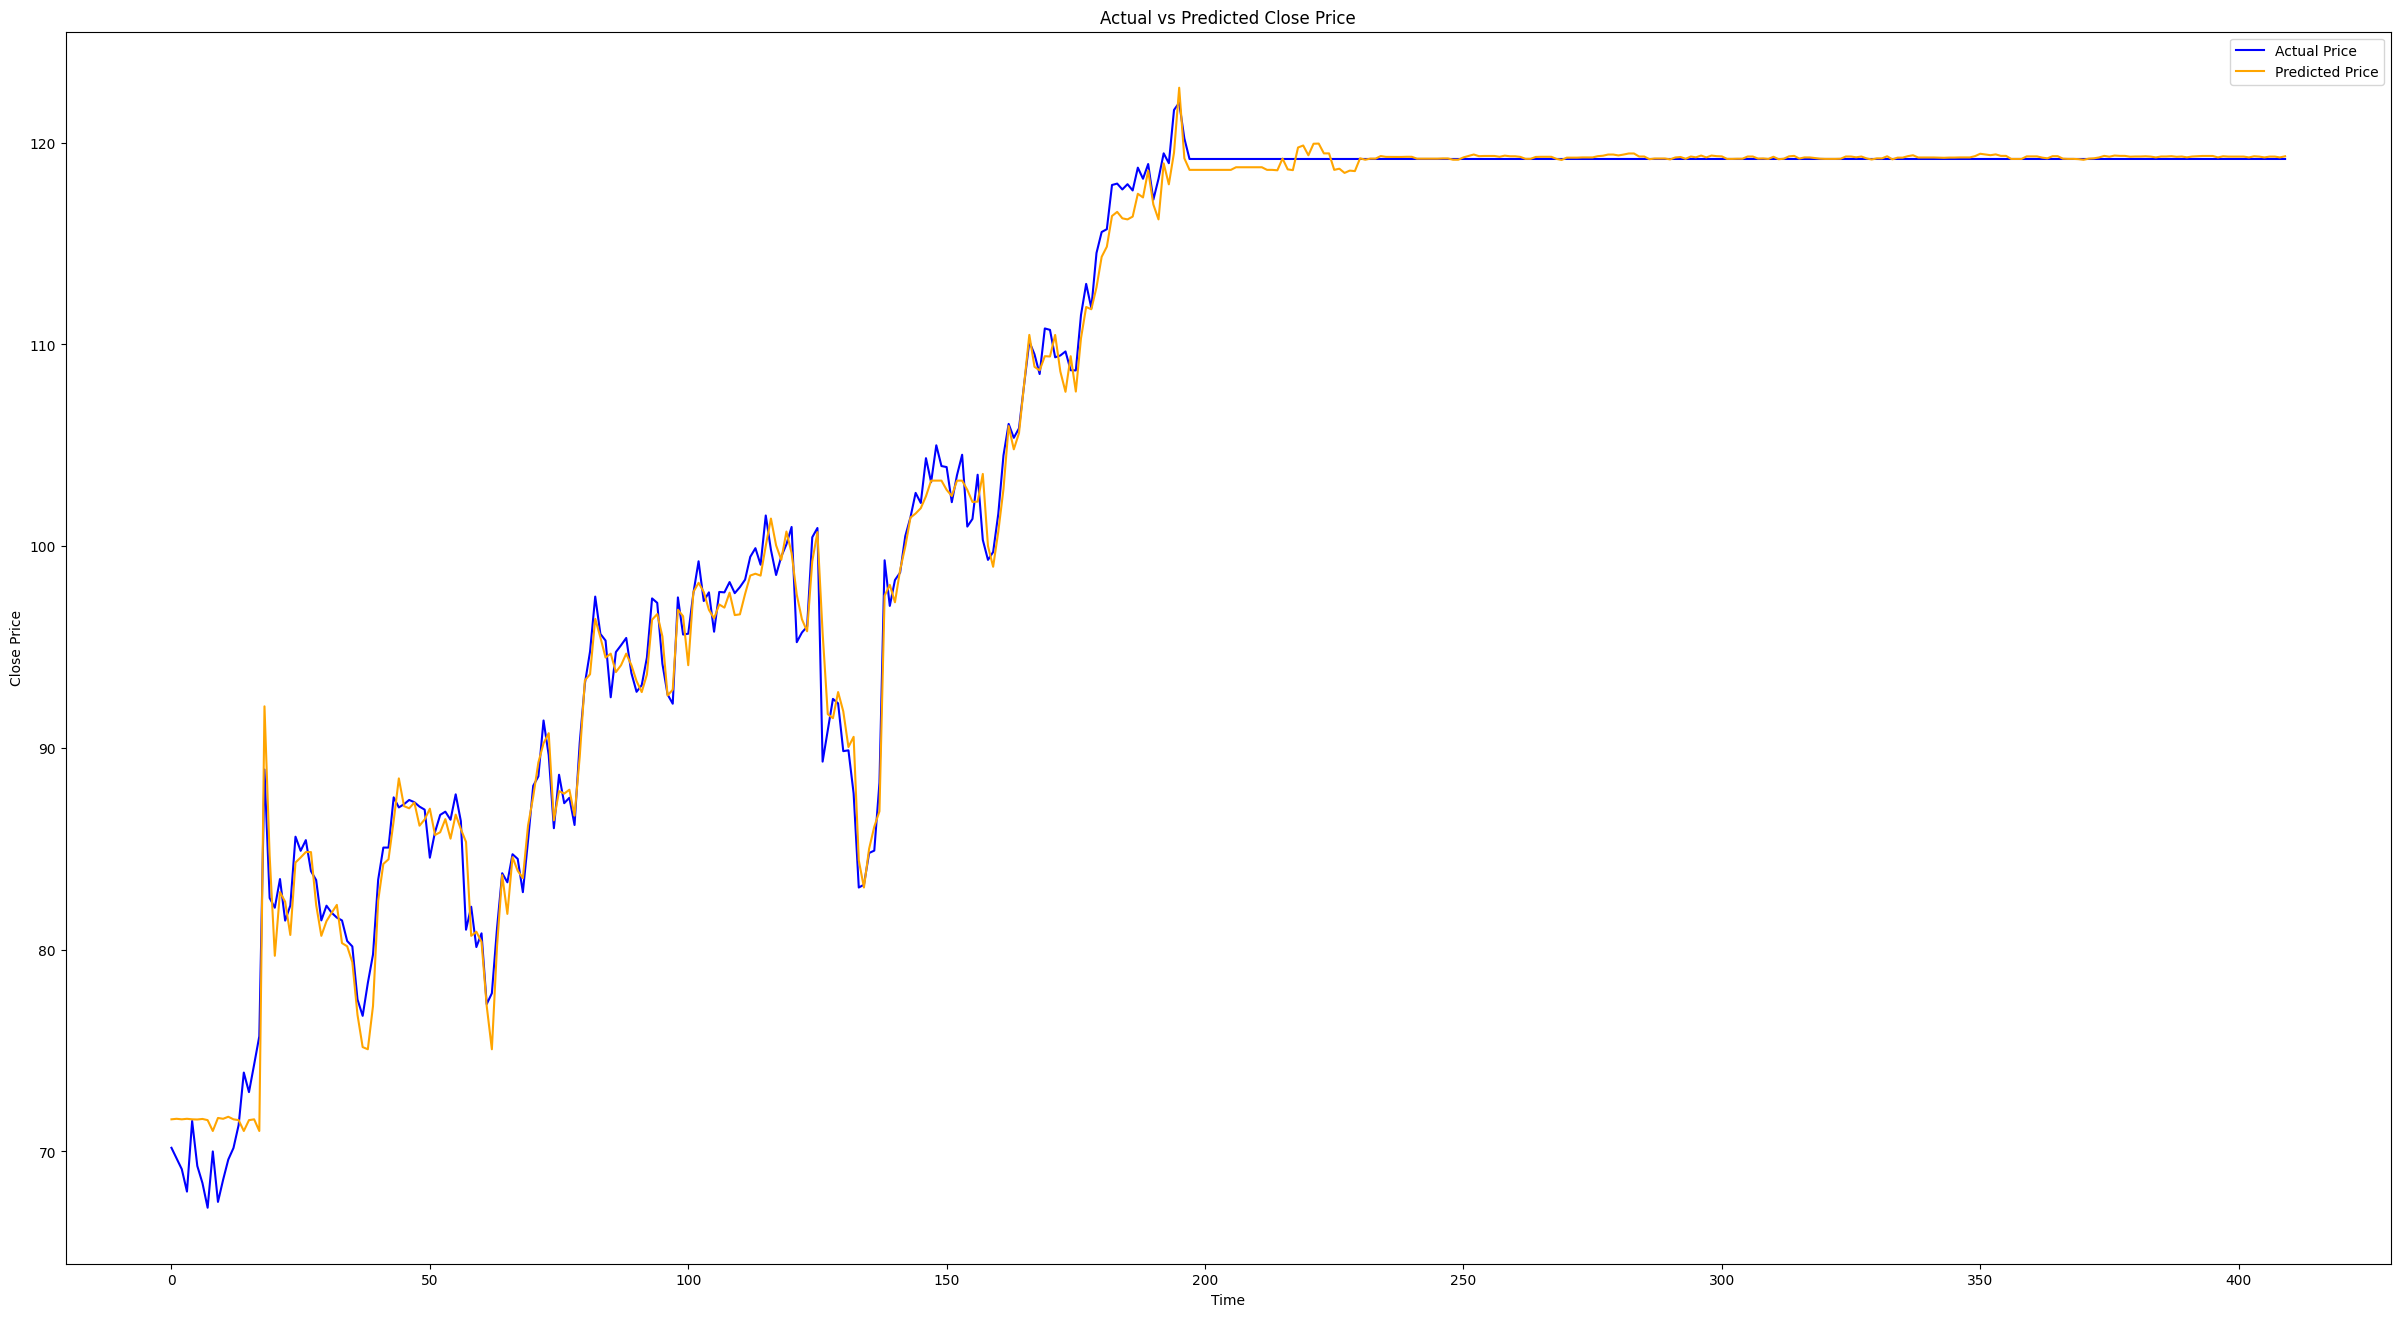

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  ICE 

Mean Squared Error: 0.0072344696692676
Root Mean Squared Error (RMSE): 0.08505568569629898
R-squared: 0.9927655303307324
Mean Squared Error: 0.0072344696692676
Root Mean Squared Error (RMSE): 0.08505568569629898
Mean Squared Error: 0.7216346657244352
Root Mean Squared Error (RMSE): 0.8494908273339008
R-squared: 0.9927655303307324


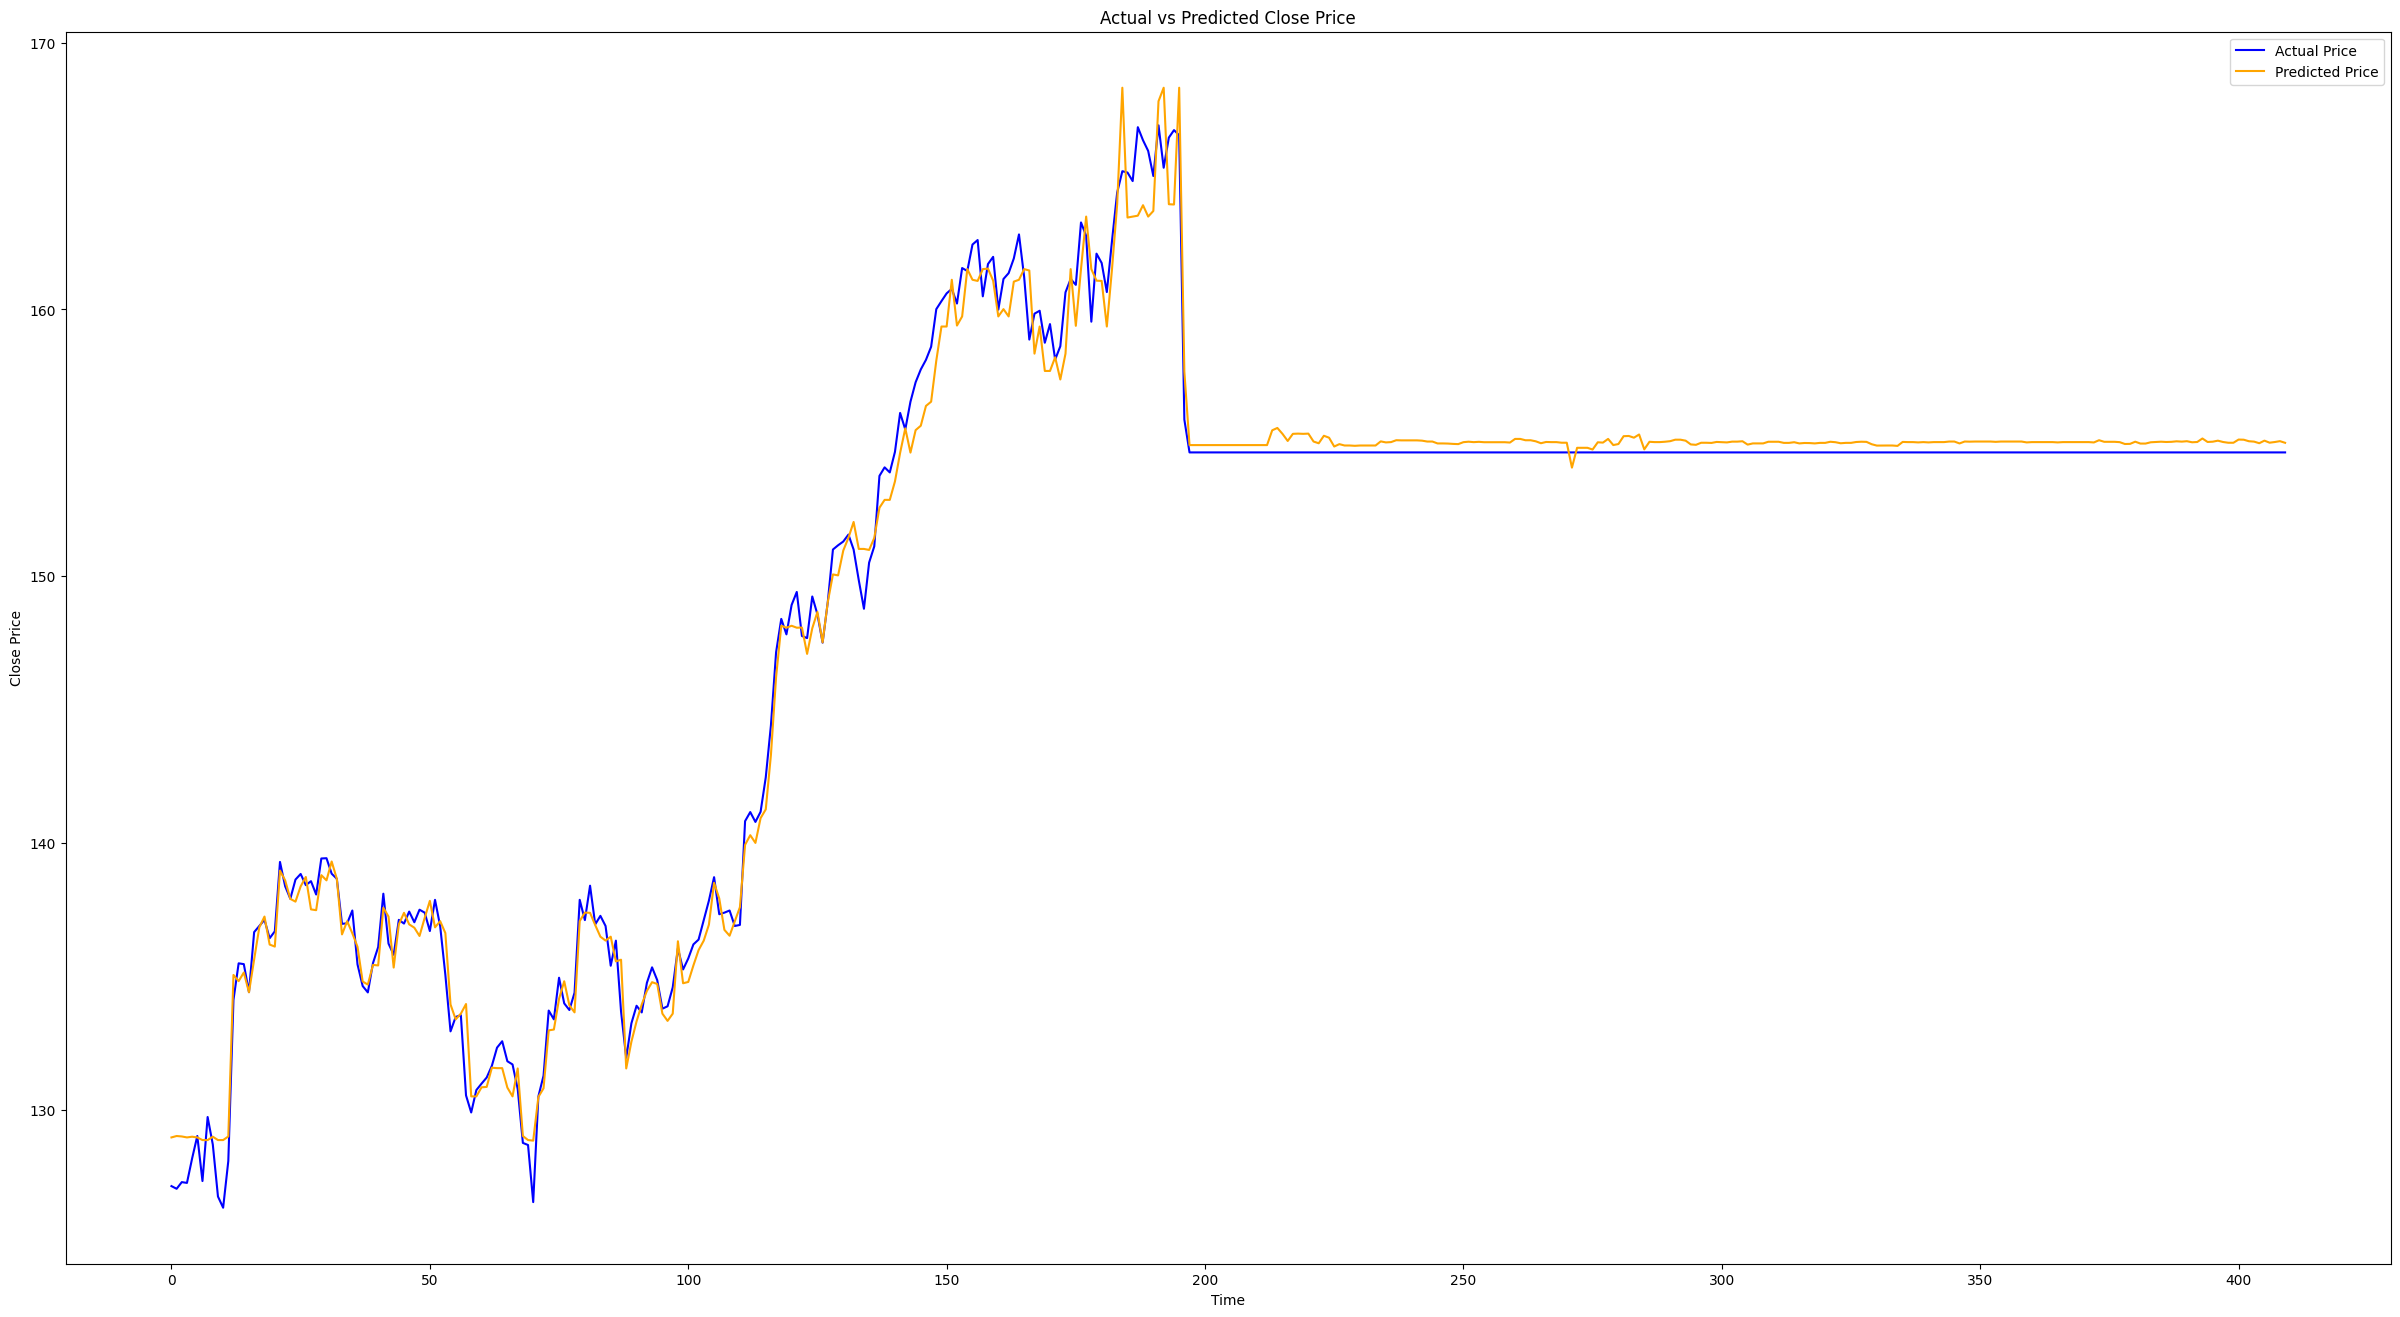

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  AJG 

Mean Squared Error: 0.009215030578921911
Root Mean Squared Error (RMSE): 0.09599495079910146
R-squared: 0.9907849694210781
Mean Squared Error: 0.009215030578921911
Root Mean Squared Error (RMSE): 0.09599495079910146
Mean Squared Error: 2.646219745135253
Root Mean Squared Error (RMSE): 1.626720549183311
R-squared: 0.9907849694210781


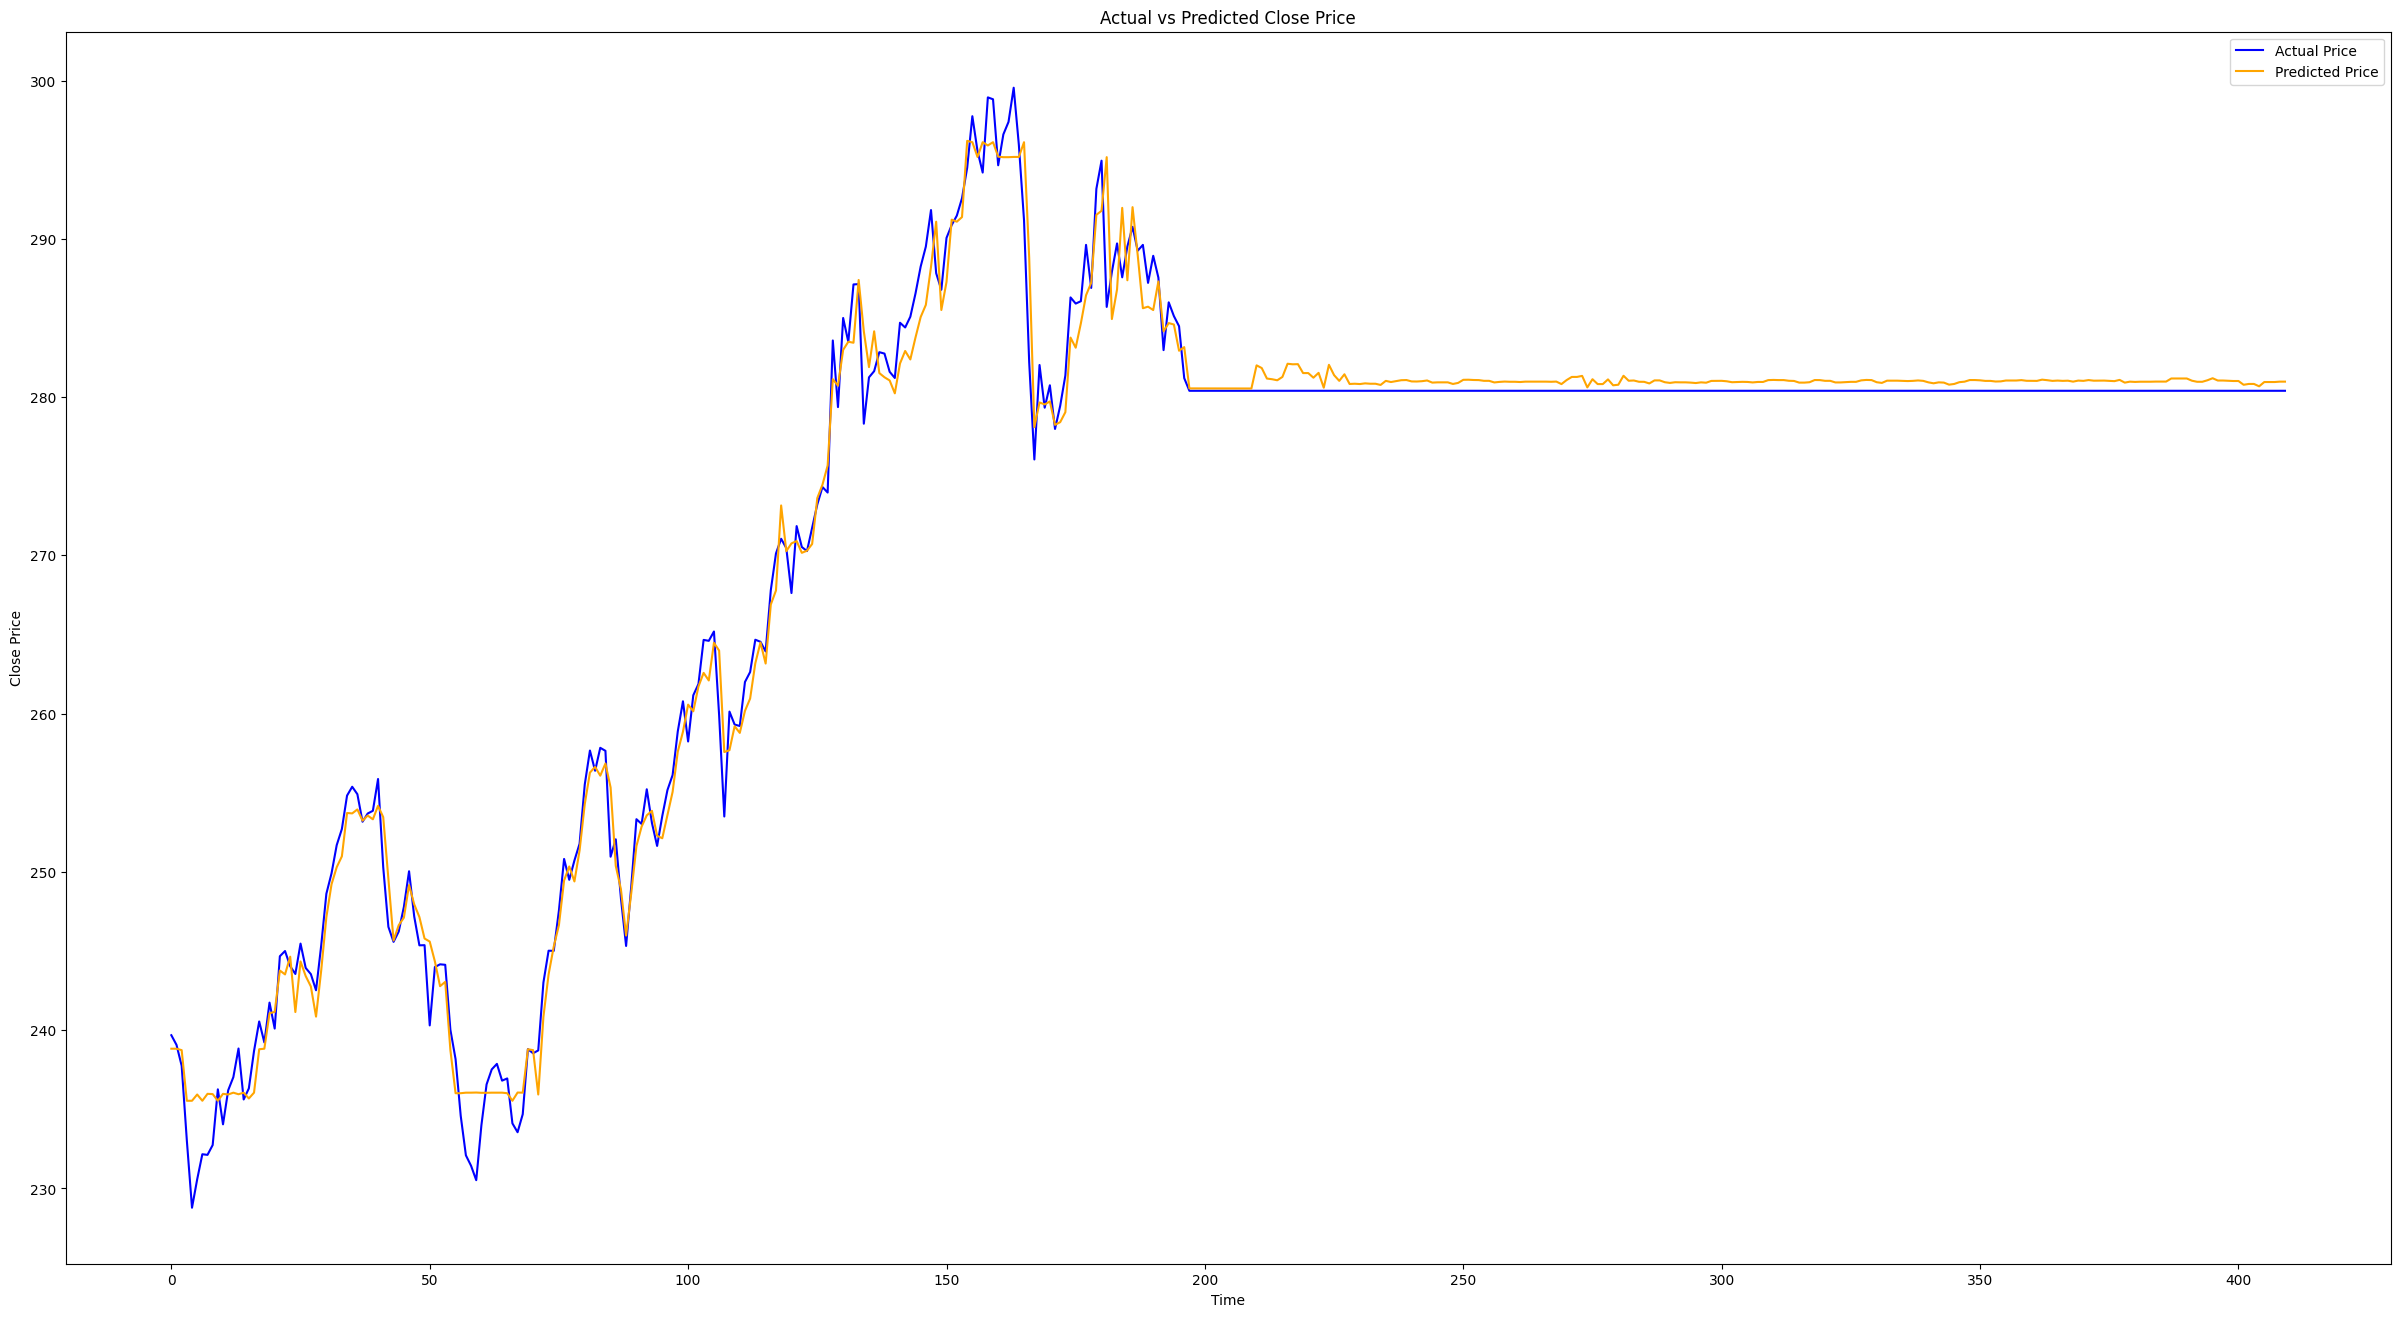

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  PGR 

Mean Squared Error: 0.011500728627542426
Root Mean Squared Error (RMSE): 0.10724145013726001
R-squared: 0.9884992713724575
Mean Squared Error: 0.011500728627542426
Root Mean Squared Error (RMSE): 0.10724145013726001
Mean Squared Error: 4.712181883607991
Root Mean Squared Error (RMSE): 2.1707560626675653
R-squared: 0.9884992713724575


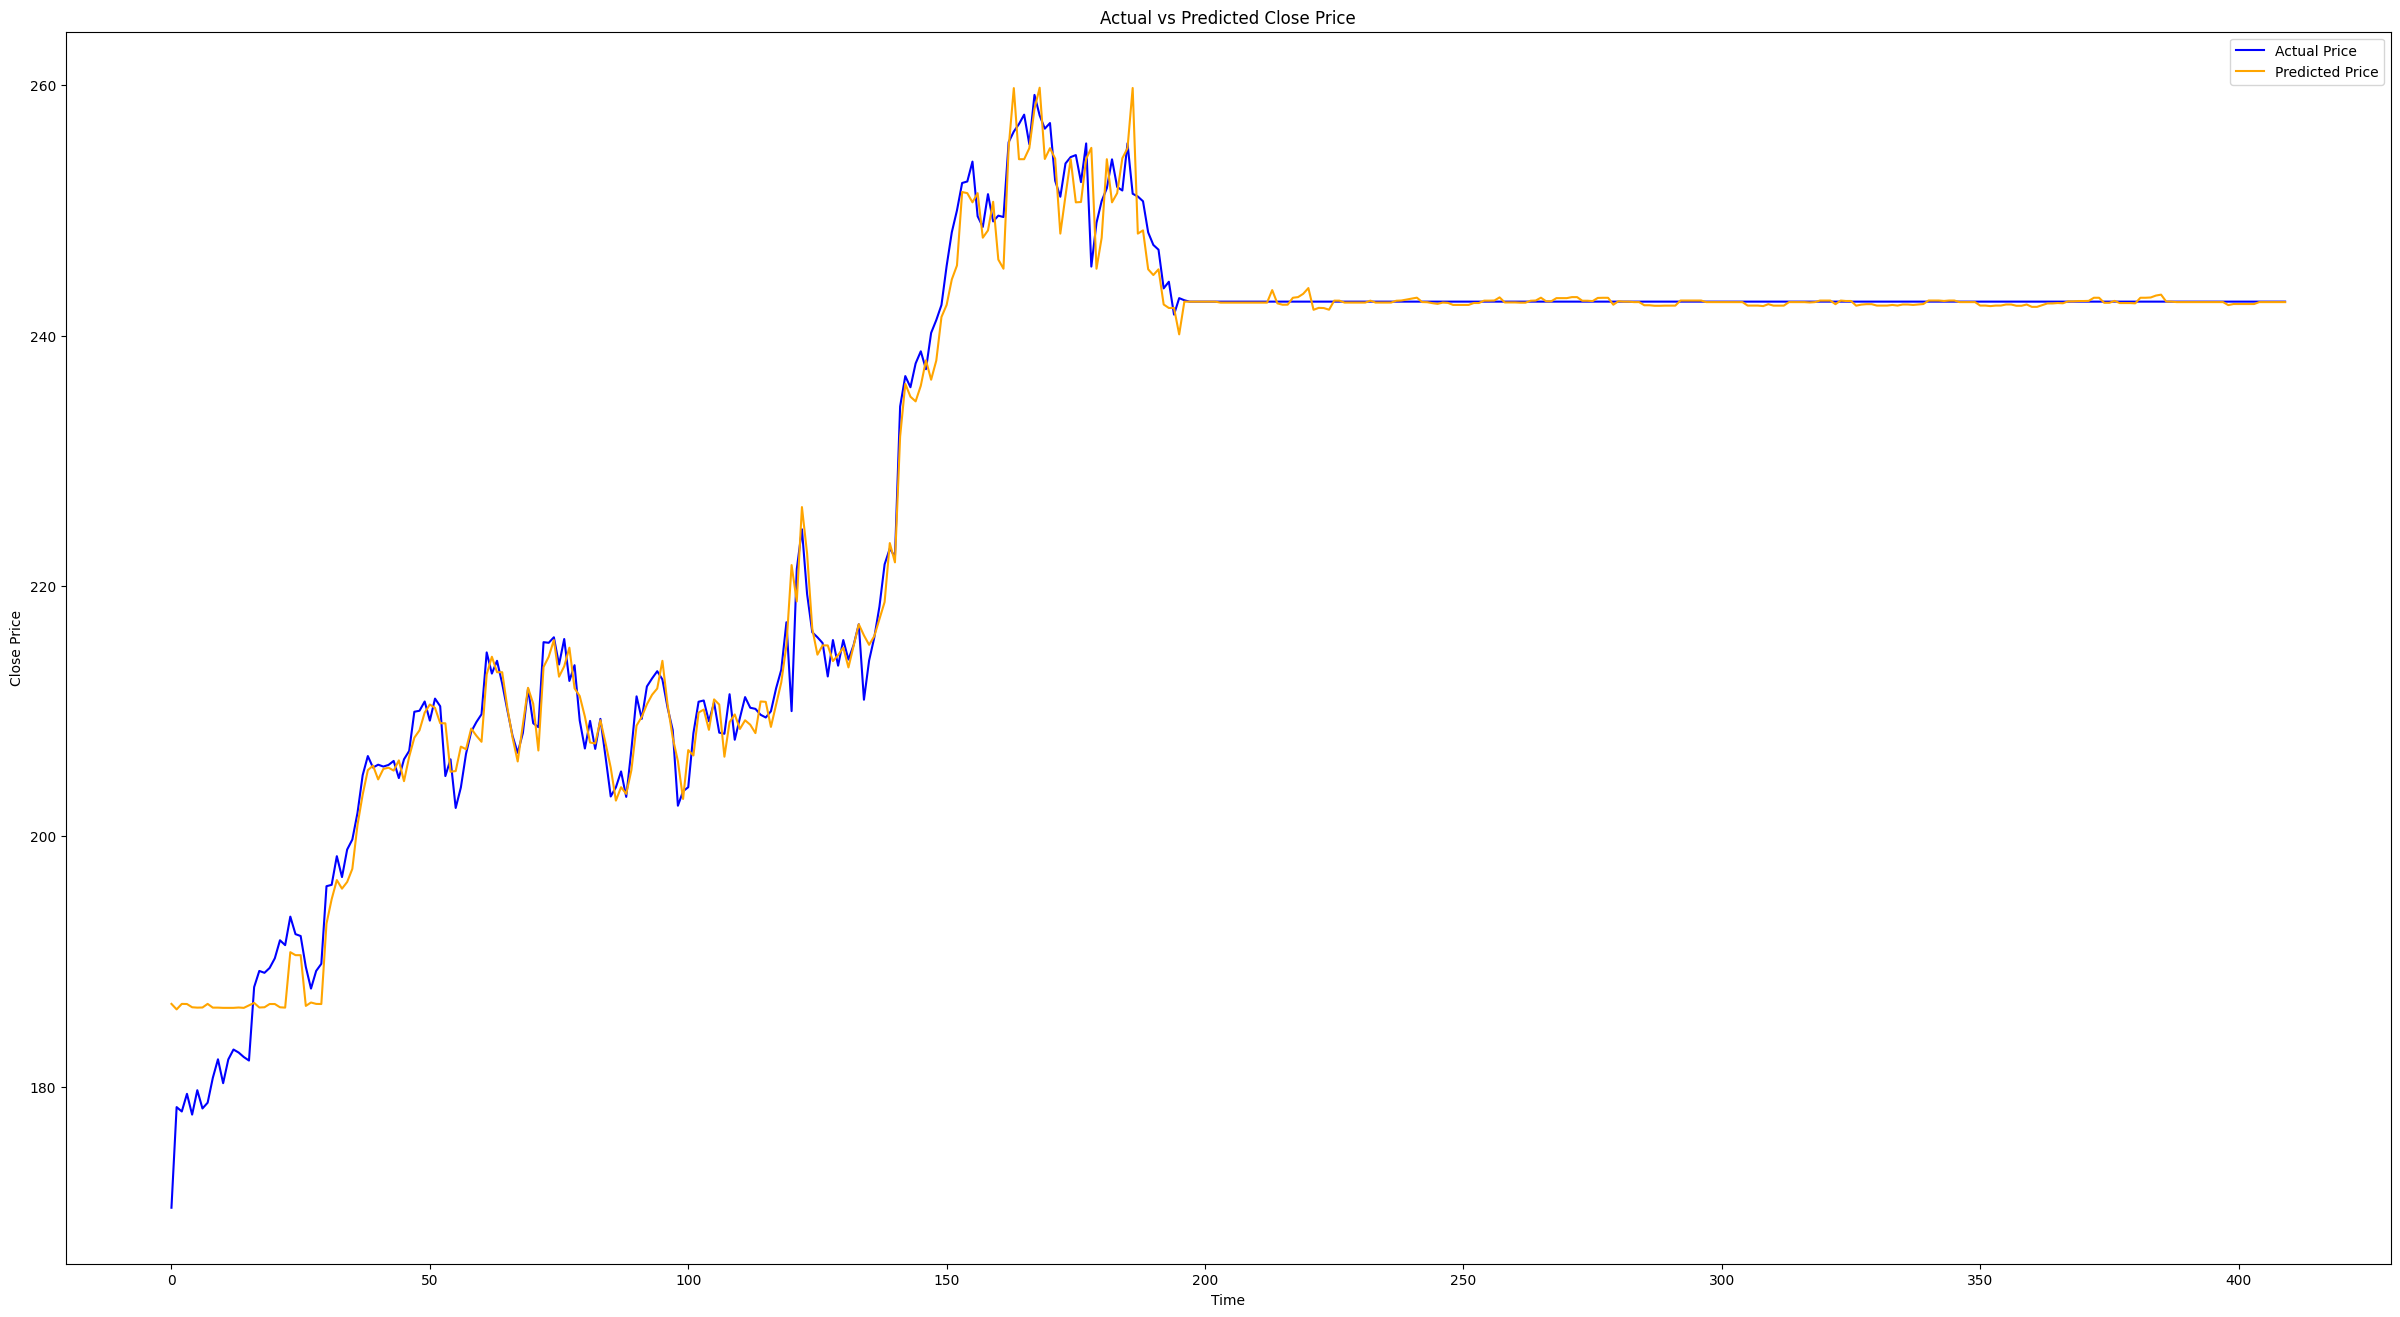

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  CINF 

Mean Squared Error: 0.0050515724072526655
Root Mean Squared Error (RMSE): 0.07107441457551843
R-squared: 0.9949484275927474
Mean Squared Error: 0.0050515724072526655
Root Mean Squared Error (RMSE): 0.07107441457551843
Mean Squared Error: 0.6139955062862122
Root Mean Squared Error (RMSE): 0.7835786535416928
R-squared: 0.9949484275927474


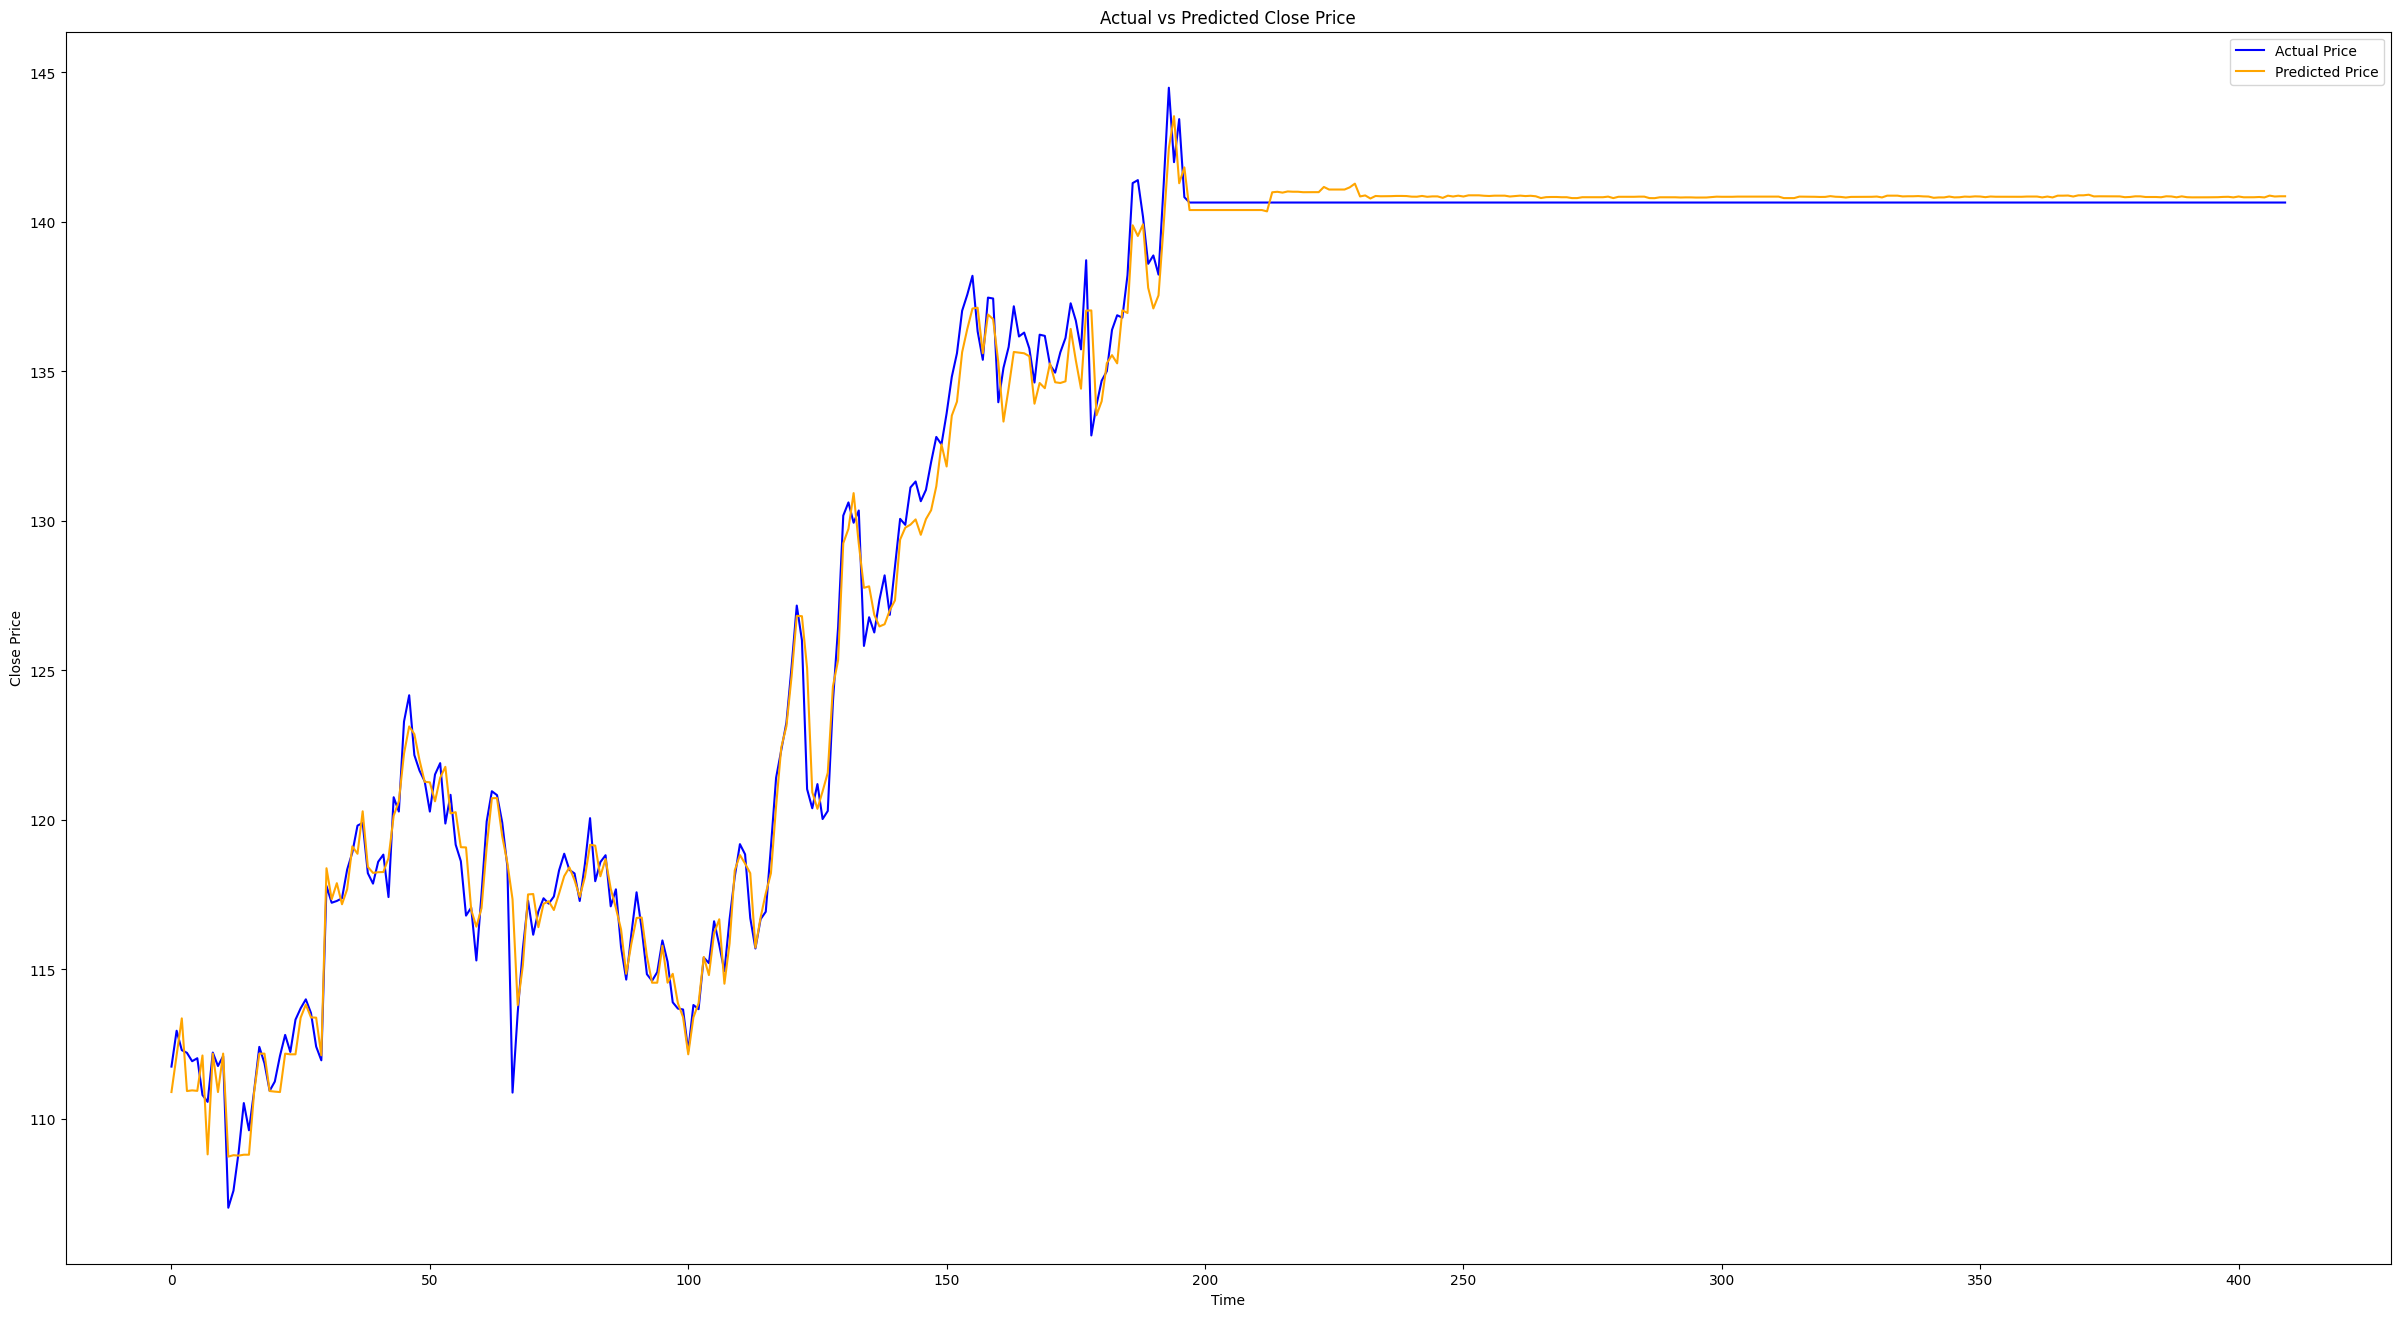

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  ALL 

Mean Squared Error: 0.01755200945820893
Root Mean Squared Error (RMSE): 0.13248399698910404
R-squared: 0.9824479905417911
Mean Squared Error: 0.01755200945820893
Root Mean Squared Error (RMSE): 0.13248399698910404
Mean Squared Error: 1.8601189507143117
Root Mean Squared Error (RMSE): 1.363861778449089
R-squared: 0.9824479905417911


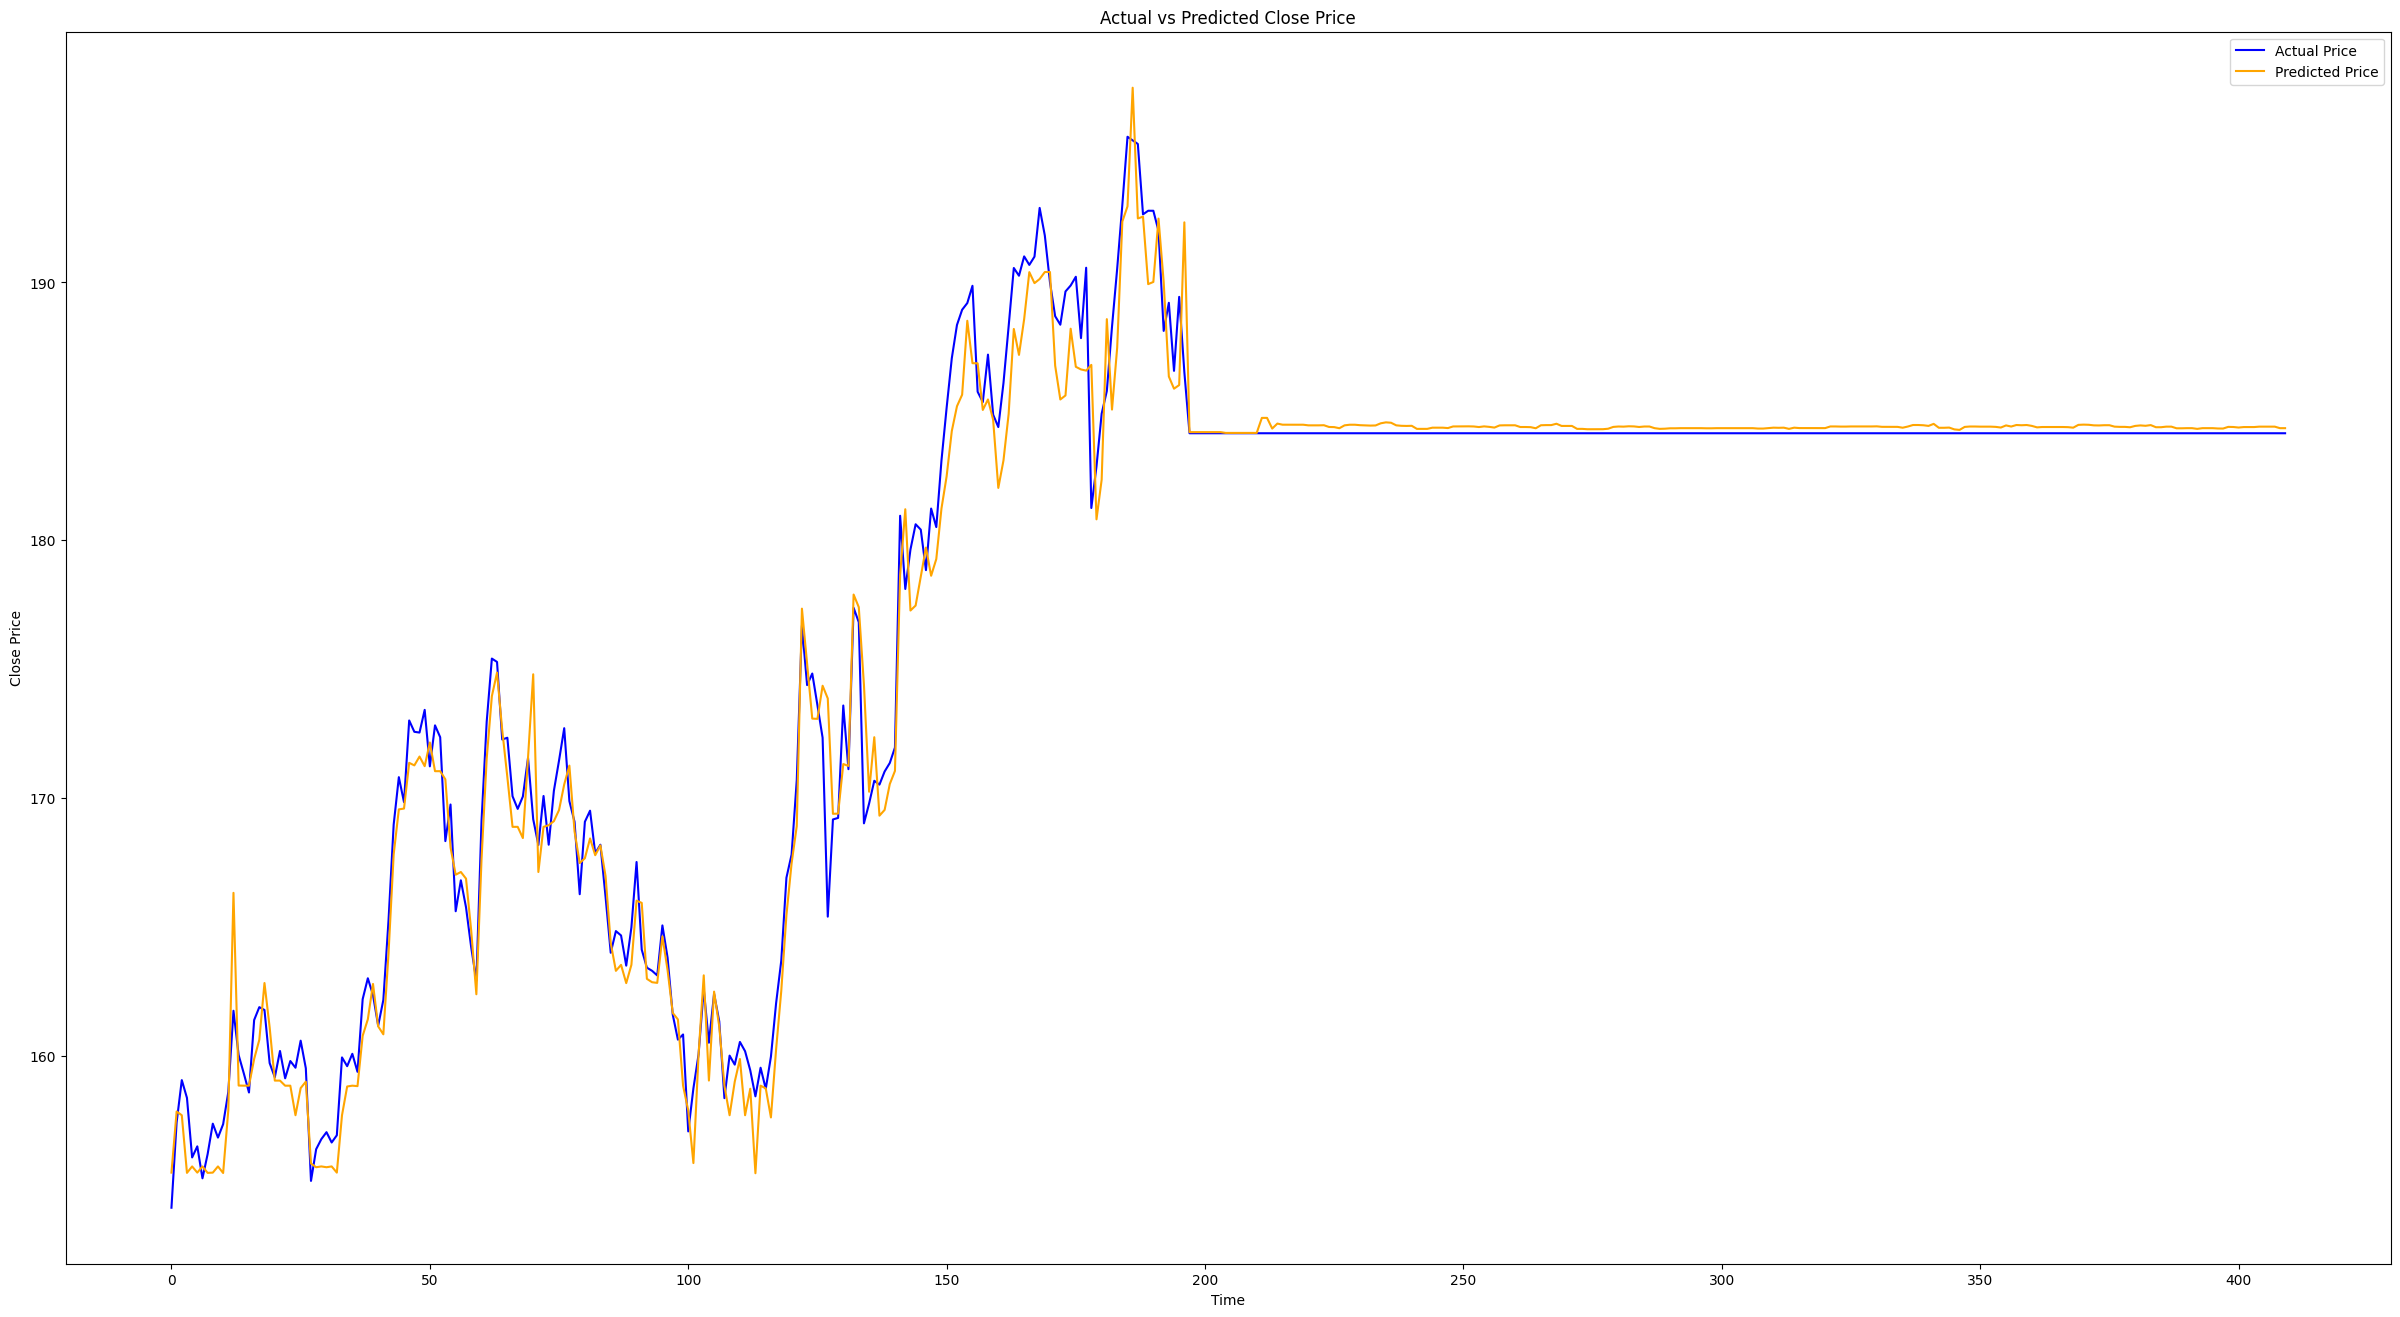

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  HES 

Mean Squared Error: 0.524401003918689
Root Mean Squared Error (RMSE): 0.7241553727748549
R-squared: 0.47559899608131084
Mean Squared Error: 0.524401003918689
Root Mean Squared Error (RMSE): 0.7241553727748549
Mean Squared Error: 1.1111155769872394
Root Mean Squared Error (RMSE): 1.0540946717383783
R-squared: 0.47559899608131084


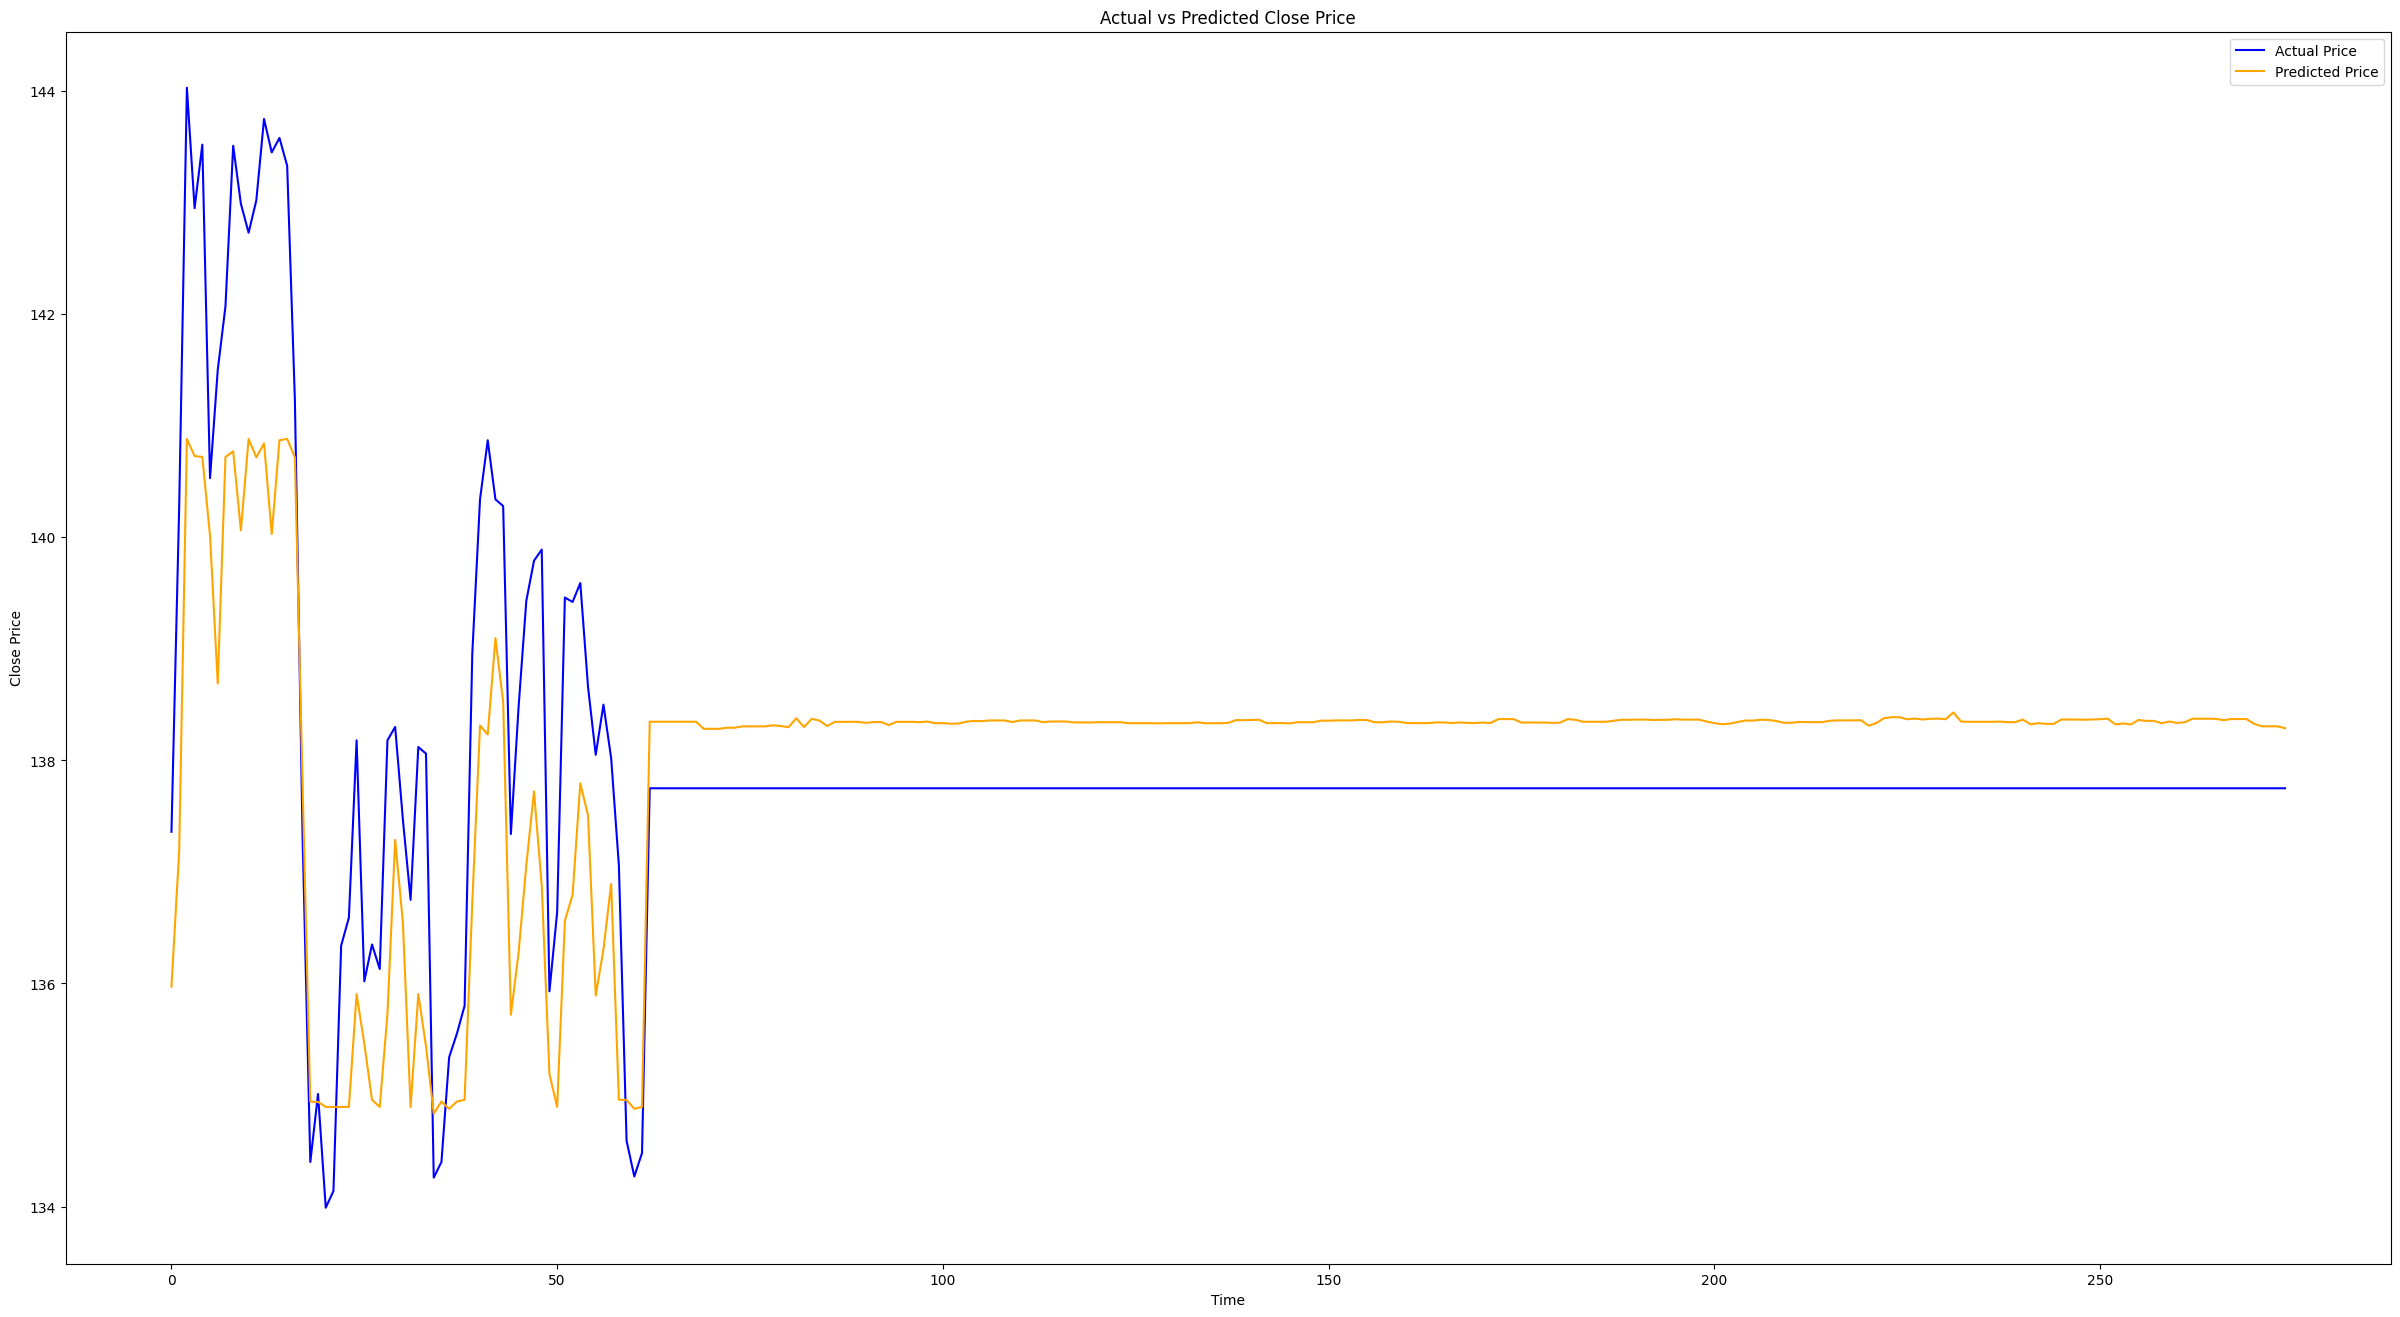

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  MPC 

Mean Squared Error: 0.034850696067437015
Root Mean Squared Error (RMSE): 0.18668341133436847
R-squared: 0.965149303932563
Mean Squared Error: 0.034850696067437015
Root Mean Squared Error (RMSE): 0.18668341133436847
Mean Squared Error: 10.434765949032144
Root Mean Squared Error (RMSE): 3.230288833685332
R-squared: 0.965149303932563


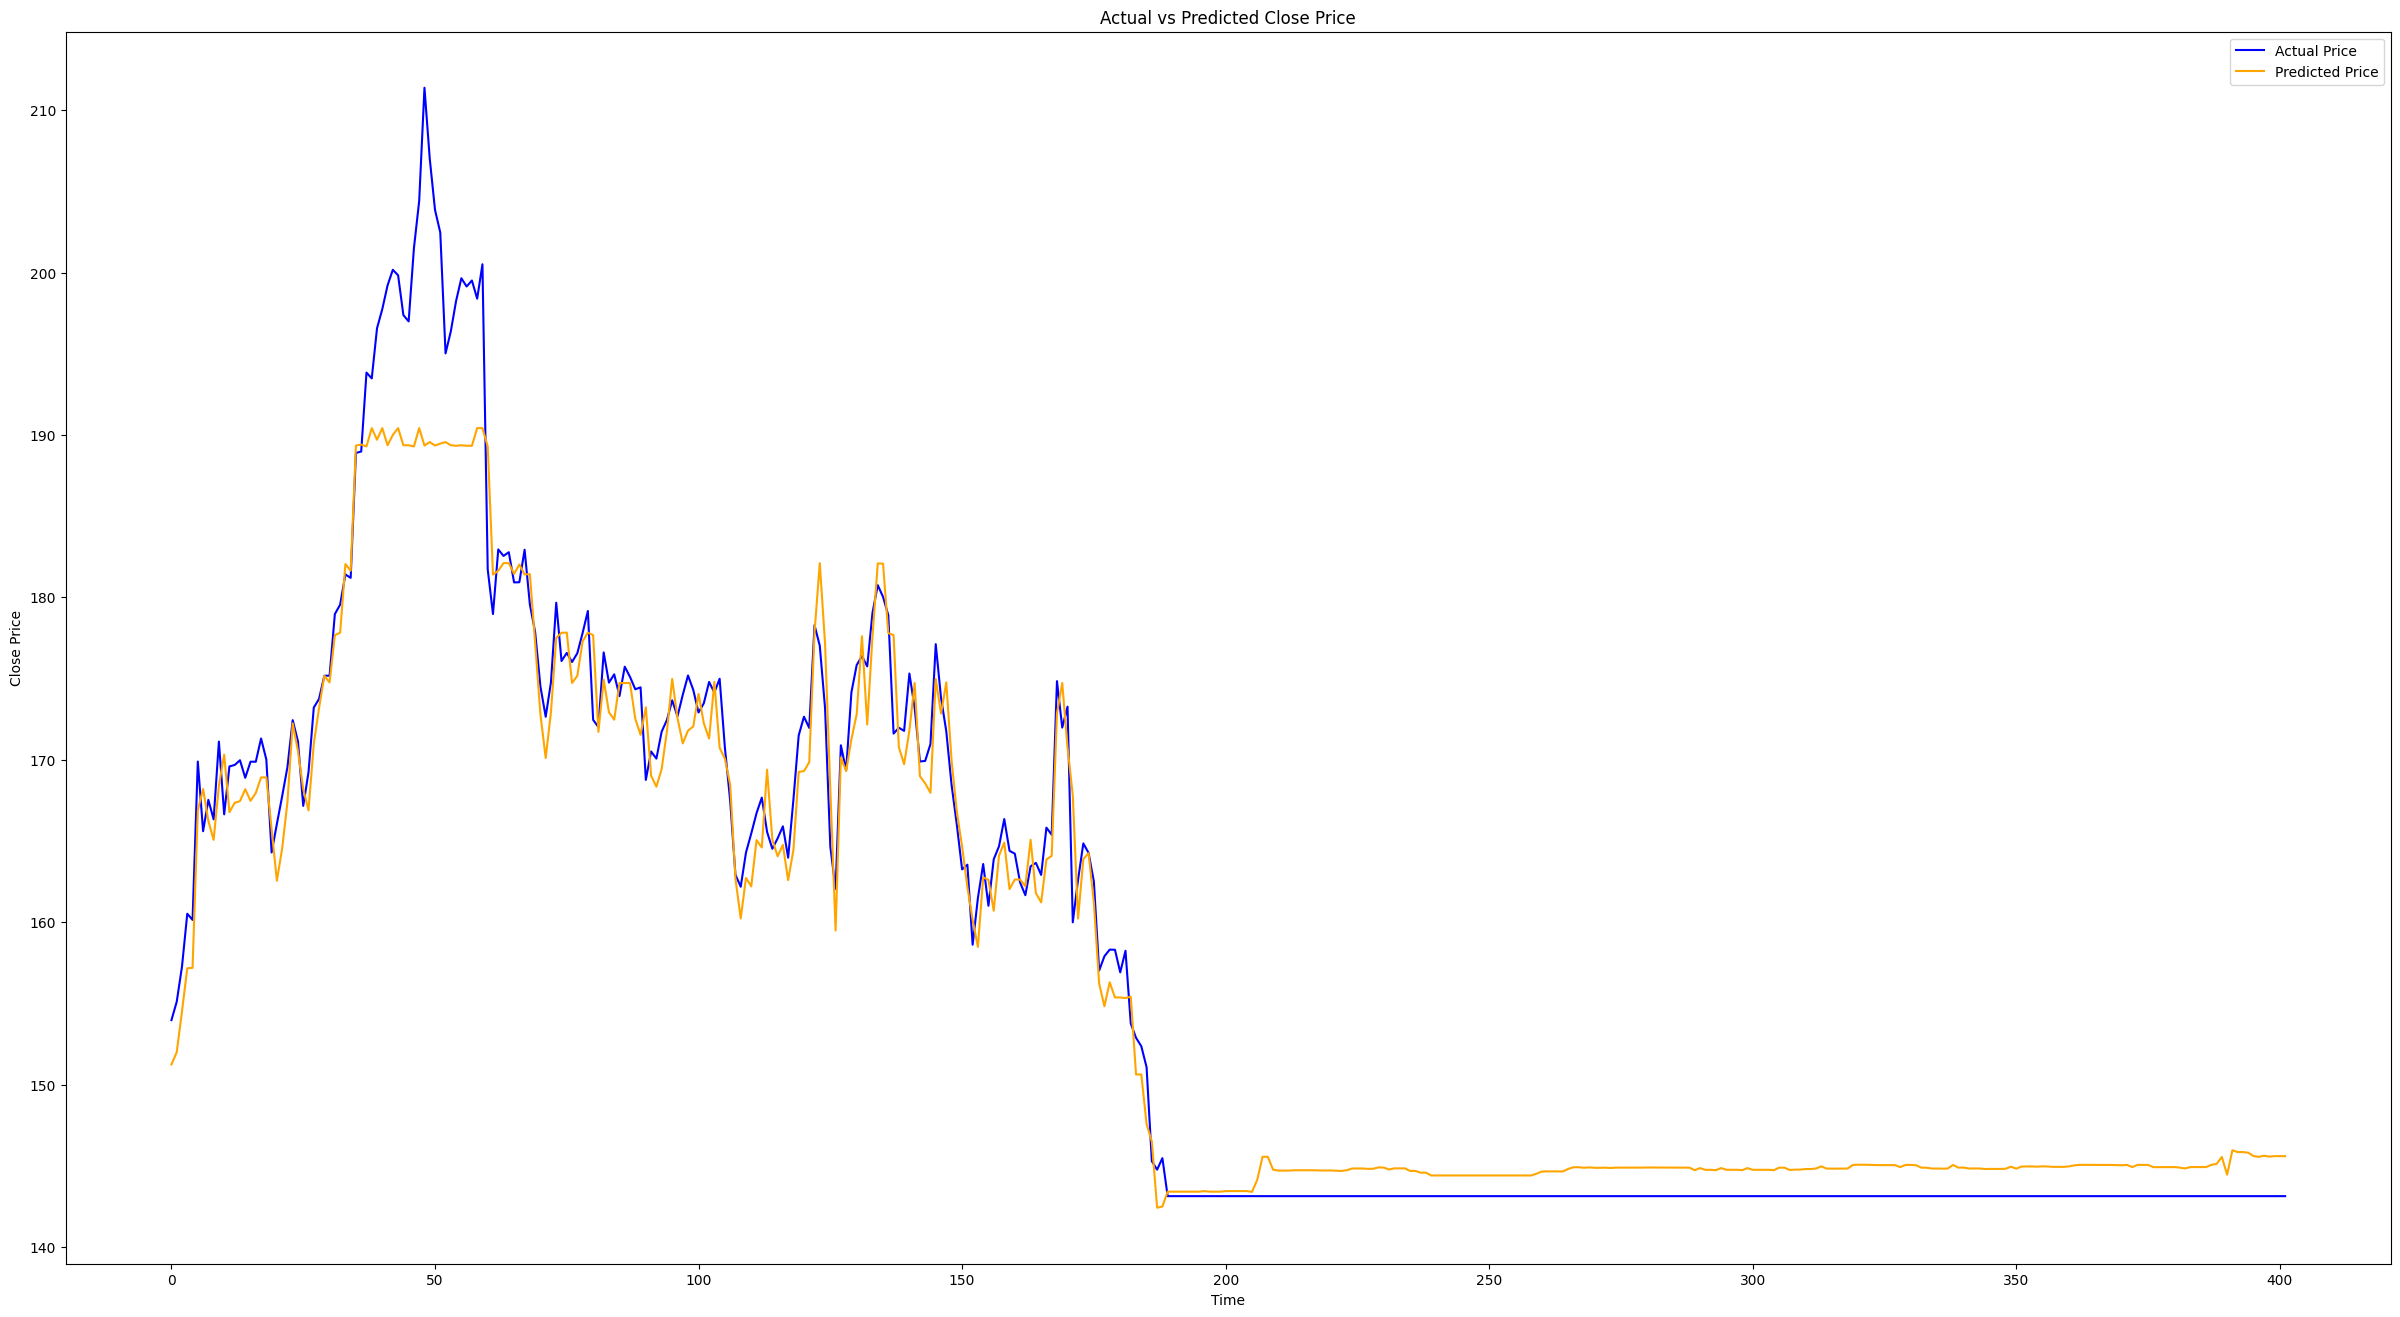

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CLR']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values


'NoneType' object has no attribute 'iloc' CLR

  FTI 

Mean Squared Error: 8.923328983500757e-05
Root Mean Squared Error (RMSE): 0.009446337376730072
R-squared: 0.0
Mean Squared Error: 8.923328983500757e-05
Root Mean Squared Error (RMSE): 0.009446337376730072
Mean Squared Error: 8.923078195026315e-05
Root Mean Squared Error (RMSE): 0.009446204632034135
R-squared: 0.0


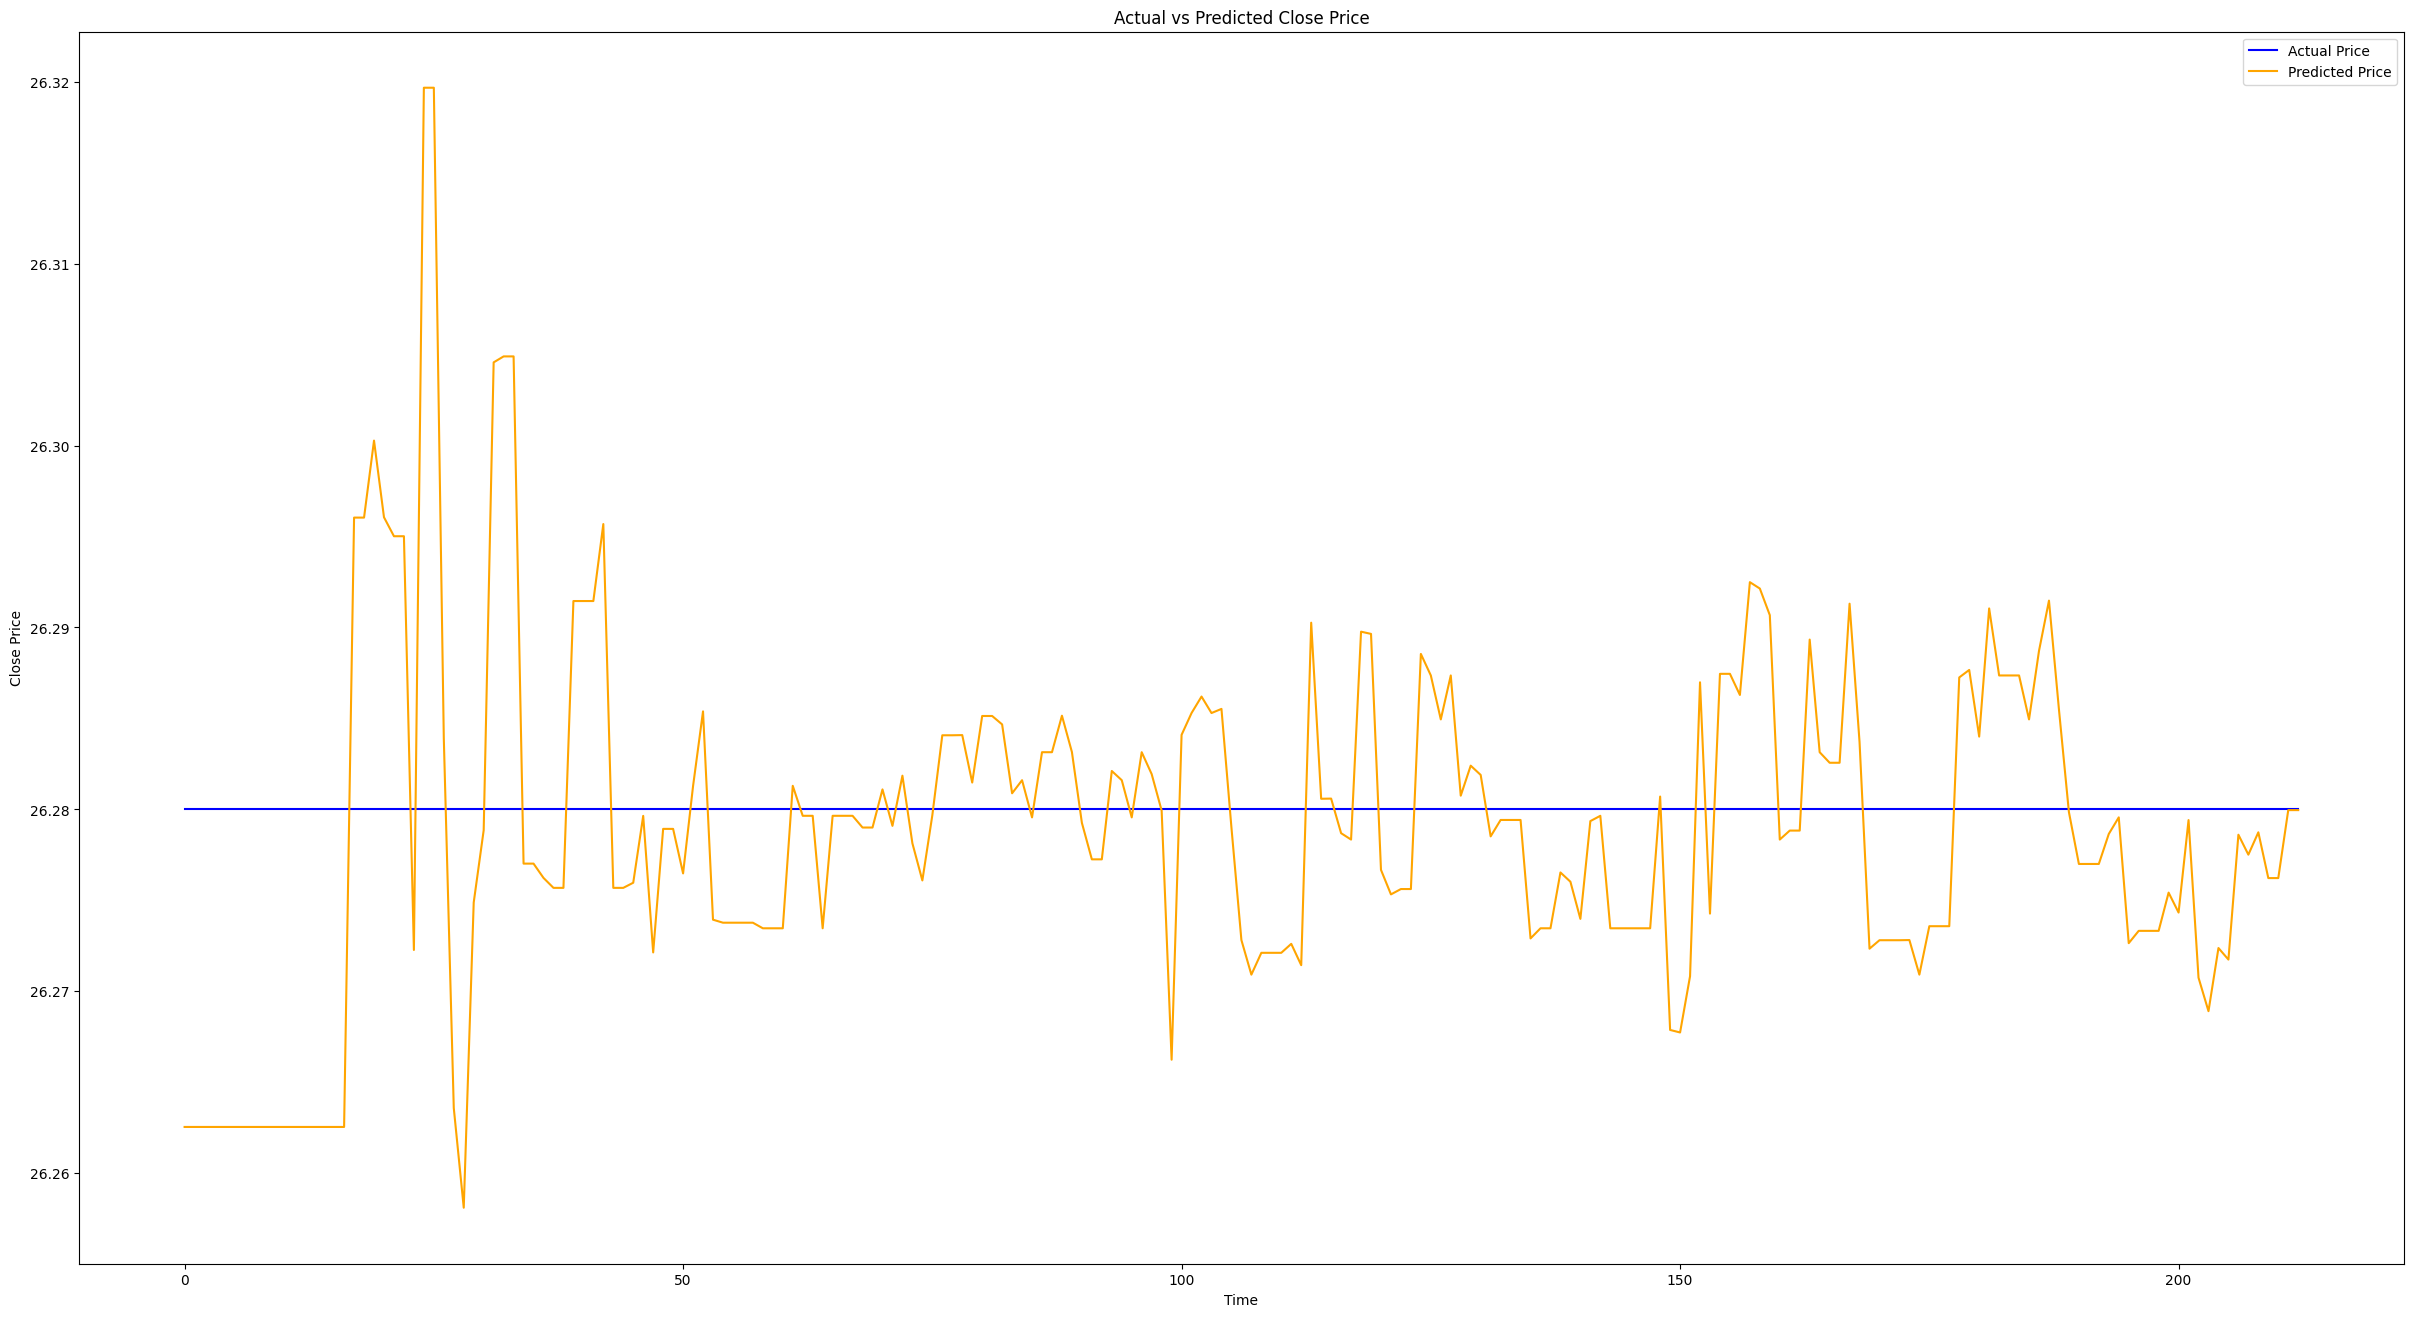

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  WMB 

Mean Squared Error: 0.004171681936408912
Root Mean Squared Error (RMSE): 0.06458855886617158
R-squared: 0.9958283180635911
Mean Squared Error: 0.004171681936408912
Root Mean Squared Error (RMSE): 0.06458855886617158
Mean Squared Error: 0.14985157683177244
Root Mean Squared Error (RMSE): 0.3871066737112297
R-squared: 0.9958283180635911


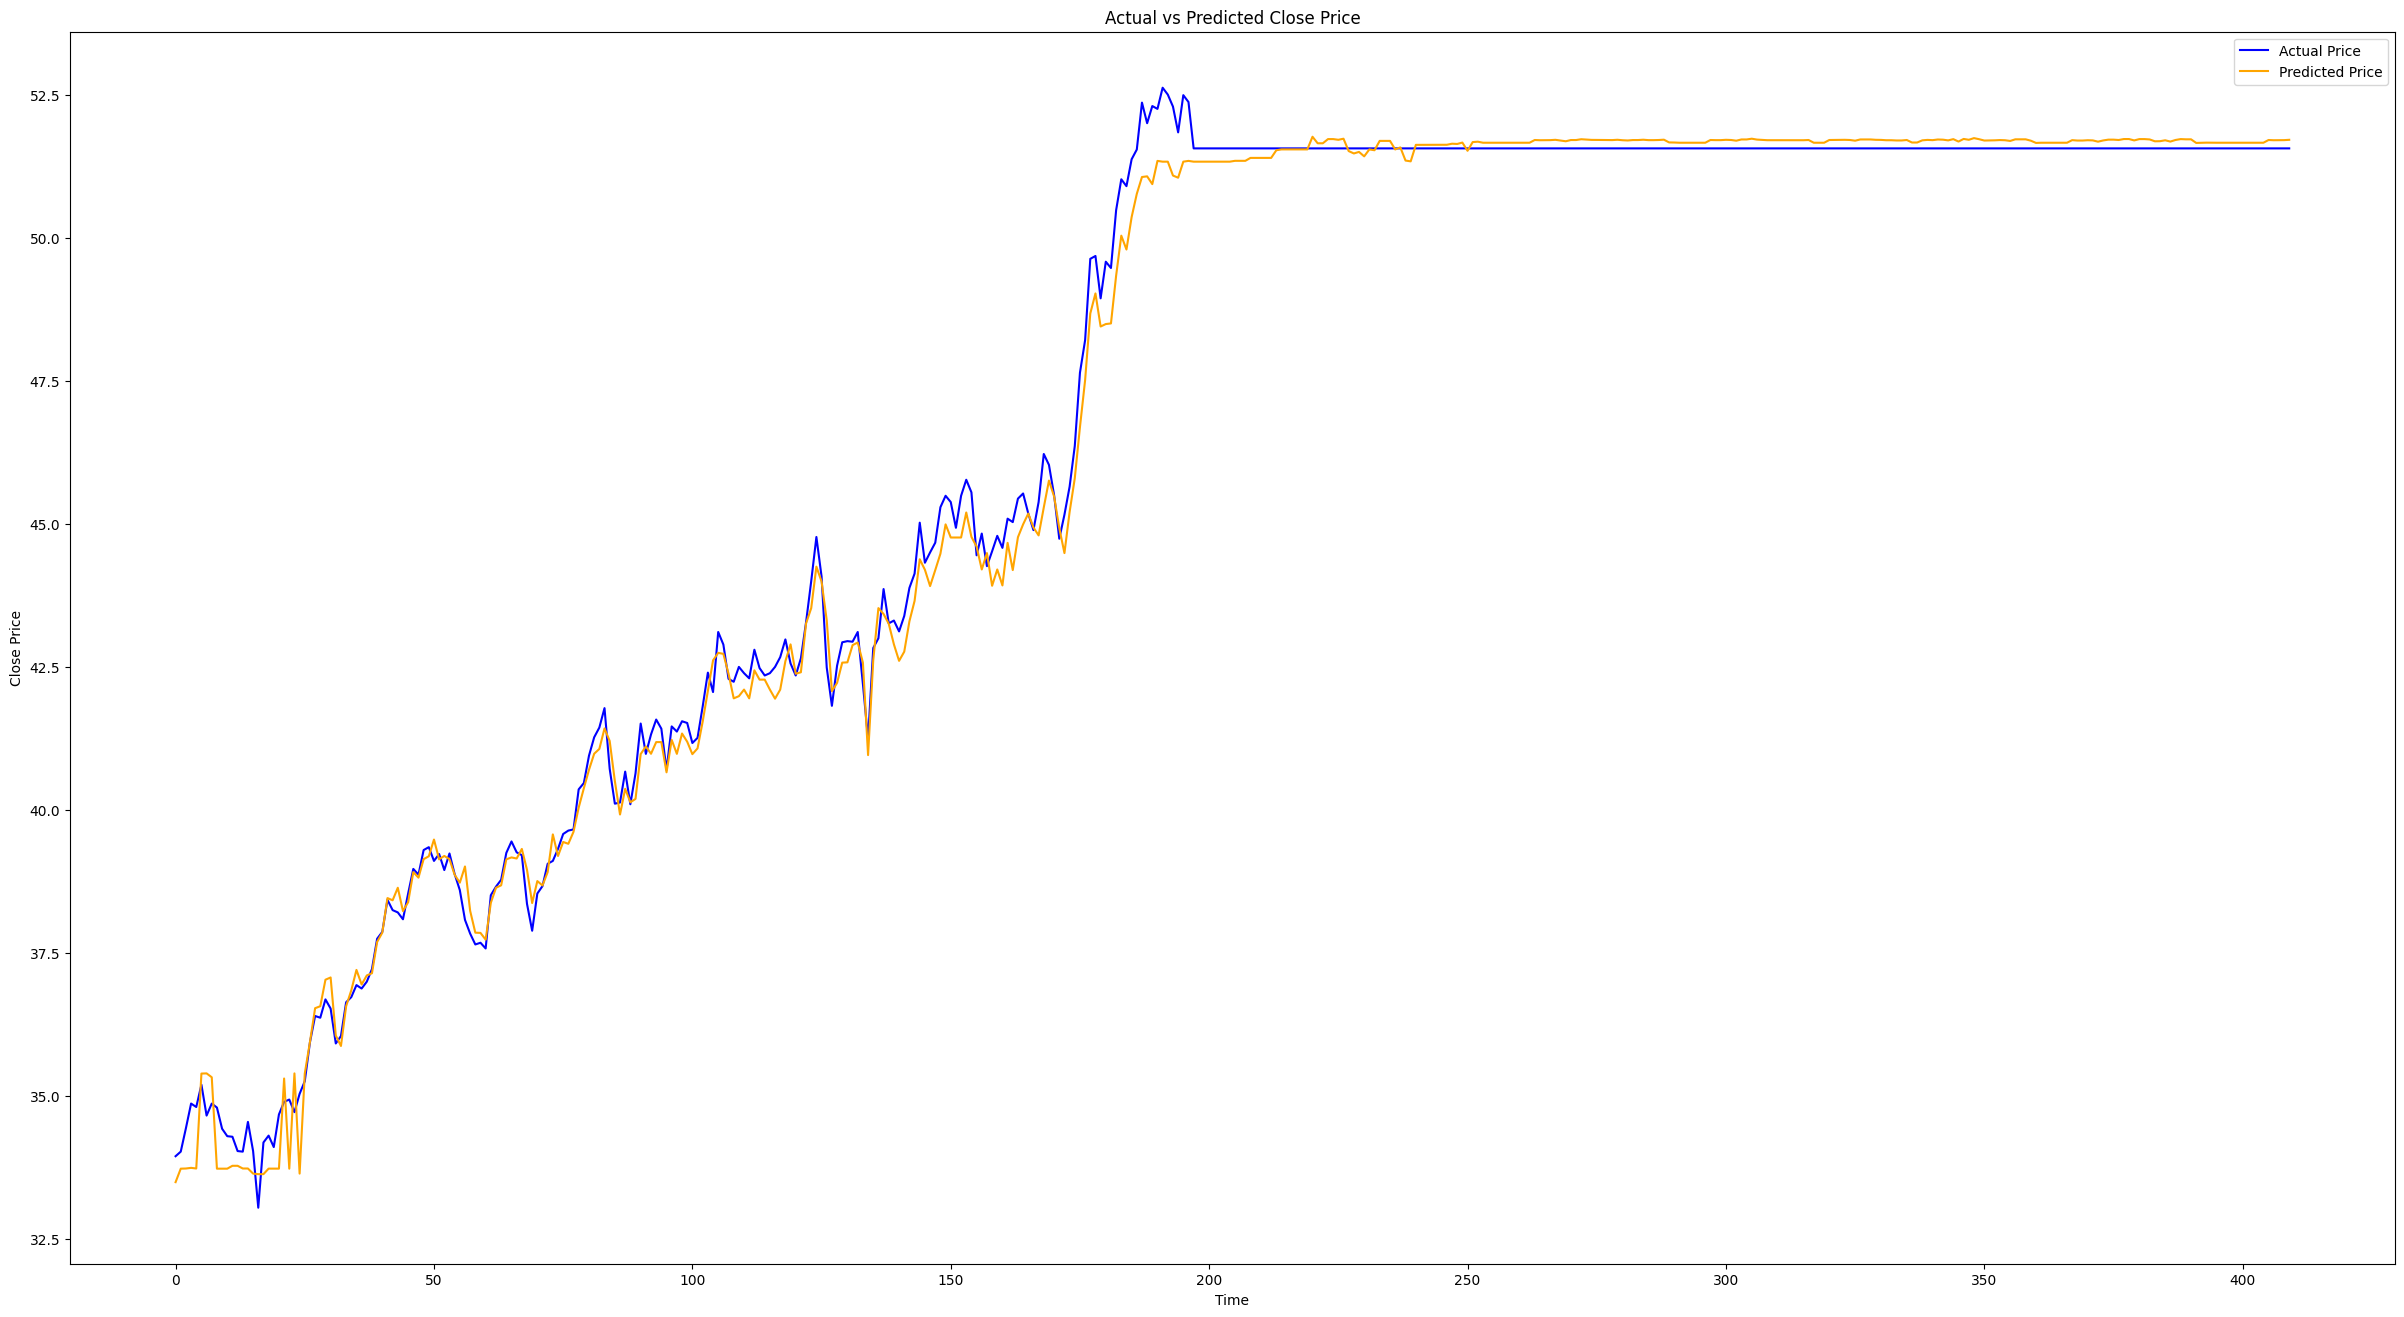

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  ES 

Mean Squared Error: 0.10998767738072246
Root Mean Squared Error (RMSE): 0.33164390146770745
R-squared: 0.8900123226192775
Mean Squared Error: 0.10998767738072246
Root Mean Squared Error (RMSE): 0.33164390146770745
Mean Squared Error: 0.7699105143732298
Root Mean Squared Error (RMSE): 0.8774454480896404
R-squared: 0.8900123226192775


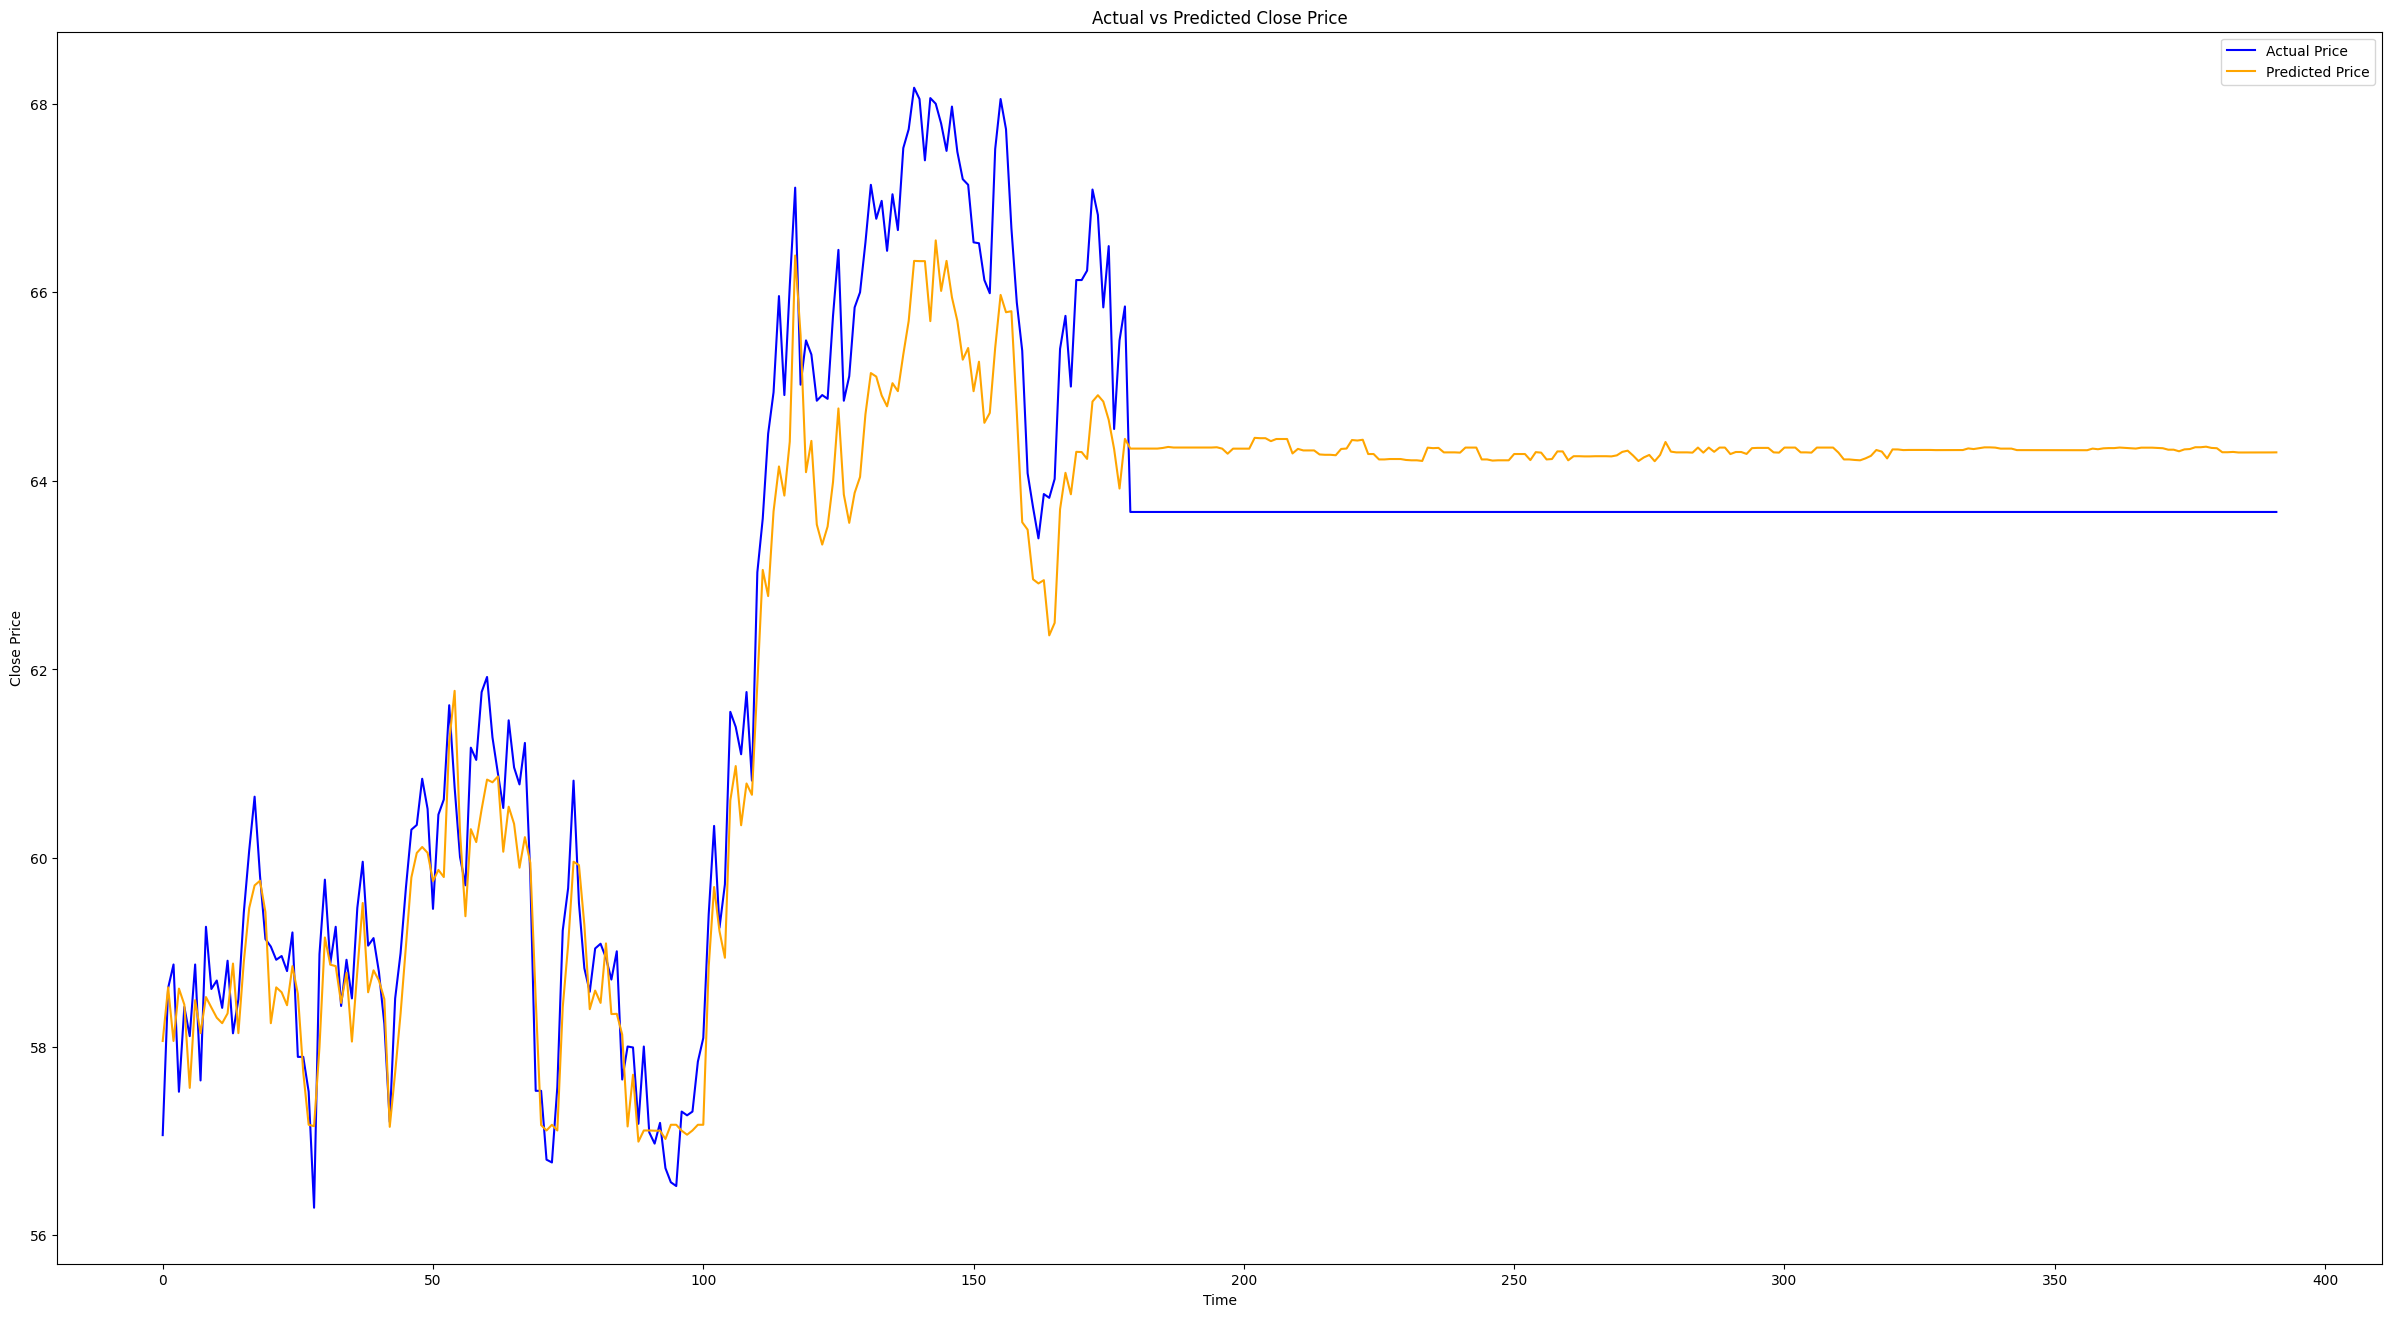

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  XEL 

Mean Squared Error: 0.00736336785501496
Root Mean Squared Error (RMSE): 0.08581006849440781
R-squared: 0.992636632144985
Mean Squared Error: 0.00736336785501496
Root Mean Squared Error (RMSE): 0.08581006849440781
Mean Squared Error: 0.22370824321331428
Root Mean Squared Error (RMSE): 0.4729780578560852
R-squared: 0.992636632144985


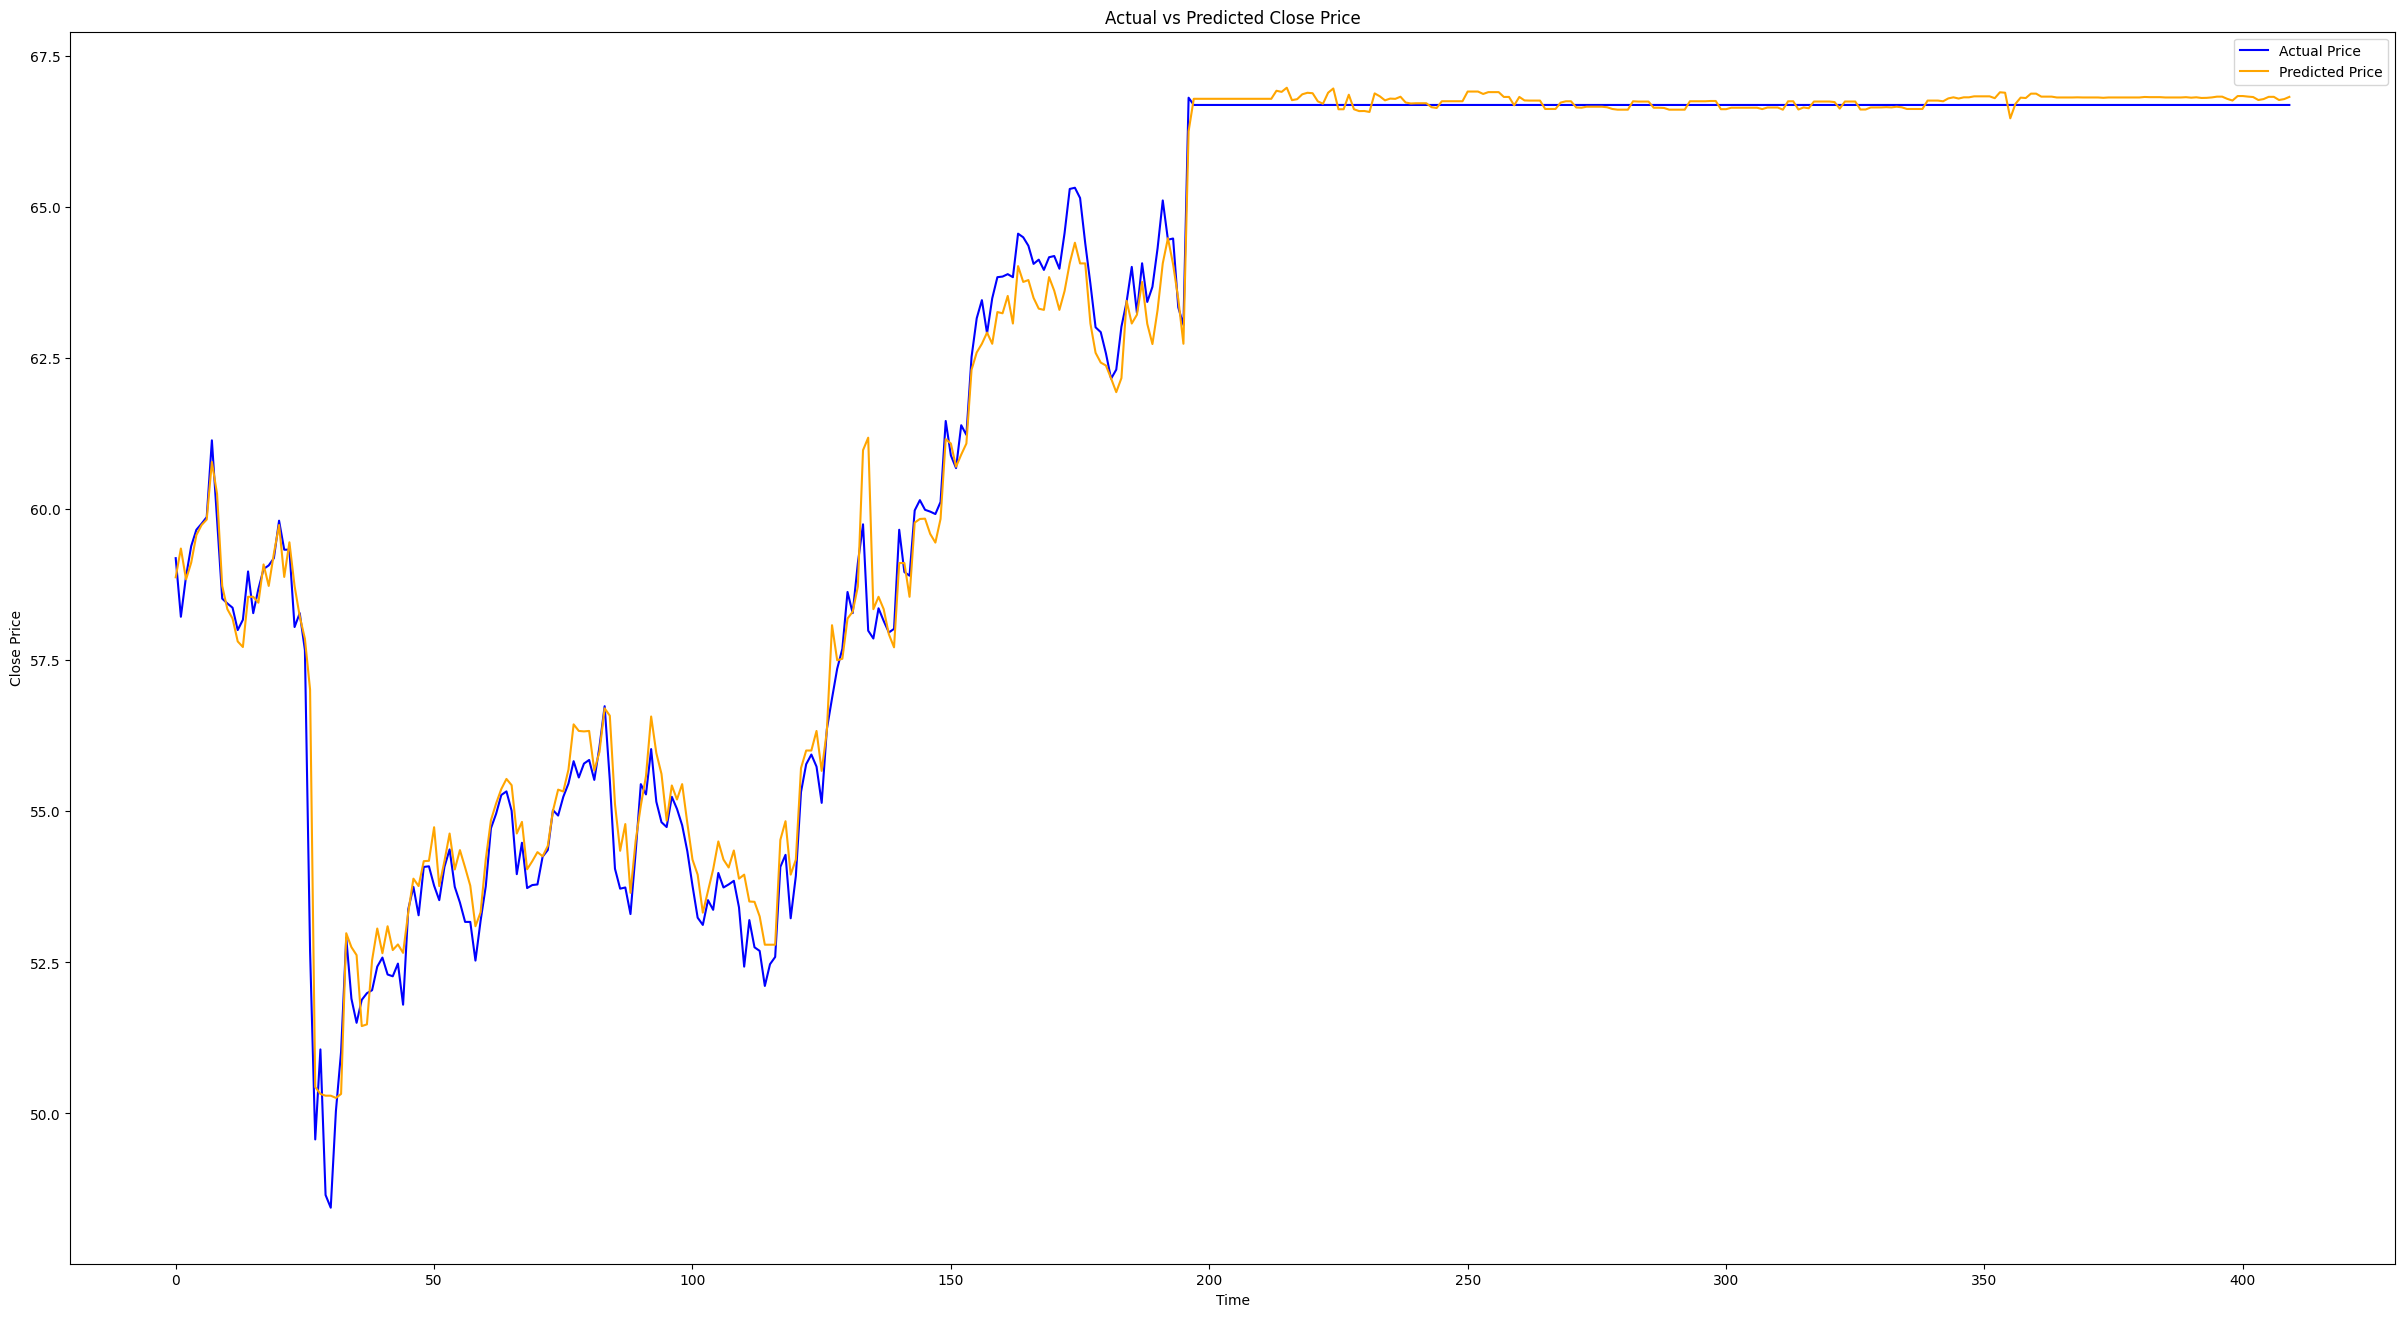

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  WEC 

Mean Squared Error: 0.012735451060728181
Root Mean Squared Error (RMSE): 0.11285145573154198
R-squared: 0.9872645489392718
Mean Squared Error: 0.012735451060728181
Root Mean Squared Error (RMSE): 0.11285145573154198
Mean Squared Error: 0.6400855902037242
Root Mean Squared Error (RMSE): 0.8000534920889504
R-squared: 0.9872645489392718


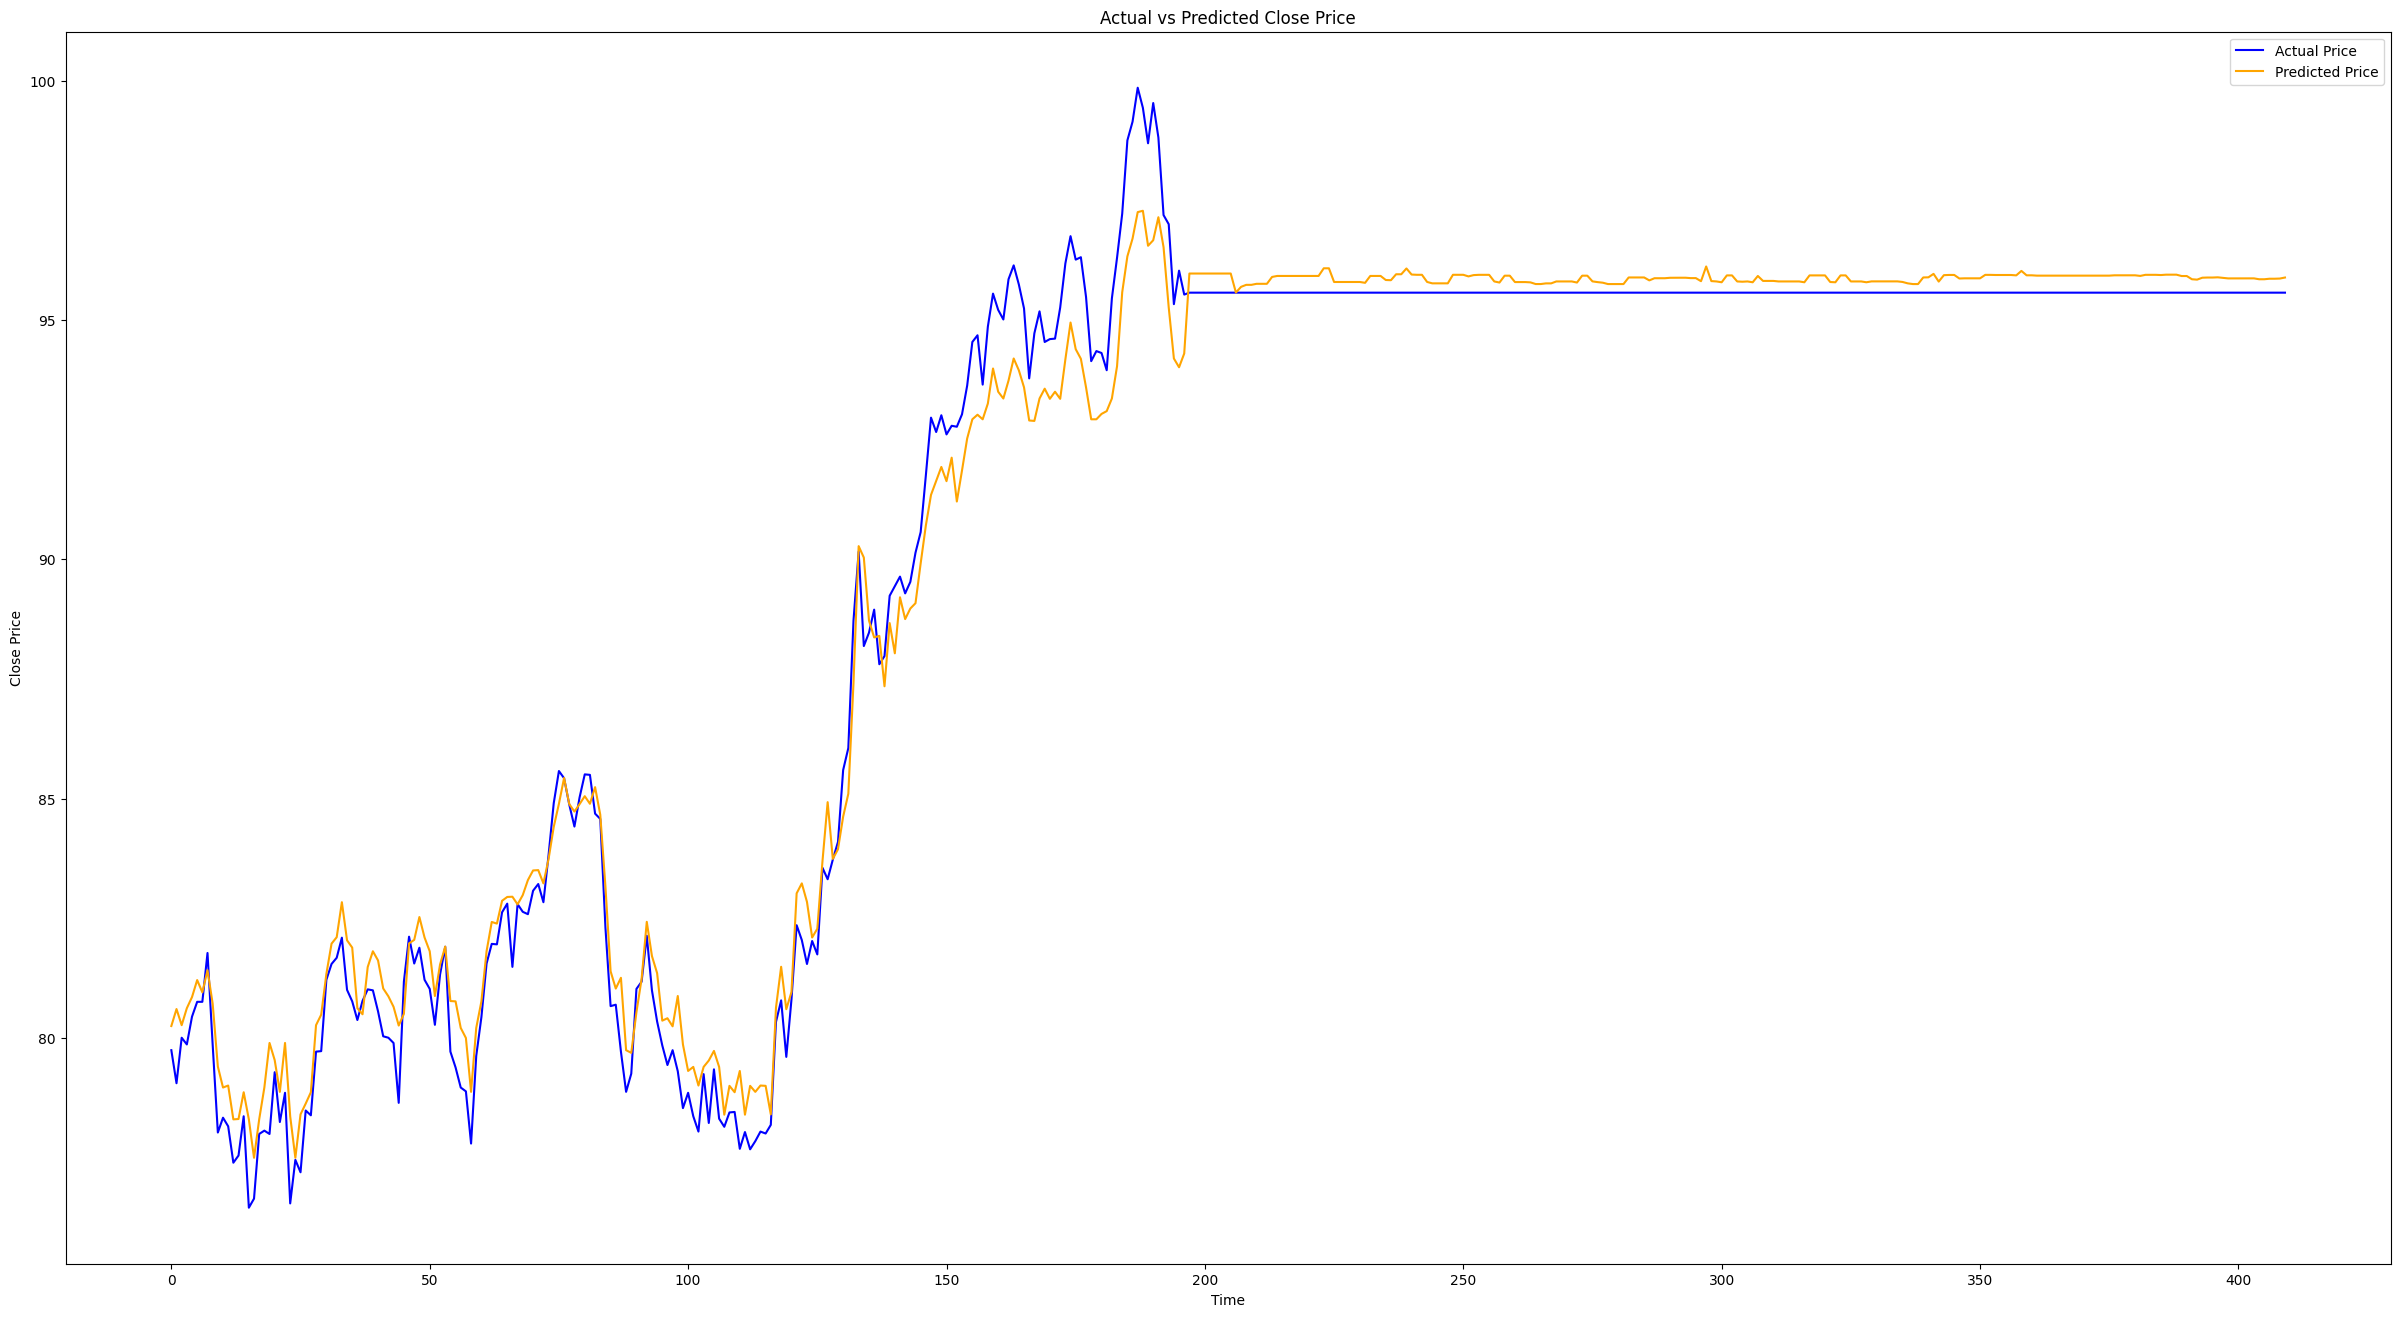

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  PEG 

Mean Squared Error: 0.006935415517032065
Root Mean Squared Error (RMSE): 0.08327914214875214
R-squared: 0.993064584482968
Mean Squared Error: 0.006935415517032065
Root Mean Squared Error (RMSE): 0.08327914214875214
Mean Squared Error: 0.622332245311785
Root Mean Squared Error (RMSE): 0.7888803745256849
R-squared: 0.993064584482968


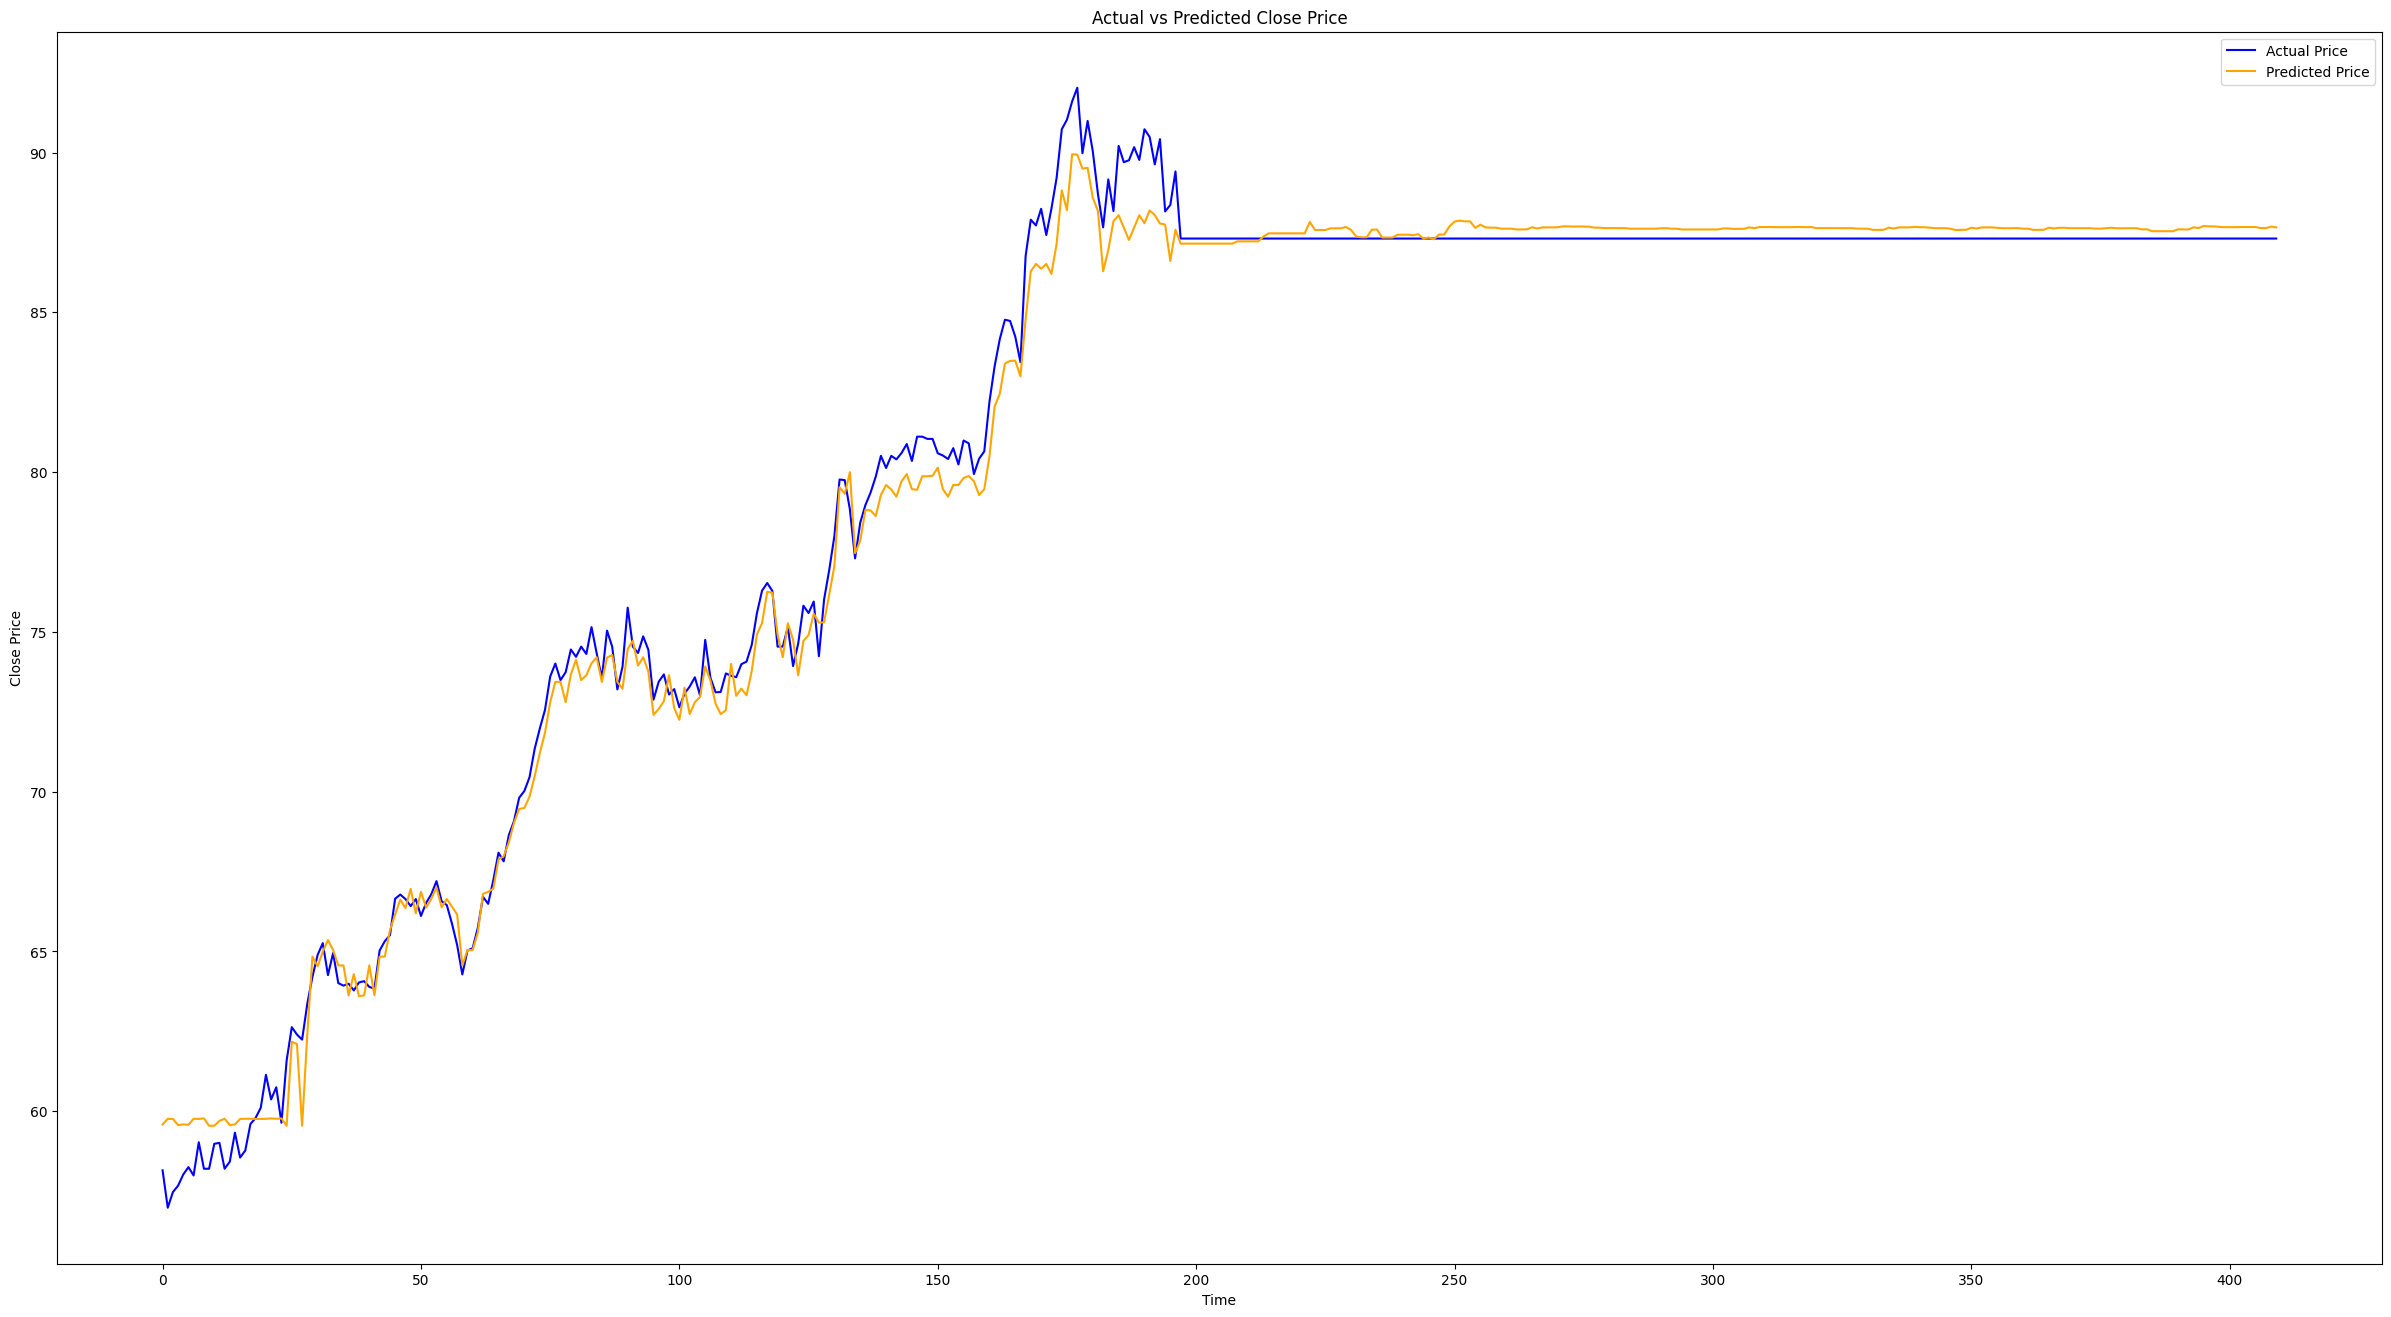

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  DTE 

Mean Squared Error: 0.03421632501862432
Root Mean Squared Error (RMSE): 0.184976552618499
R-squared: 0.9657836749813756
Mean Squared Error: 0.03421632501862432
Root Mean Squared Error (RMSE): 0.184976552618499
Mean Squared Error: 1.2303820708827626
Root Mean Squared Error (RMSE): 1.1092258881232273
R-squared: 0.9657836749813756


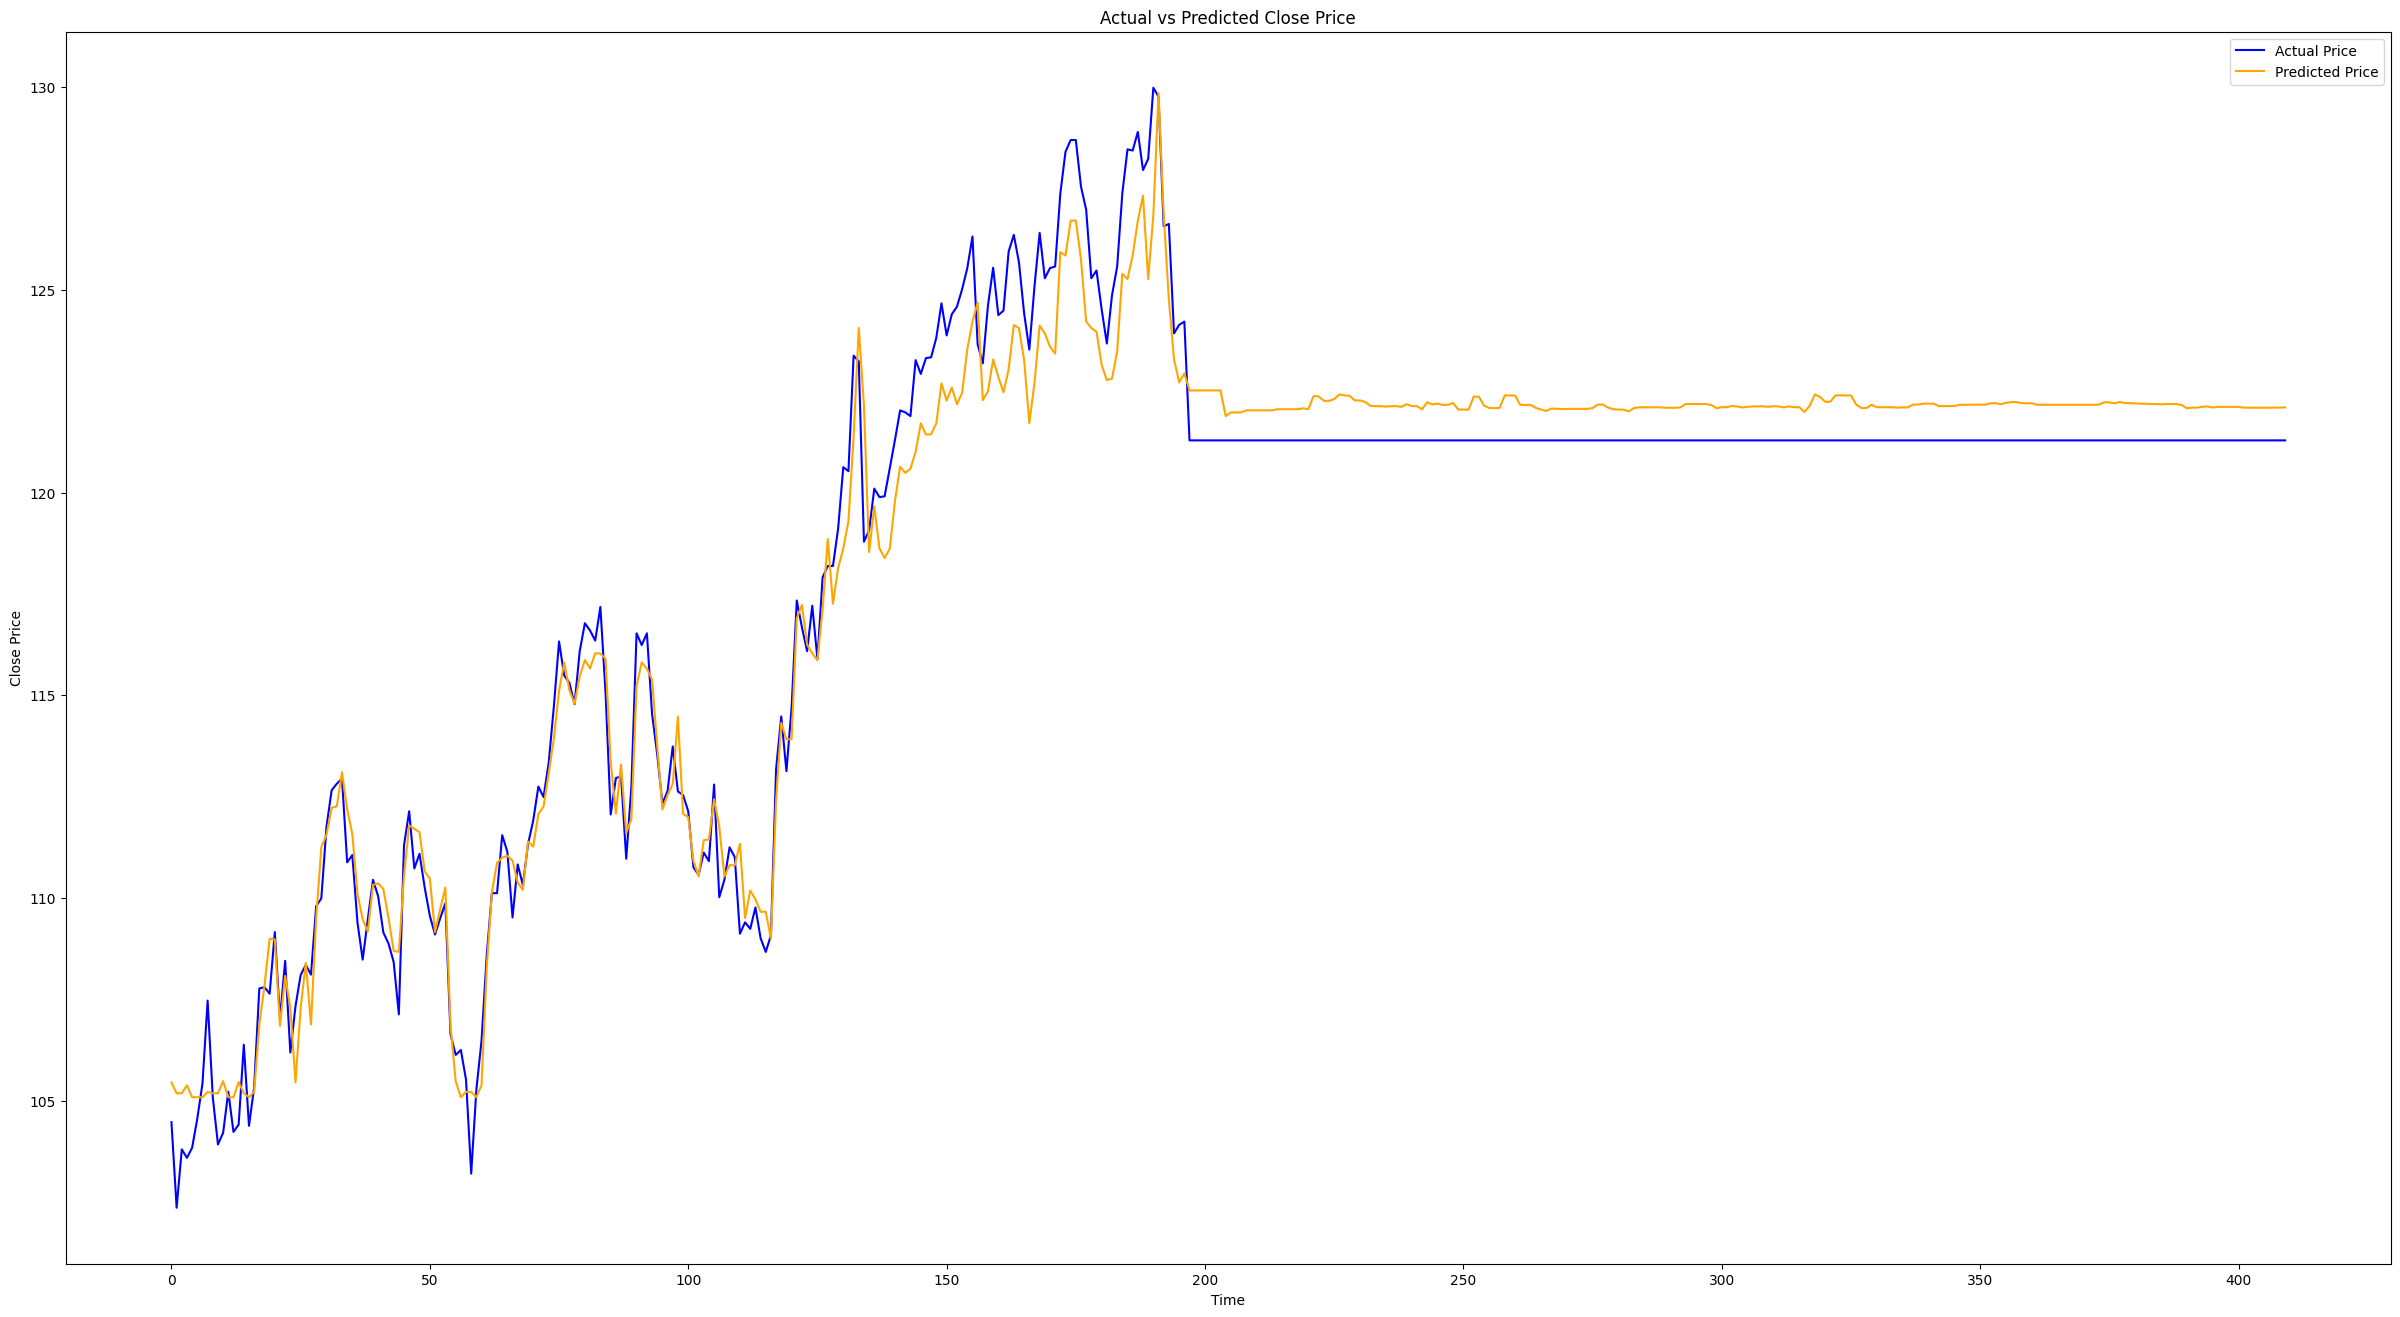

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  LVS 

Mean Squared Error: 0.14884741228365958
Root Mean Squared Error (RMSE): 0.385807480854972
R-squared: 0.8511525877163404
Mean Squared Error: 0.14884741228365958
Root Mean Squared Error (RMSE): 0.385807480854972
Mean Squared Error: 0.42936466232304854
Root Mean Squared Error (RMSE): 0.6552592329170559
R-squared: 0.8511525877163404


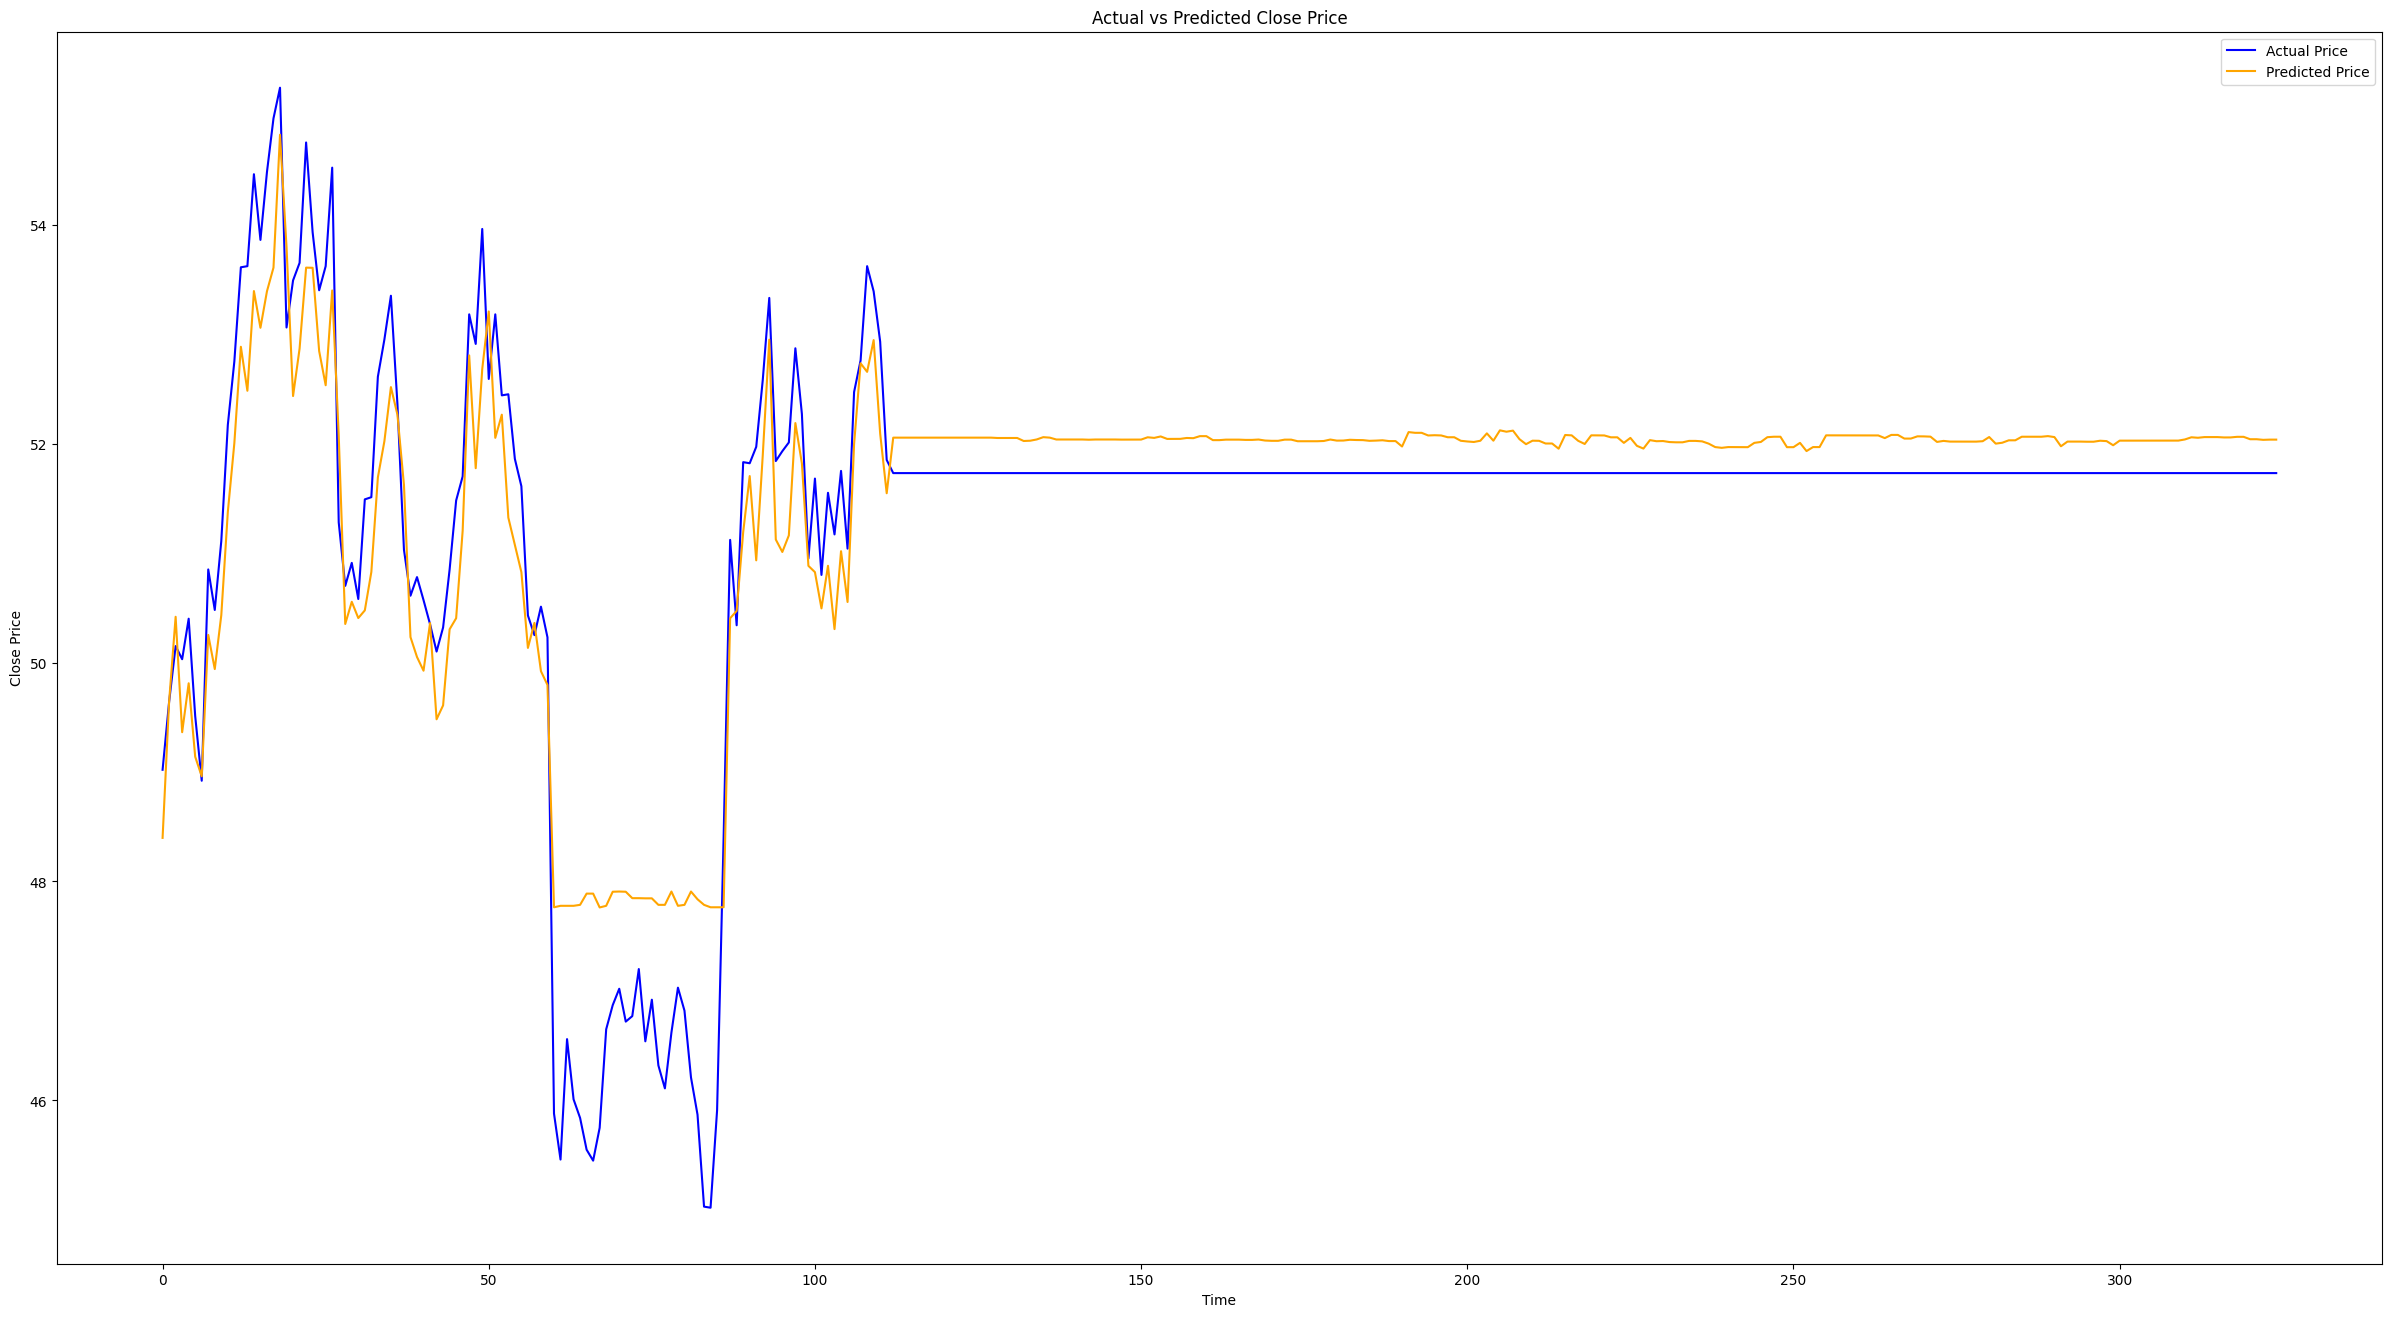

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  MGM 

Mean Squared Error: 0.04054039160808662
Root Mean Squared Error (RMSE): 0.20134644672327004
R-squared: 0.9594596083919134
Mean Squared Error: 0.04054039160808662
Root Mean Squared Error (RMSE): 0.20134644672327004
Mean Squared Error: 0.4092936275887228
Root Mean Squared Error (RMSE): 0.6397606017790739
R-squared: 0.9594596083919134


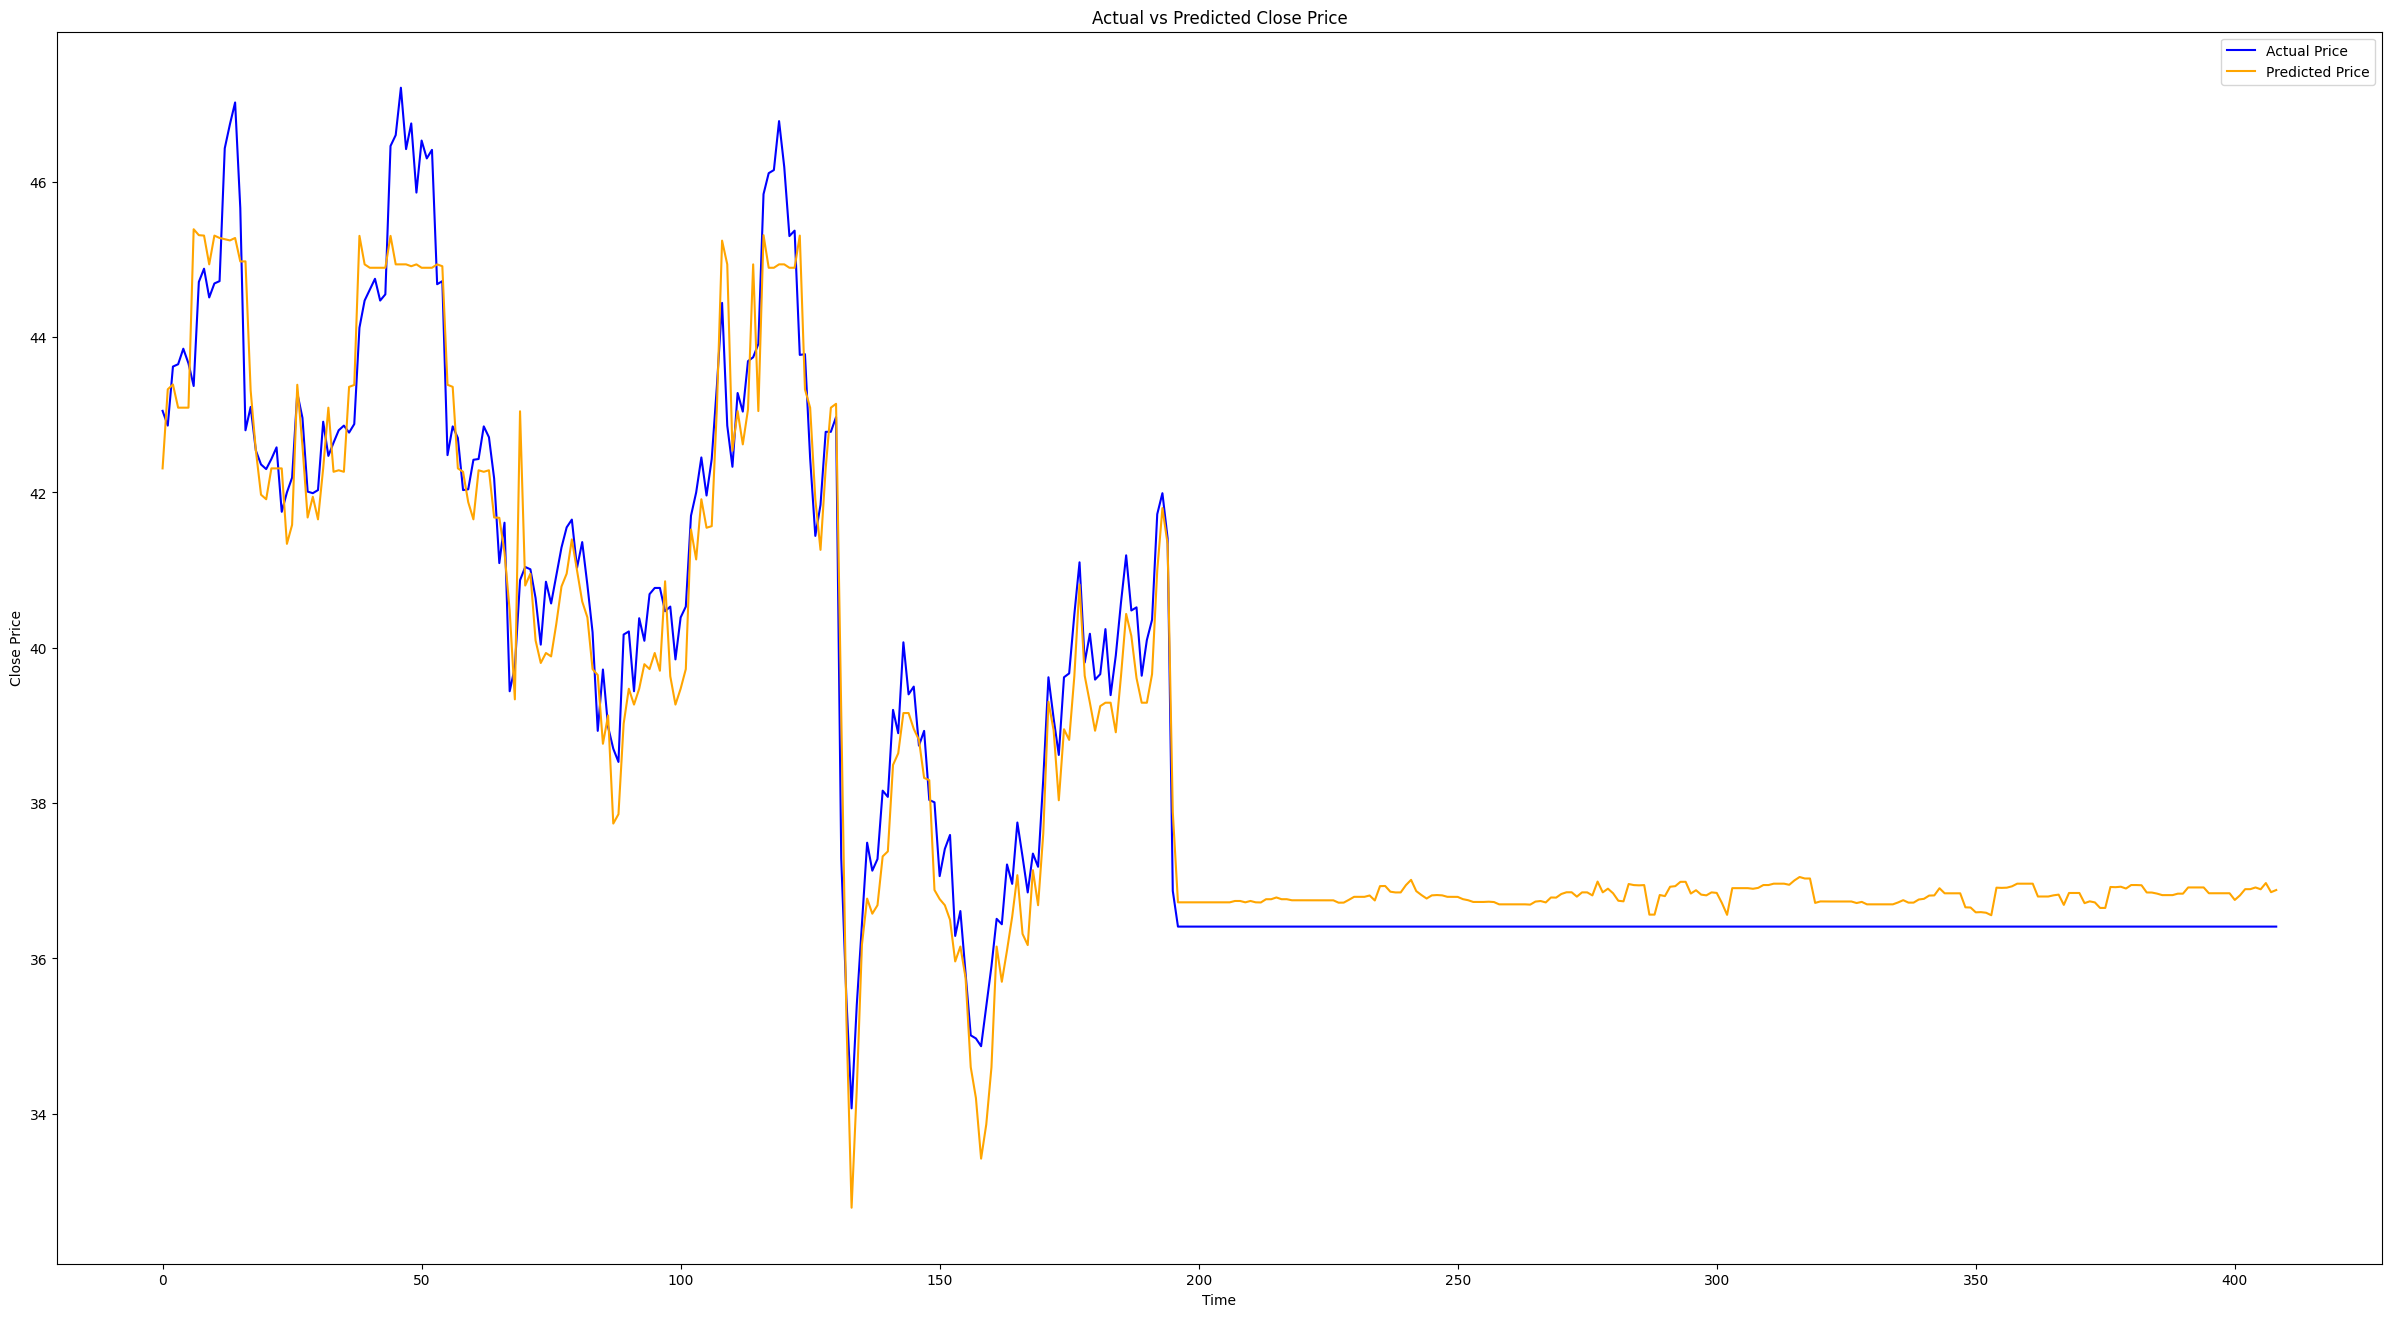

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  HOG 

Mean Squared Error: 0.041482690913259665
Root Mean Squared Error (RMSE): 0.20367299996135882
R-squared: 0.9585173090867404
Mean Squared Error: 0.041482690913259665
Root Mean Squared Error (RMSE): 0.20367299996135882
Mean Squared Error: 0.23134392526347558
Root Mean Squared Error (RMSE): 0.48098225046614307
R-squared: 0.9585173090867404


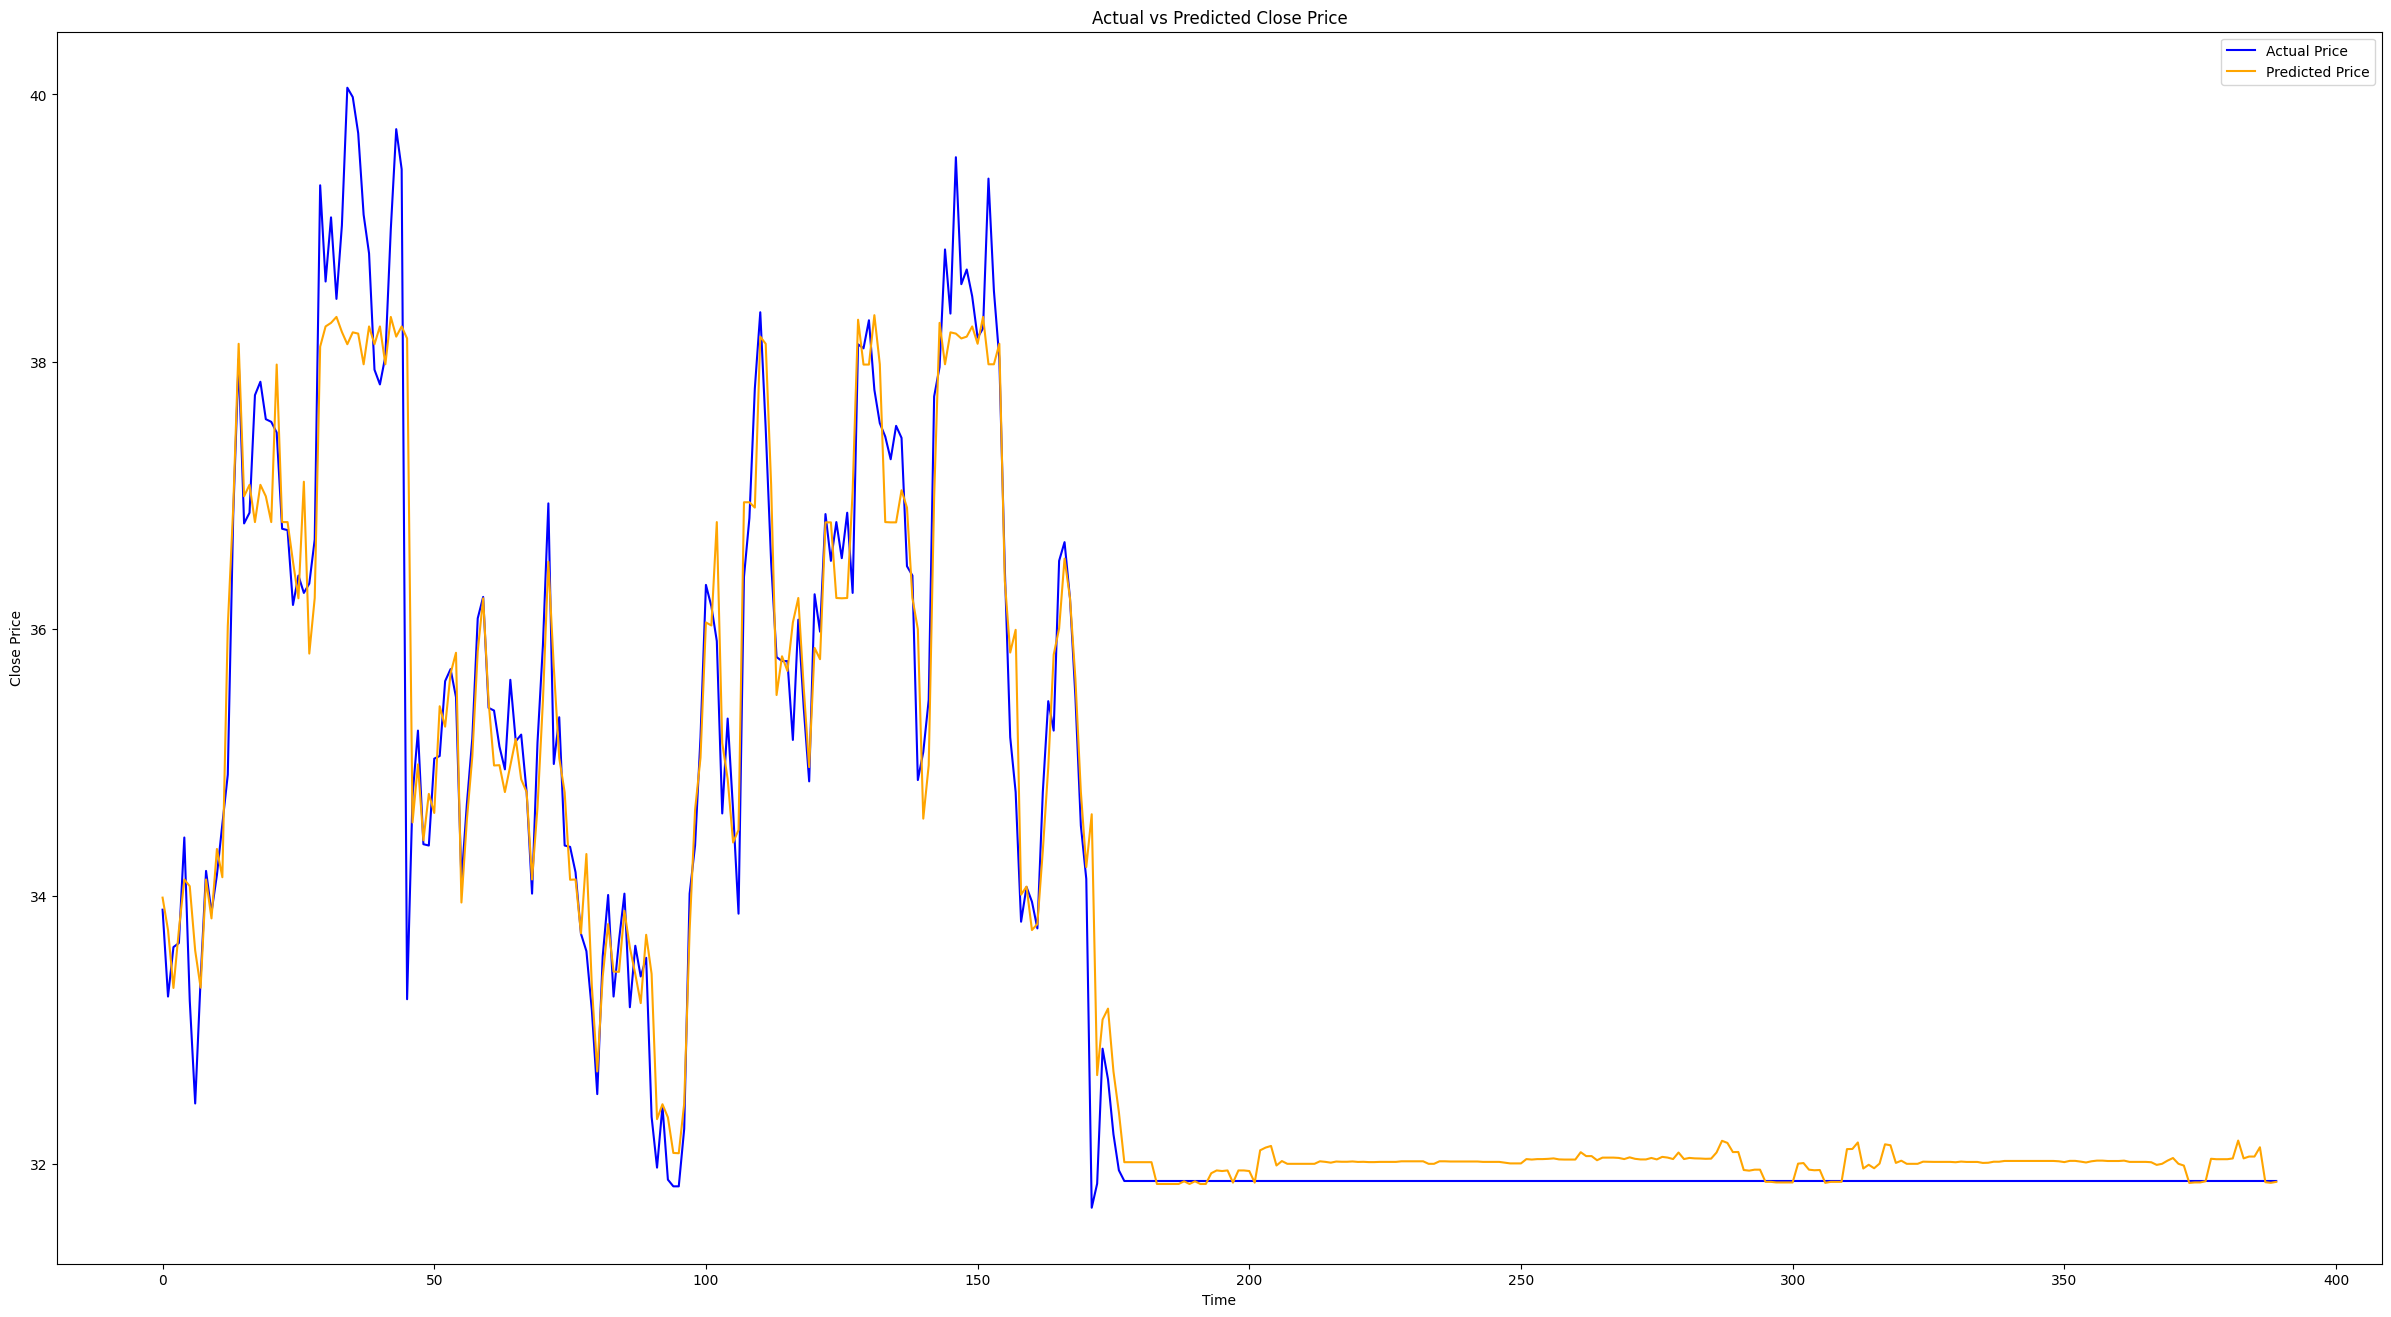

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BBBY']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


'NoneType' object has no attribute 'iloc' BBBY


[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  DHI 

Mean Squared Error: 0.03653142498903045
Root Mean Squared Error (RMSE): 0.19113195700622762
R-squared: 0.9634685750109695
Mean Squared Error: 0.03653142498903045
Root Mean Squared Error (RMSE): 0.19113195700622762
Mean Squared Error: 5.2809935913961095
Root Mean Squared Error (RMSE): 2.2980412510214236
R-squared: 0.9634685750109695


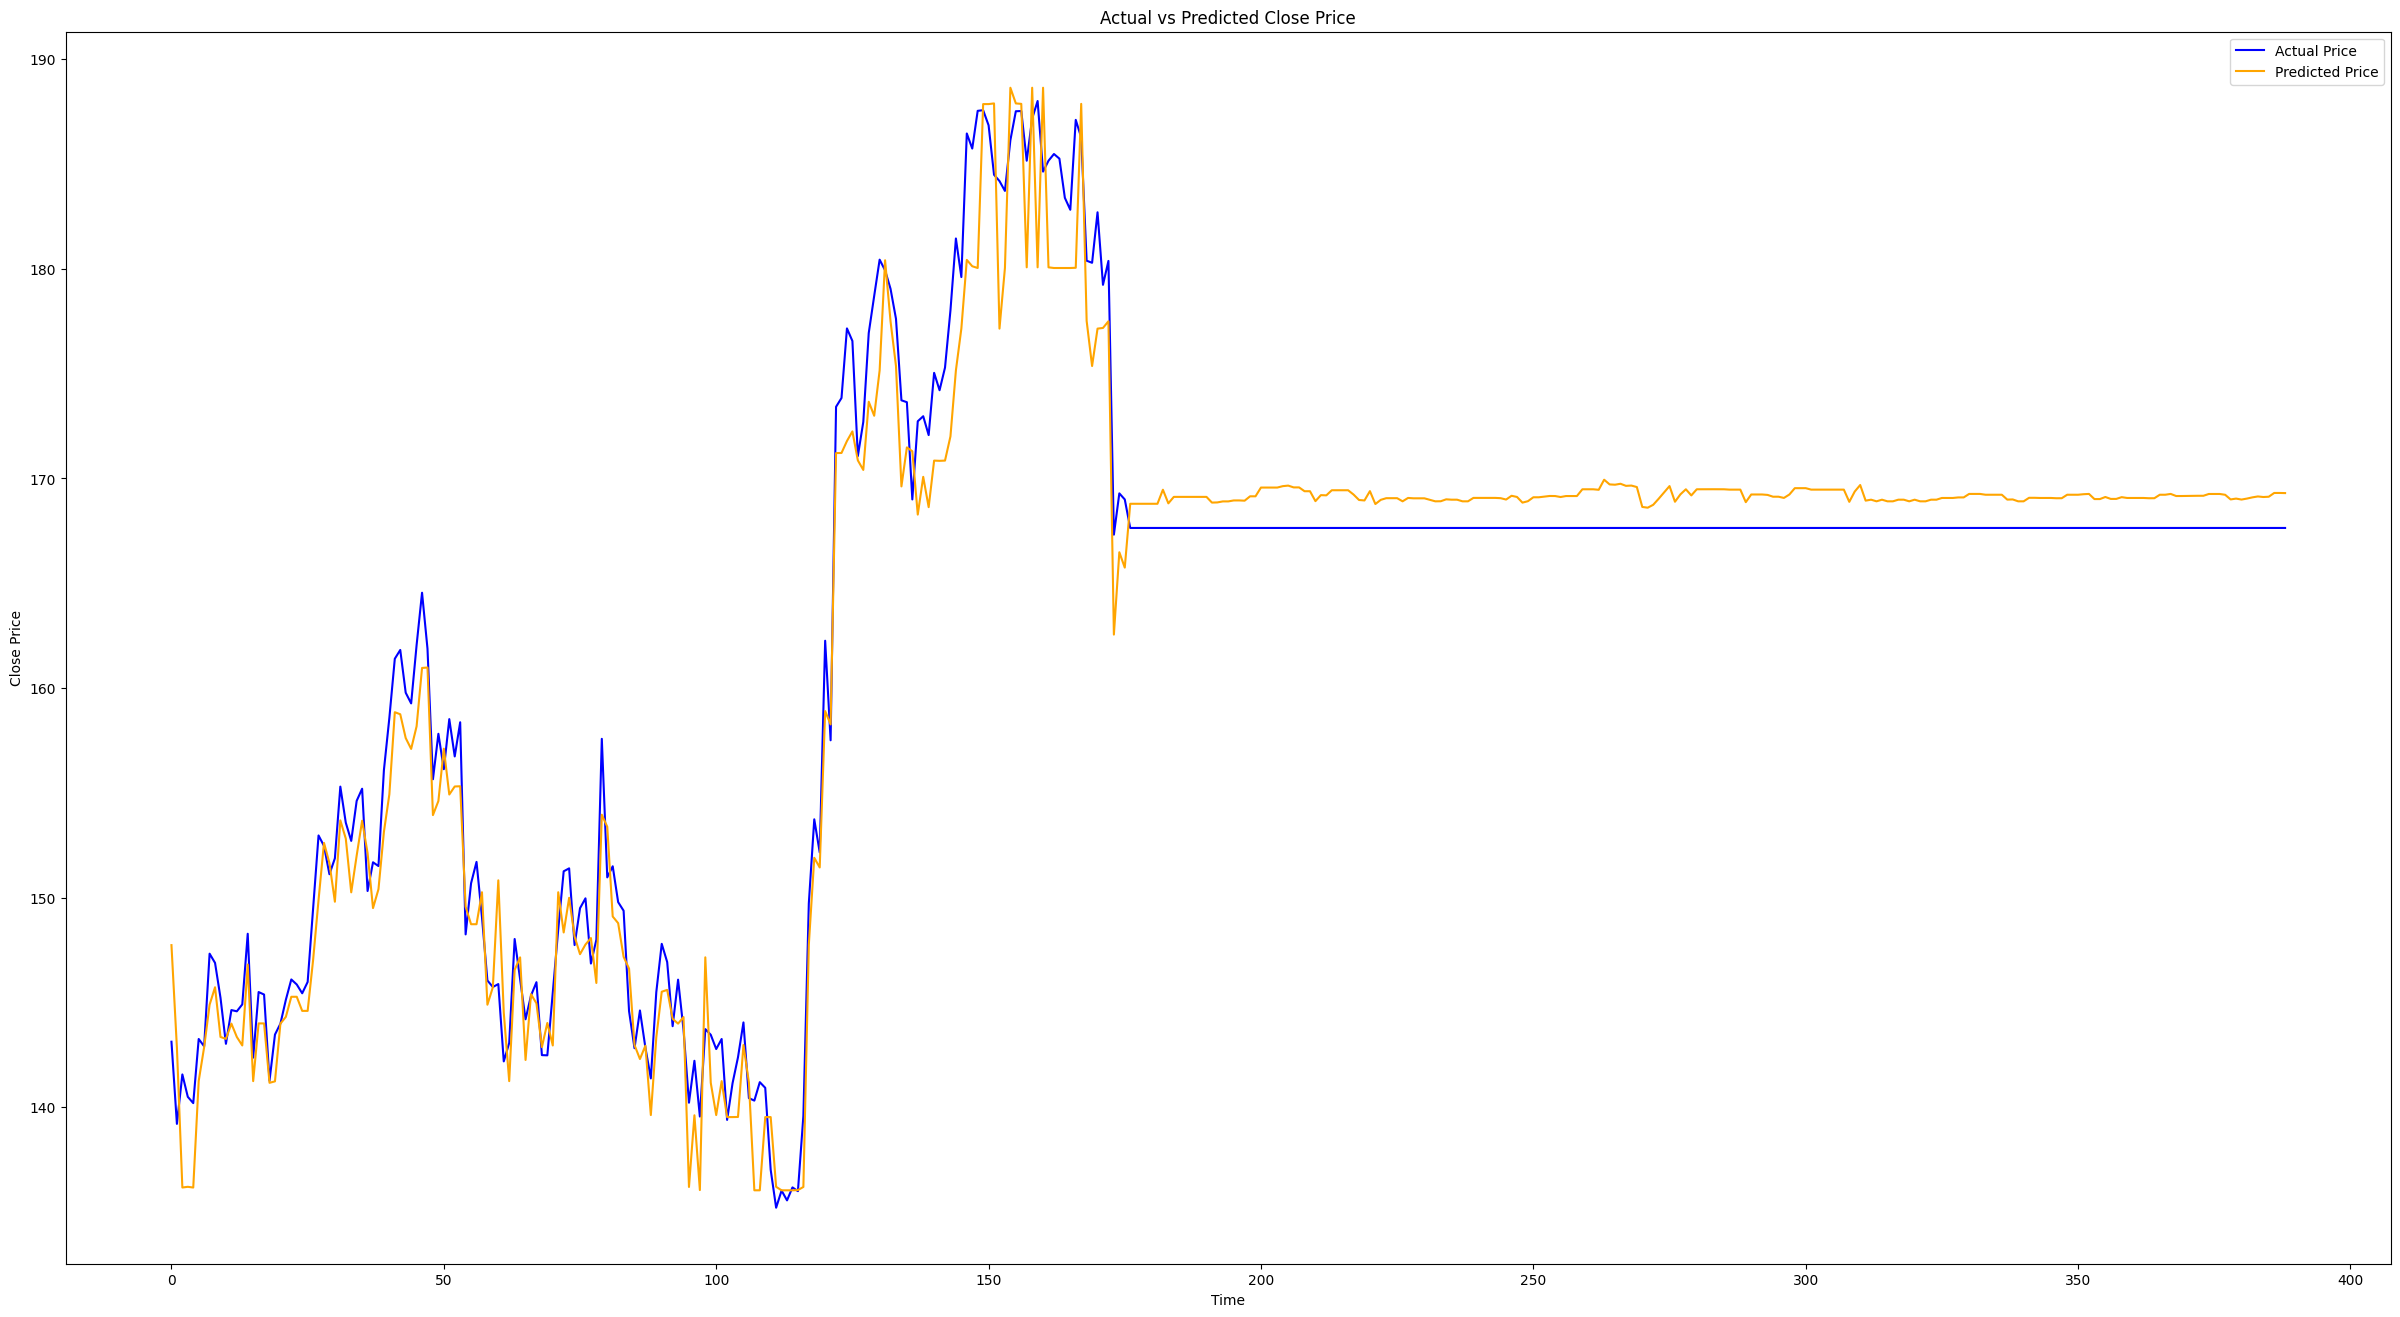

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  UPS 

Mean Squared Error: 0.0002632759374965616
Root Mean Squared Error (RMSE): 0.016225780027368842
R-squared: 0.0
Mean Squared Error: 0.0002632759374965616
Root Mean Squared Error (RMSE): 0.016225780027368842
Mean Squared Error: 0.0002632959737079524
Root Mean Squared Error (RMSE): 0.01622639743467269
R-squared: 0.0


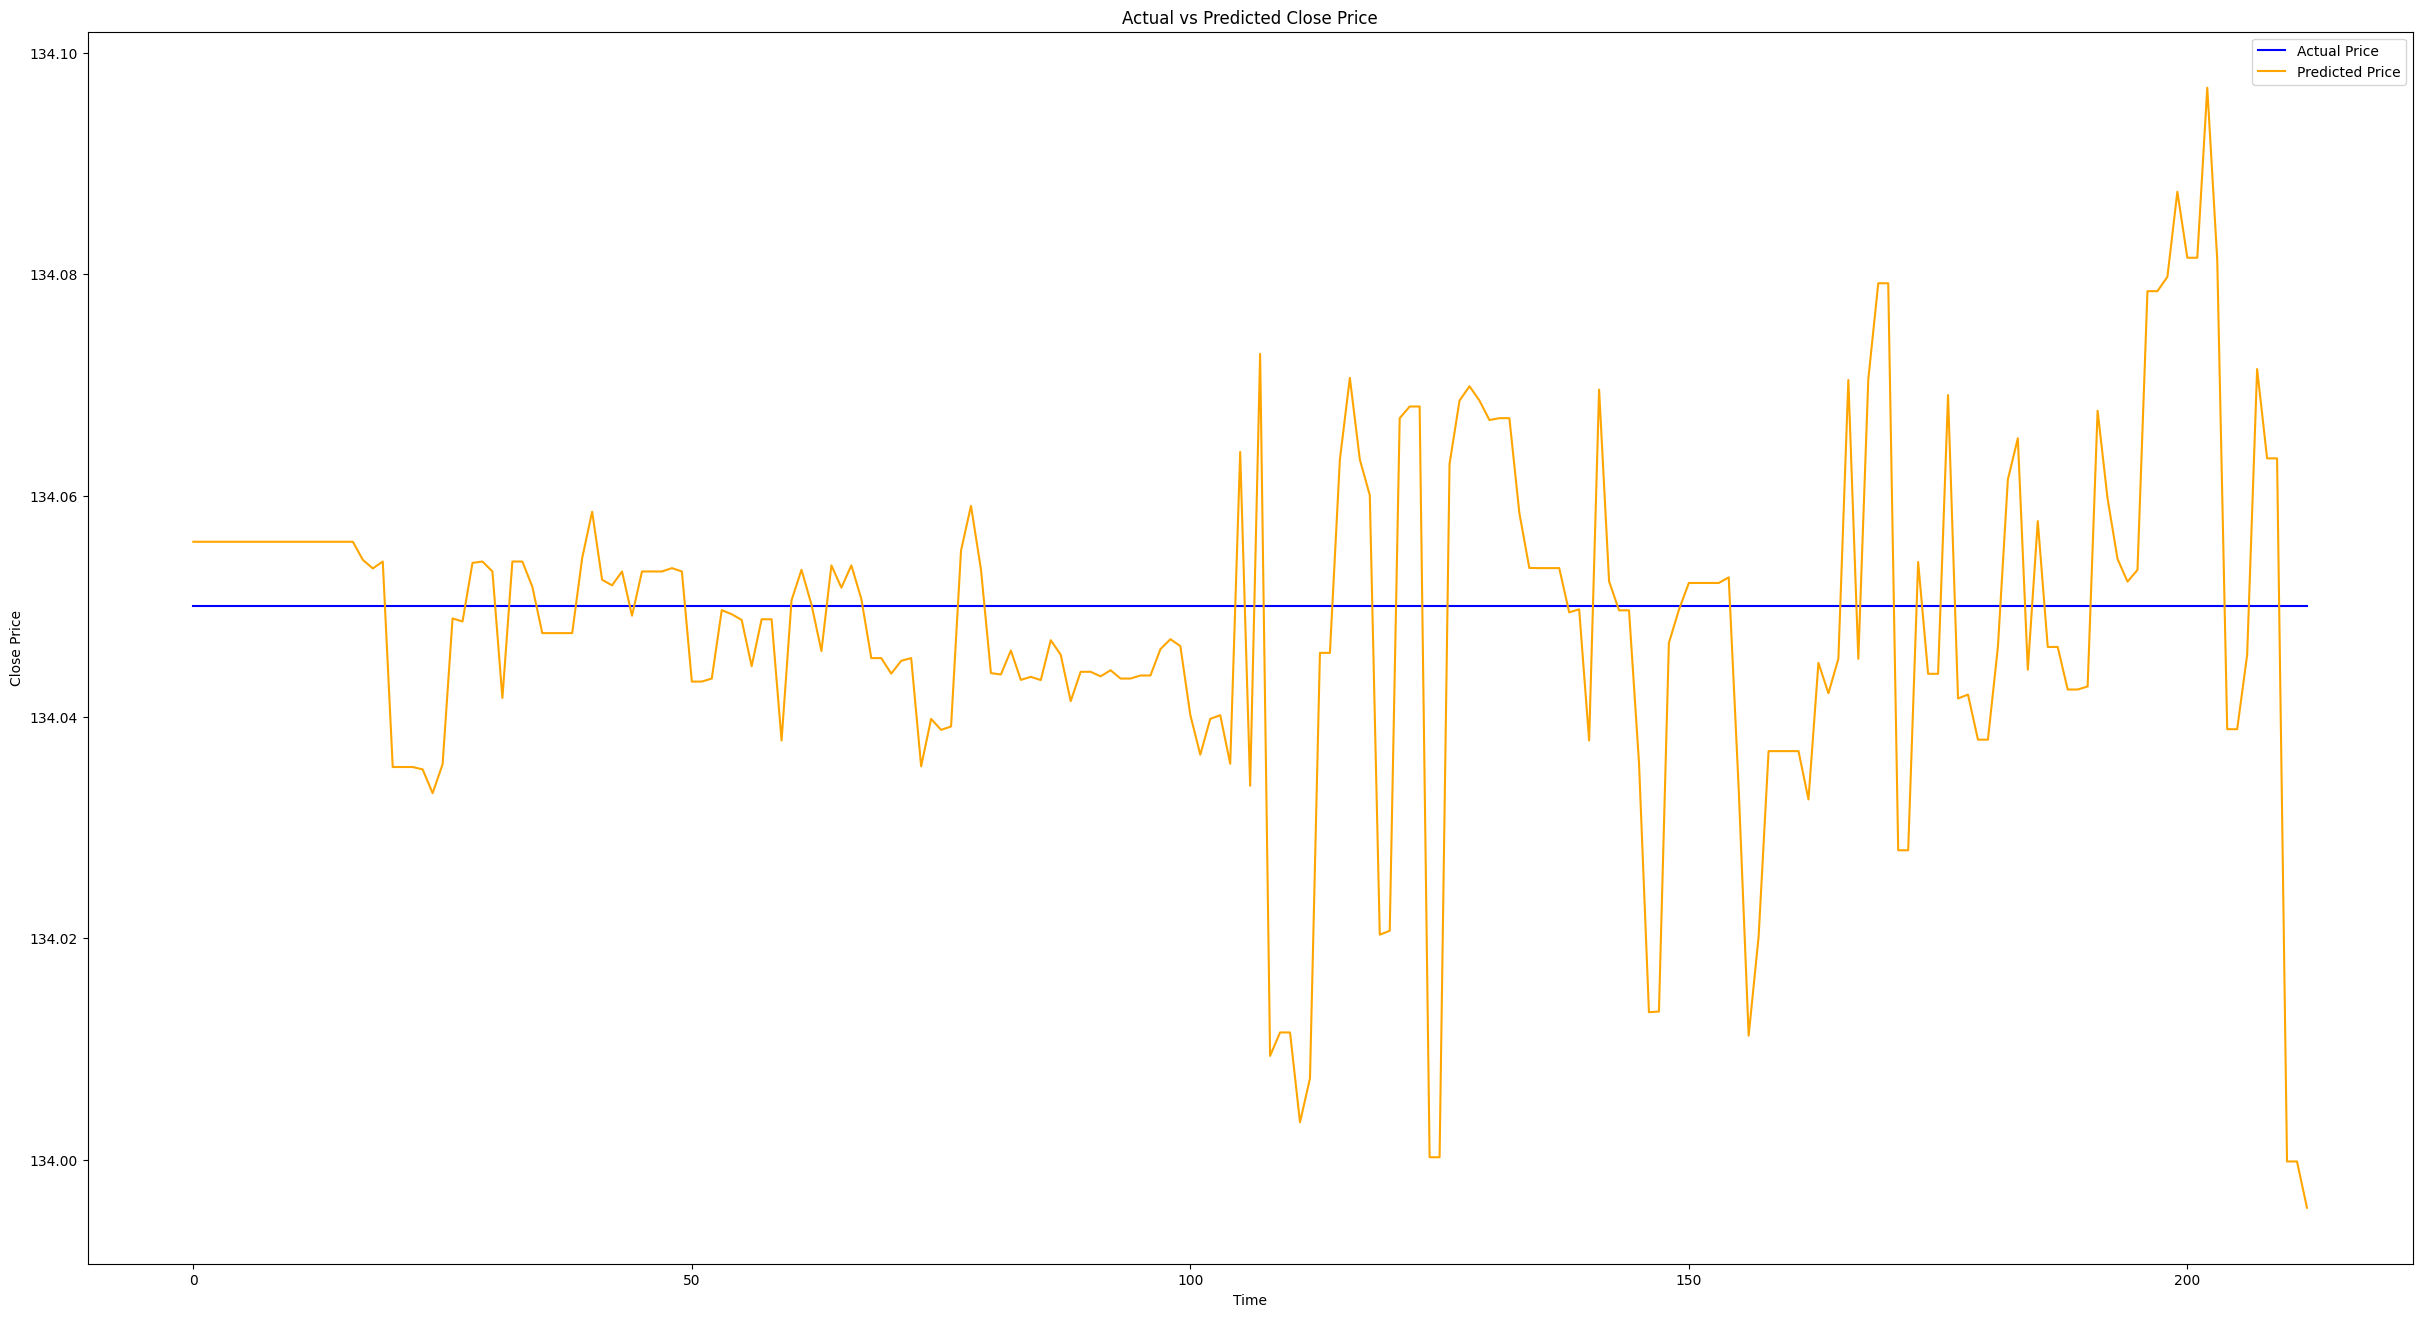

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  FDX 

Mean Squared Error: 0.00012890297597607182
Root Mean Squared Error (RMSE): 0.011353544643681629
R-squared: 0.0
Mean Squared Error: 0.00012890297597607182
Root Mean Squared Error (RMSE): 0.011353544643681629
Mean Squared Error: 0.00012887830675487787
Root Mean Squared Error (RMSE): 0.01135245818115521
R-squared: 0.0


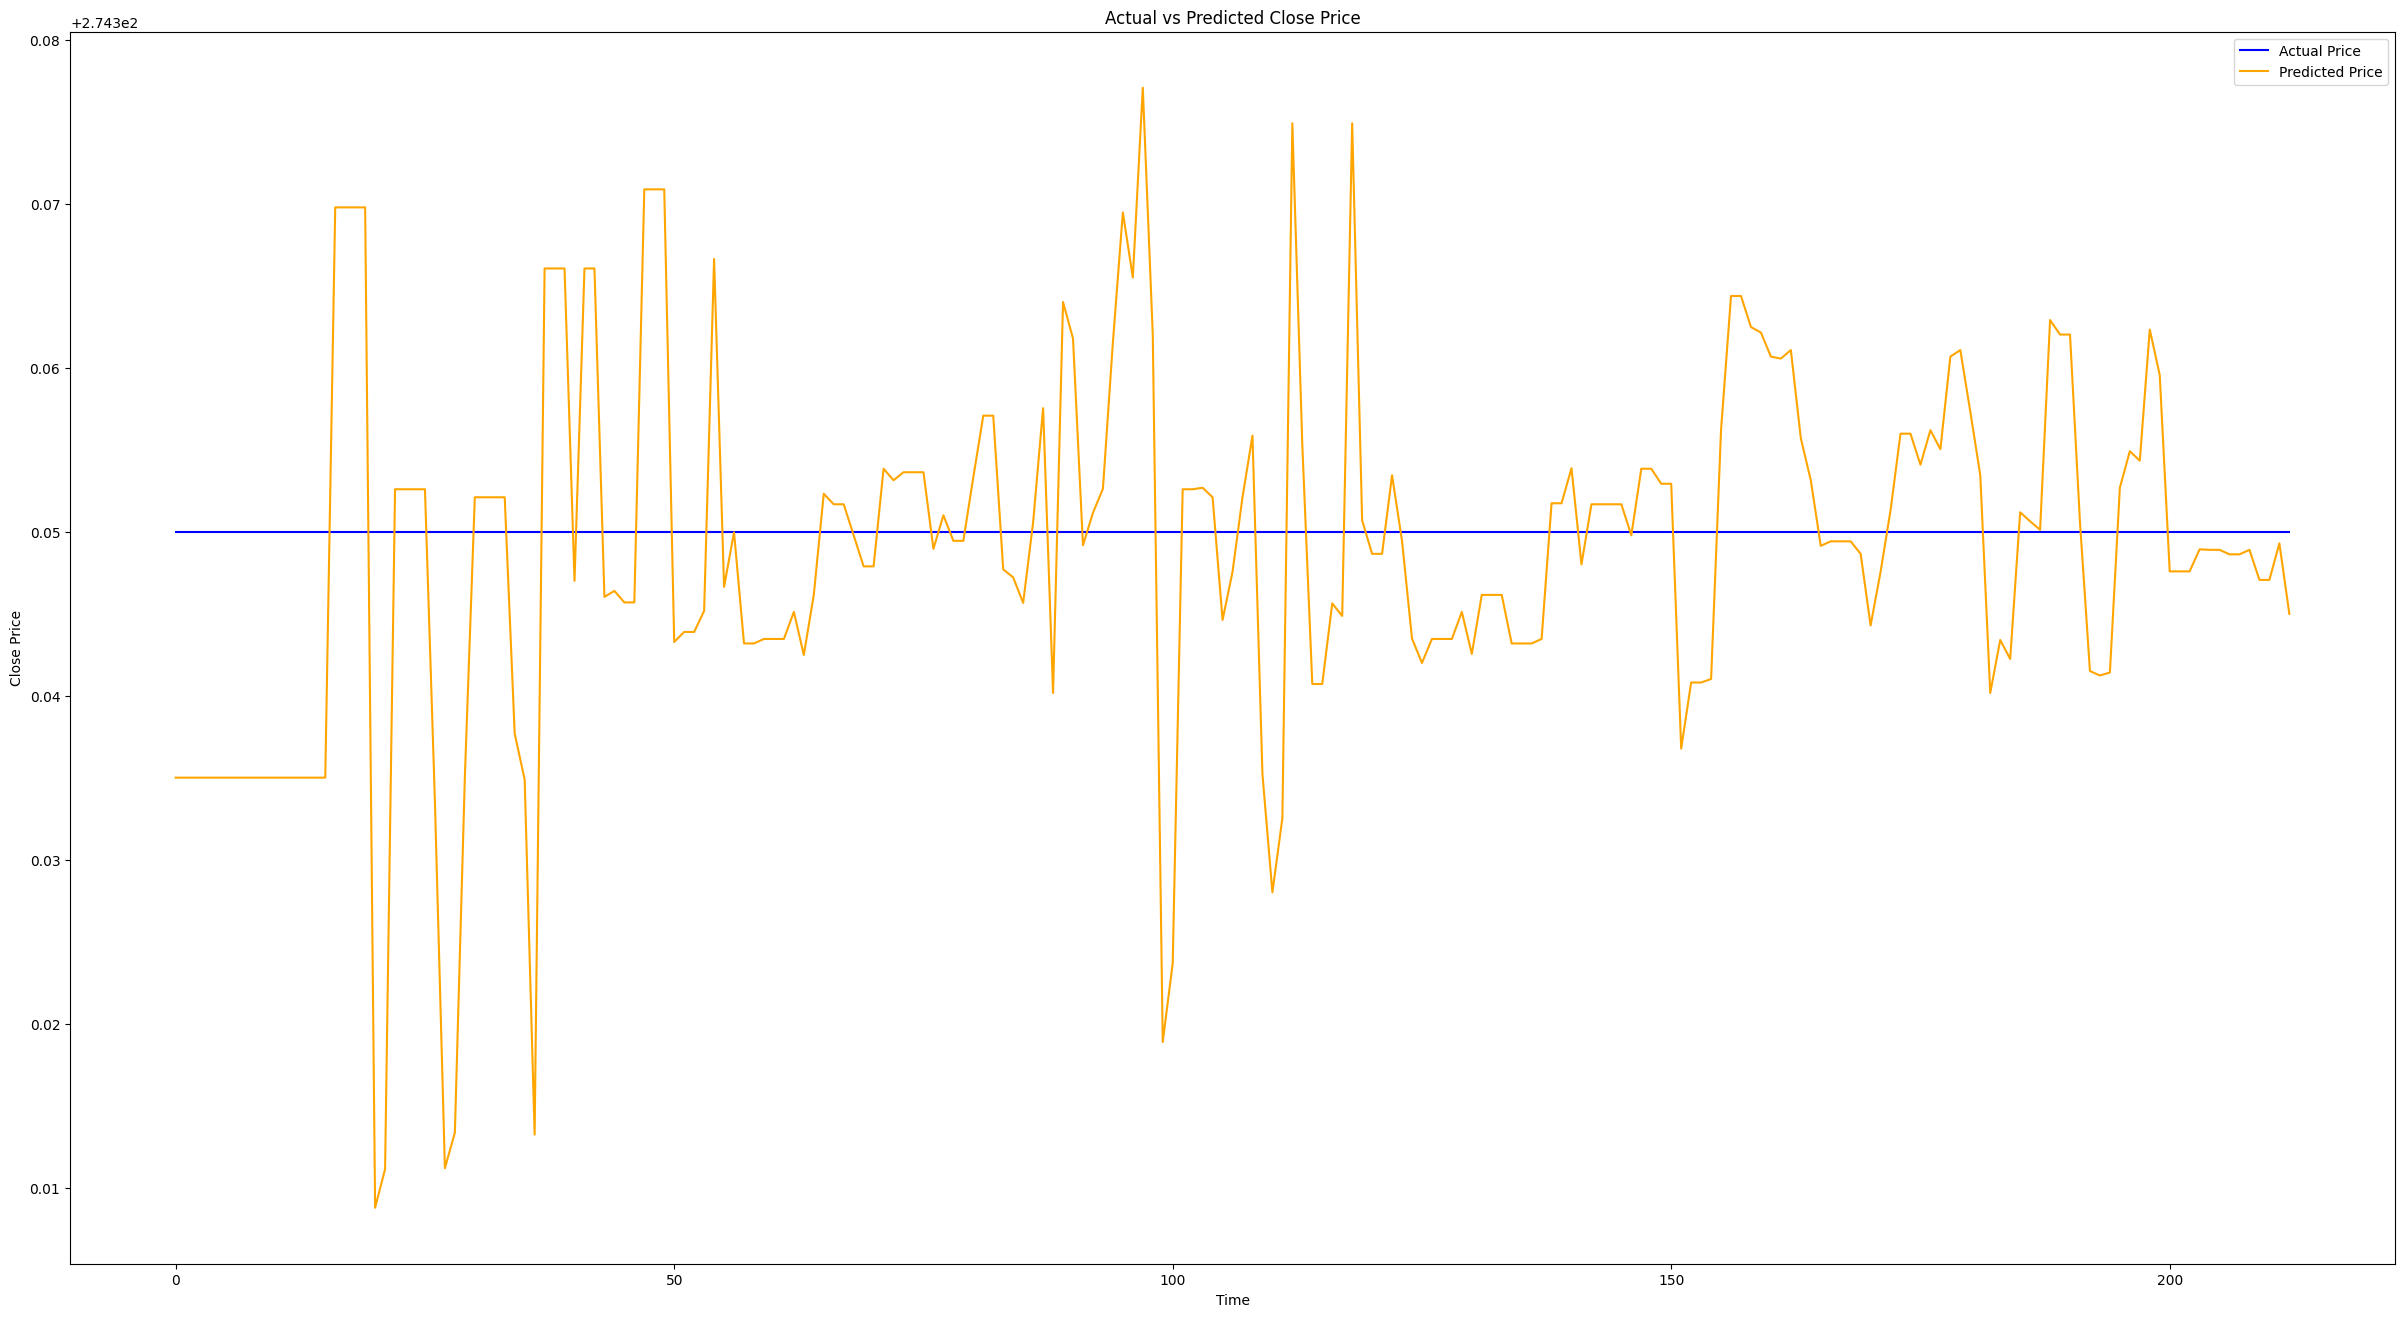

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  ROK 

Mean Squared Error: 0.00028400565941941386
Root Mean Squared Error (RMSE): 0.016852467457895117
R-squared: 0.0
Mean Squared Error: 0.00028400565941941386
Root Mean Squared Error (RMSE): 0.016852467457895117
Mean Squared Error: 0.00028400144106905225
Root Mean Squared Error (RMSE): 0.016852342302156466
R-squared: 0.0


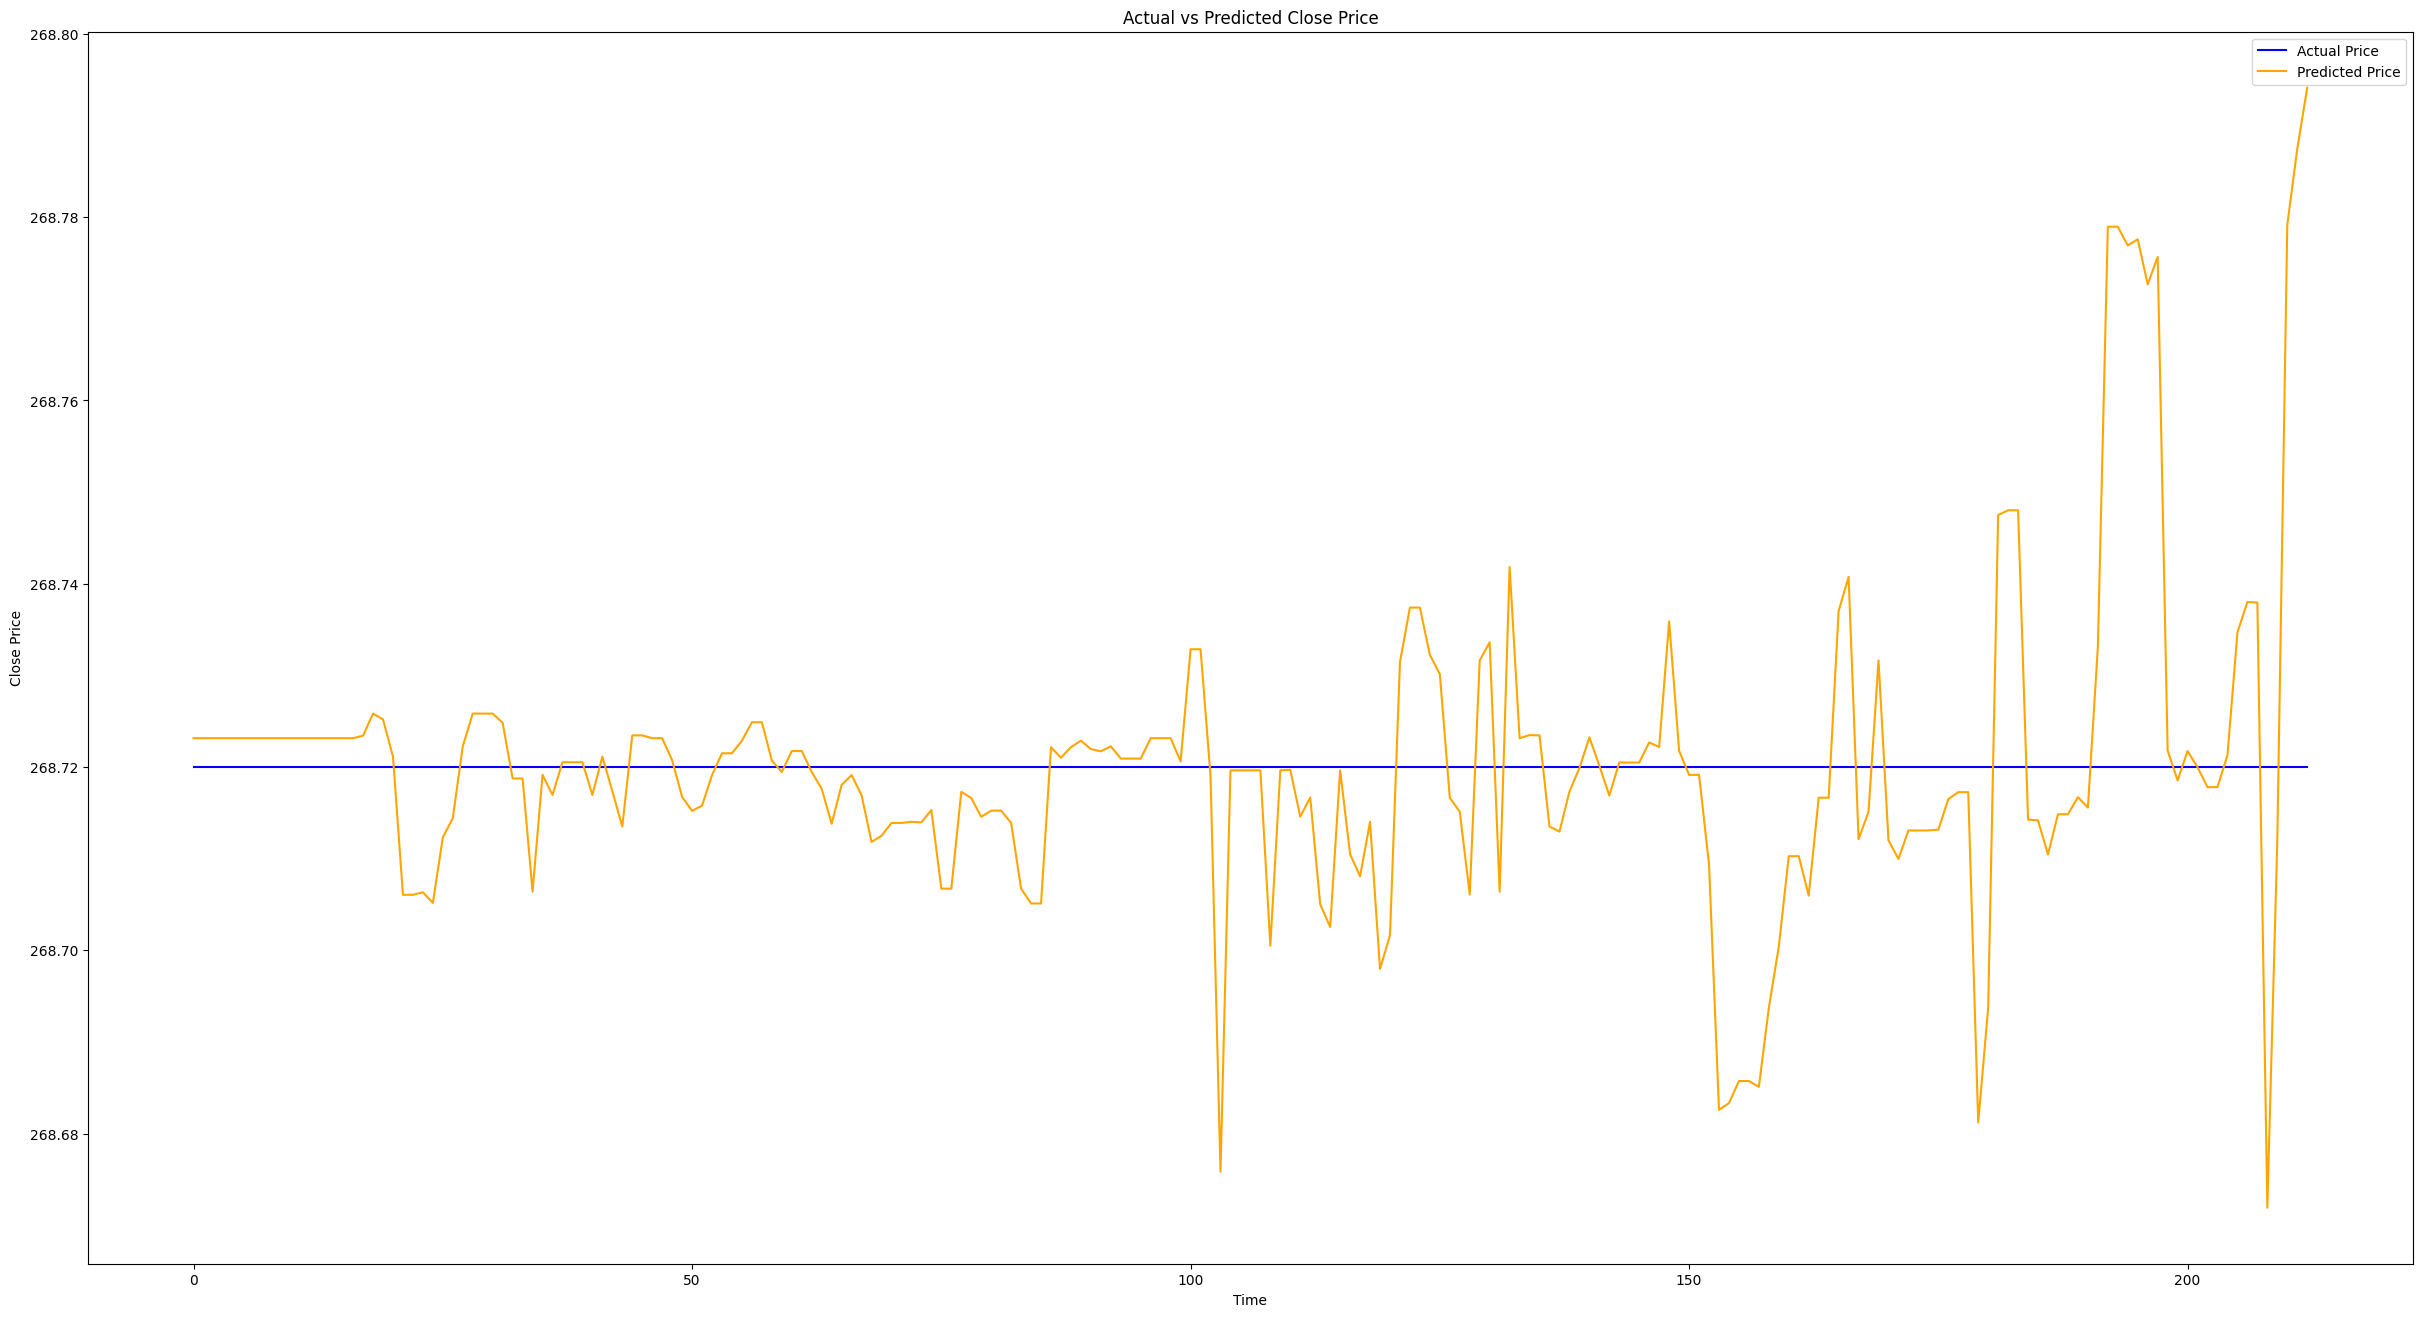

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  ETN 

Mean Squared Error: 0.00010652431517703365
Root Mean Squared Error (RMSE): 0.010321061727217489
R-squared: 0.0
Mean Squared Error: 0.00010652431517703365
Root Mean Squared Error (RMSE): 0.010321061727217489
Mean Squared Error: 0.00010652176406182034
Root Mean Squared Error (RMSE): 0.010320938138649042
R-squared: 0.0


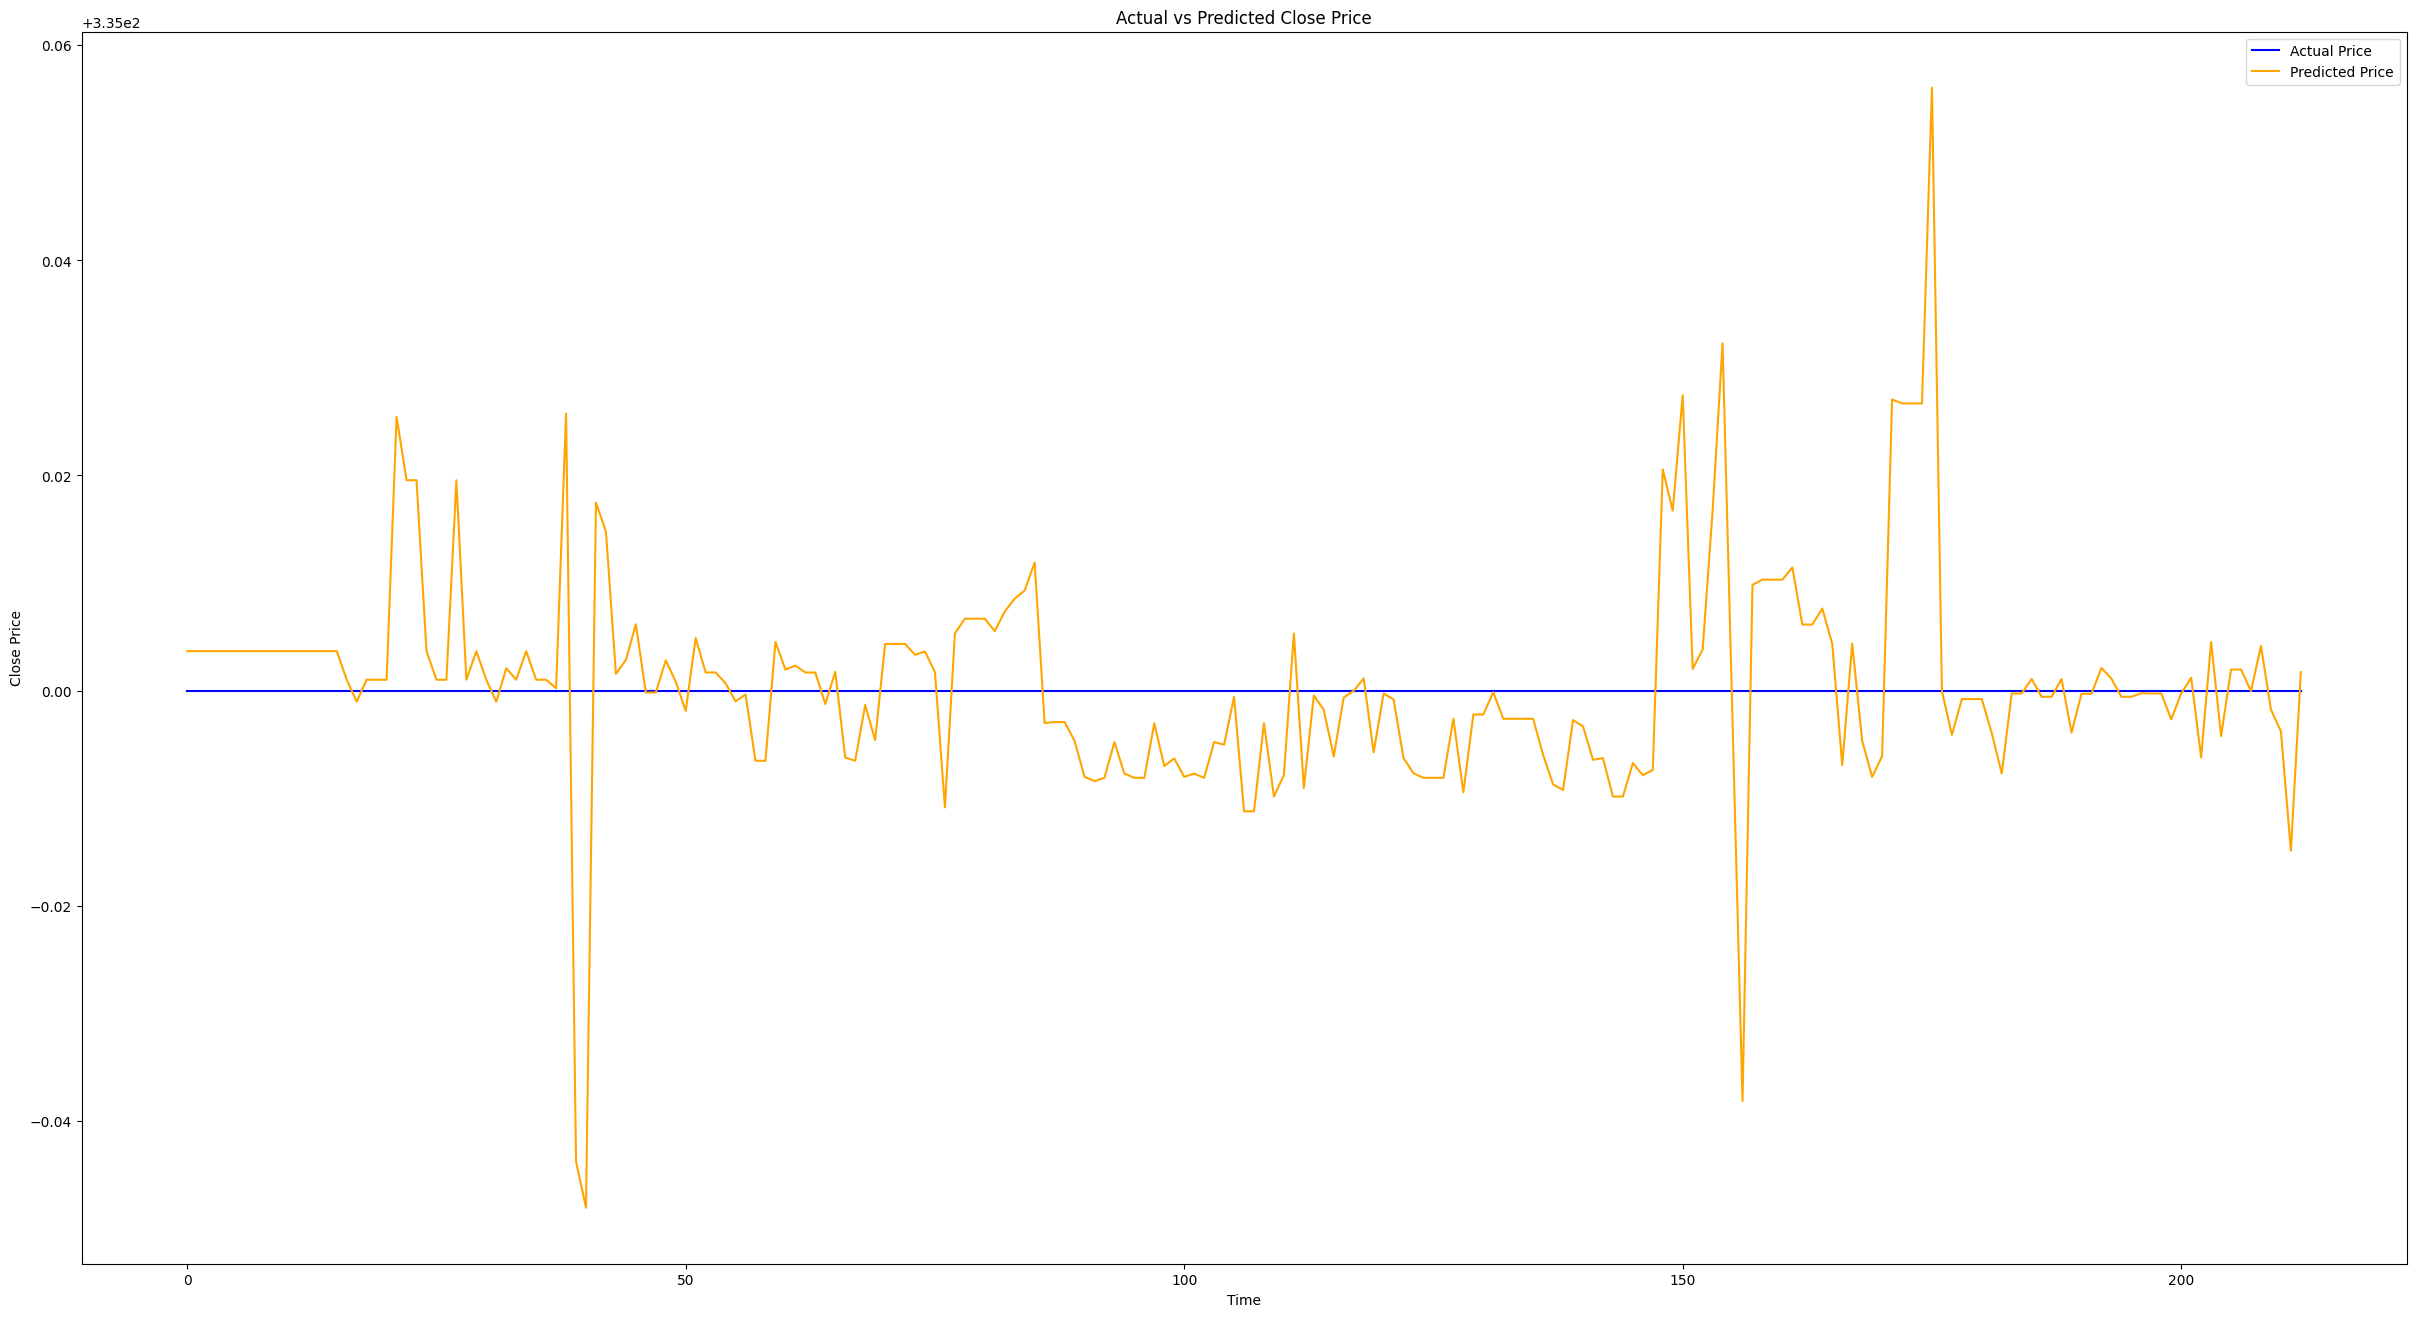

[*********************100%***********************]  1 of 1 completed
C:\Users\Nishc\AppData\Local\Temp\ipykernel_31968\2595796236.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['MACD'], data['MACD_signal'] = ta.macd(curr['Close']).iloc[:, [0, 1]].T.values



  SWK 

Mean Squared Error: 0.00030721293138022177
Root Mean Squared Error (RMSE): 0.017527490732566993
R-squared: 0.0
Mean Squared Error: 0.00030721293138022177
Root Mean Squared Error (RMSE): 0.017527490732566993
Mean Squared Error: 0.00030720464725641995
Root Mean Squared Error (RMSE): 0.01752725441295413
R-squared: 0.0


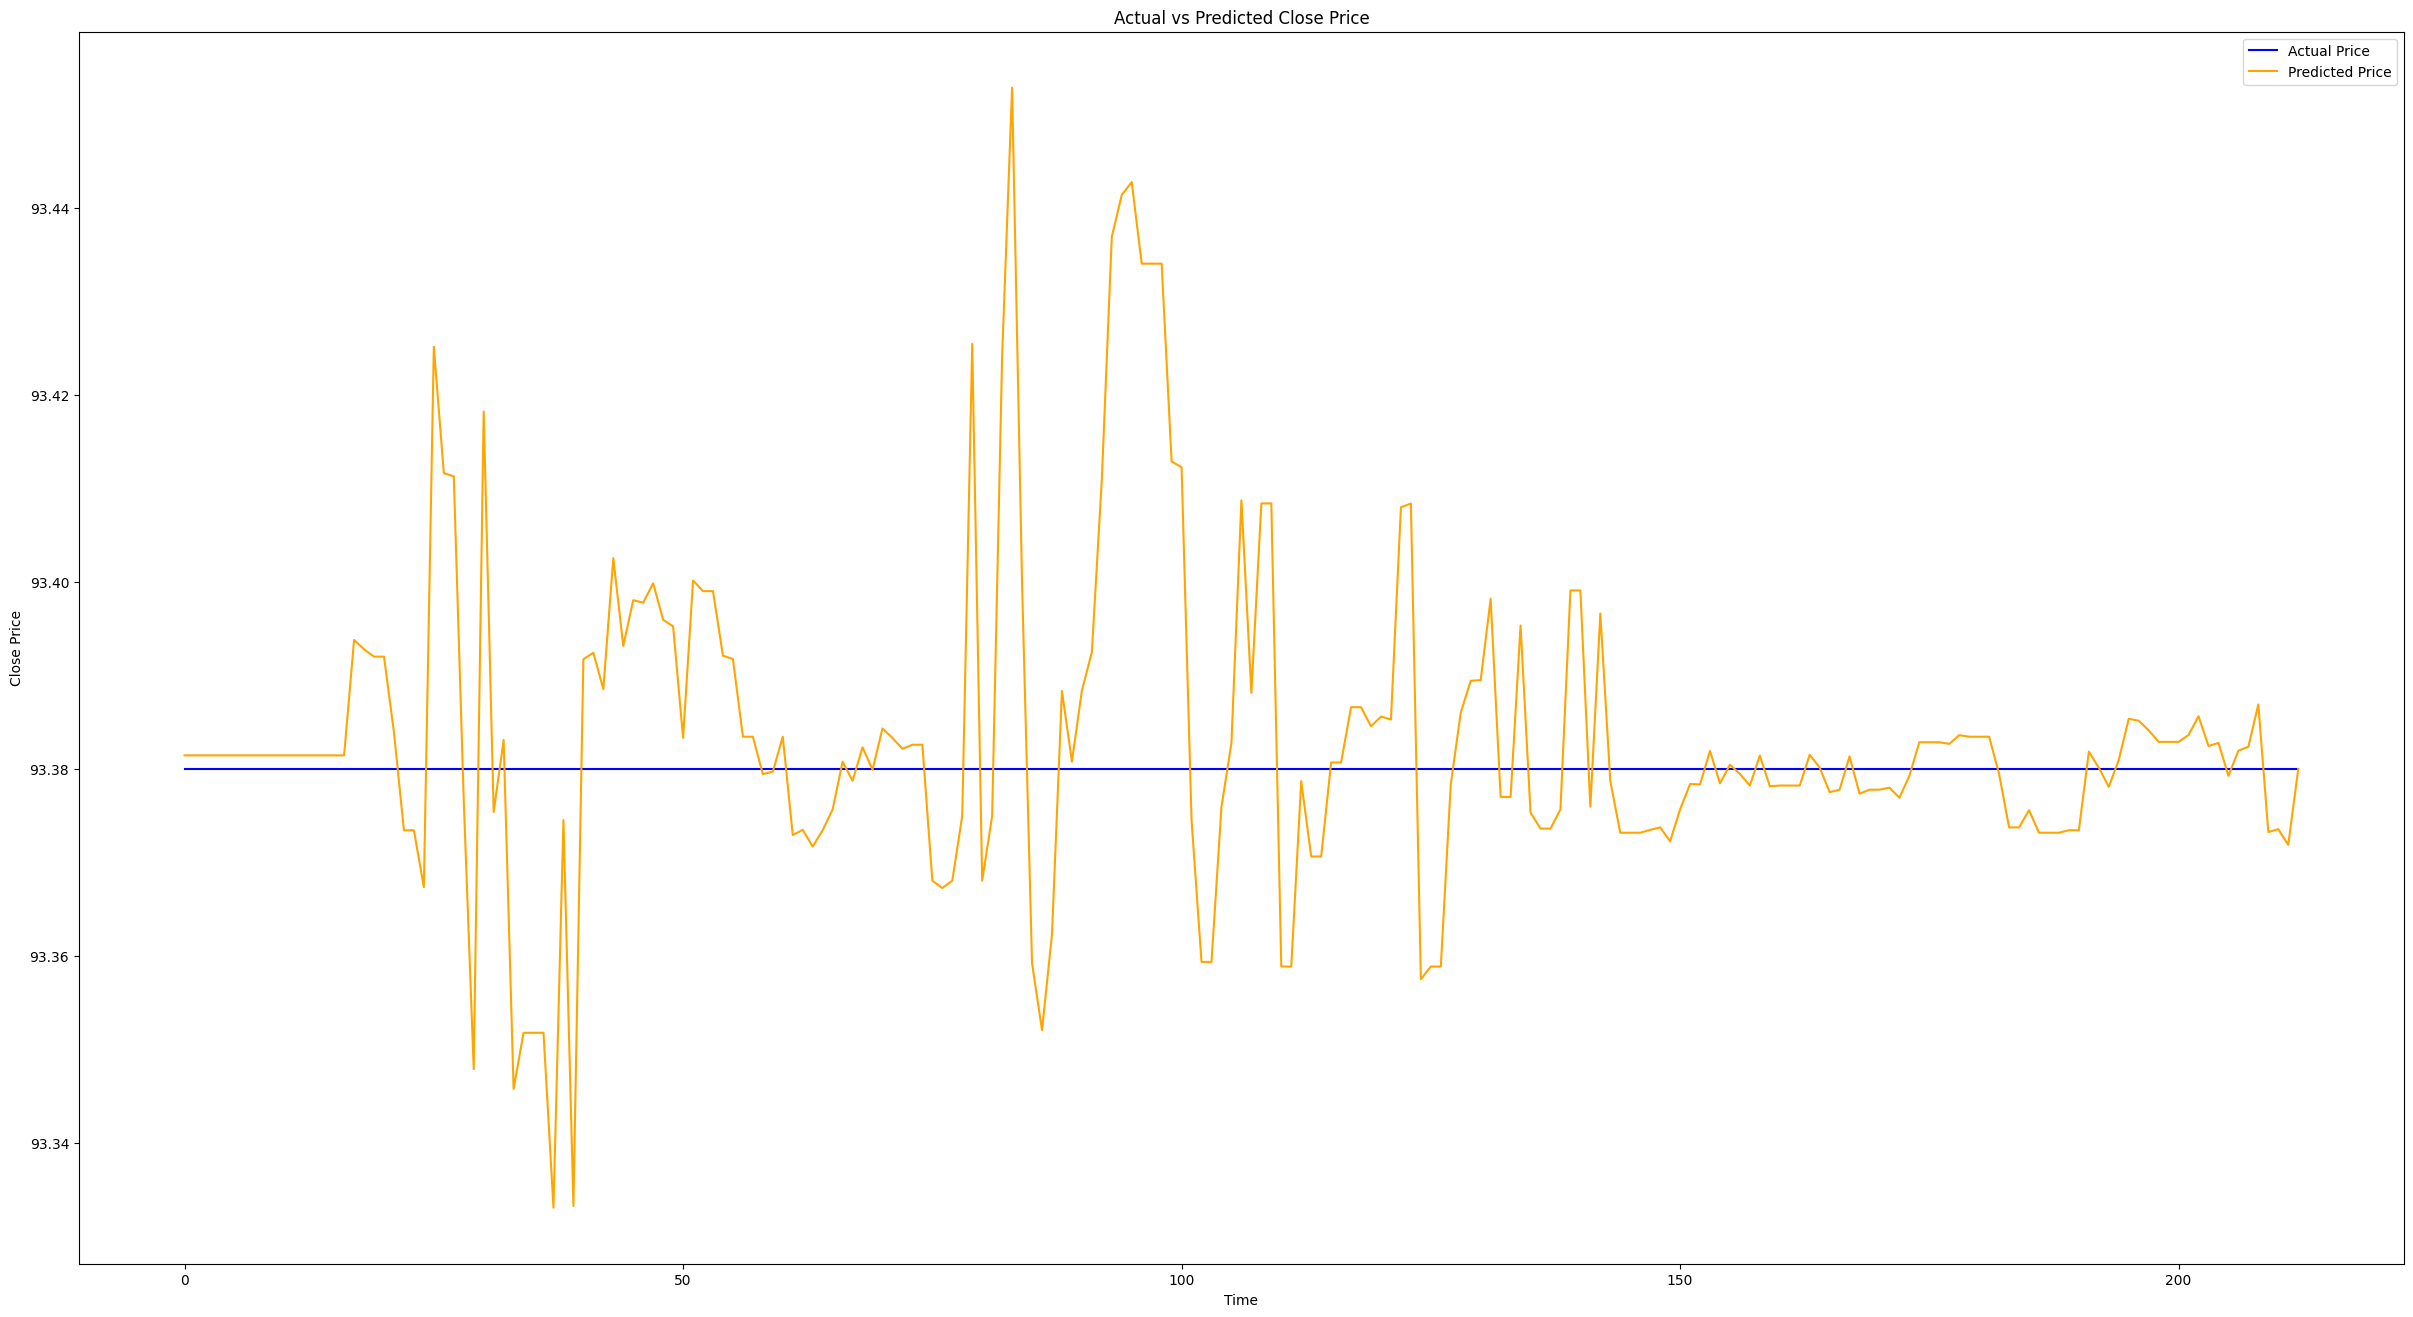

In [424]:
for i in companies:
    try:
        curr = yf.download(i, start='2024-01-01', end='2024-11-02')
        curr = curr.reset_index()
        curr.columns = [col[0] for col in curr.columns]
        curr.drop(columns=['Date'], inplace=True)
        empty_data = pd.DataFrame()
        result_df = calculate_tech_ind(curr, empty_data)
        scaled_data = result_df
        target = scaled_data[['Close']] 
        standard_scaler_close = StandardScaler()
        target_scaled = standard_scaler_close.fit_transform(target)
        input = scaled_data.drop(columns=['Low', 'Open','SMA15', 'BB_lower', 'BB_upper', 'Adj Close', 'Close', 'OBV'])
        y_pred = loaded_model.predict(input)

        print('\n ', i, '\n')
        mse = mean_squared_error(target_scaled, y_pred)
        print(f'Mean Squared Error: {mse}')

        rmse = np.sqrt(mse)
        print(f'Root Mean Squared Error (RMSE): {rmse}')

        # Optional: Calculate R-squared
        r2 = loaded_model.score(input, target_scaled)
        print(f'R-squared: {r2}')
        # Ensure y_pred and target are single-column DataFrames before reshaping
        y_pred_reshaped = pd.DataFrame(y_pred, columns=["Close"]).values.reshape(-1, 1)
        target_reshaped = pd.DataFrame(target_scaled, columns=["Close"]).values.reshape(-1, 1)

        mse = mean_squared_error(target_reshaped, y_pred_reshaped)
        print(f'Mean Squared Error: {mse}')

        rmse = np.sqrt(mse)
        print(f'Root Mean Squared Error (RMSE): {rmse}')

        # Perform inverse transformation
        y_pred_original = standard_scaler_close.inverse_transform(y_pred_reshaped)
        target_original = standard_scaler_close.inverse_transform(target_reshaped)

        # Plot the original vs. predicted values
        import matplotlib.pyplot as plt
        from sklearn.metrics import mean_squared_error
        import numpy as np

        mse = mean_squared_error(target_original, y_pred_original)
        rmse = np.sqrt(mse)
        print(f'Mean Squared Error: {mse}')
        print(f'Root Mean Squared Error (RMSE): {rmse}')
        print(f'R-squared: {r2}')

        plt.figure(figsize=(30, 16))
        plt.plot(target_original, label="Actual Price", color="blue")
        plt.plot(y_pred_original, label="Predicted Price", color="orange")
        plt.title("Actual vs Predicted Close Price")
        plt.xlabel("Time")
        plt.ylabel("Close Price")
        plt.legend()
        plt.show()


    except Exception as e:
        print(e, i)

In [ ]:
def final_pcas(data):
    feature_columns = ['Open', 'High', 'Low', 'SMA15', 'EMA5',
            'RSI15', 'BB_upper', 'BB_lower', 'OBV', 'ADX',
            'Aroon_Up', 'Aroon_Down']

    X = data[feature_columns]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=8)  
    X_pca = pca.fit_transform(X_scaled)

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)


    n_components_to_keep = np.argmax(cumulative_variance >= 0.90) 
    pca_final = PCA(n_components=n_components_to_keep)
    X_final = pca_final.fit_transform(X_scaled)

    pca_columns = [f'PC{i+1}' for i in range(n_components_to_keep)]
    pca_df = pd.DataFrame(data=X_final, columns=pca_columns)
    data = pd.DataFrame(data=data, columns=['MACD', 'MACD_signal', 'Close'])
    result_df = pd.concat([data.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

    return result_df


In [400]:
target = scaled_data[['Close']]  # Ensures 2D shape
standard_scaler_close = StandardScaler()
target_scaled = standard_scaler_close.fit_transform(target)

In [401]:
target_scaled

array([[1.73337069],
       [2.24009981],
       [2.23319572],
       ...,
       [0.50175725],
       [0.50175725],
       [0.50175725]])

In [402]:

input = scaled_data.drop(columns=['Low', 'Open','SMA15', 'BB_lower', 'BB_upper', 'Adj Close', 'Close', 'OBV'])

In [403]:
#input['H-L'] = input['High'] - input['Low']

In [404]:
from joblib import load

loaded_model = load('model_reg.joblib')

In [405]:
target

Close
0     39.480000
1     43.150002
2     43.099998
3     42.740002
4     41.389999
...         ...
1341  30.559999
1342  30.559999
1343  30.559999
1344  30.559999
1345  30.559999

[1346 rows x 1 columns]

In [406]:
target_scaled

array([[1.73337069],
       [2.24009981],
       [2.23319572],
       ...,
       [0.50175725],
       [0.50175725],
       [0.50175725]])

In [407]:
y_pred = loaded_model.predict(input)

# Evaluate the model performance
mse = mean_squared_error(target_scaled, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Optional: Calculate R-squared
r2 = loaded_model.score(input, target_scaled)
print(f'R-squared: {r2}')

print('\n ', y_pred, '\n', target_scaled)

Mean Squared Error: 0.03402988351670905
Root Mean Squared Error (RMSE): 0.18447190441015415
R-squared: 0.965970116483291

  [1.9265091 1.9265091 1.9265091 ... 0.6017519 0.6017519 0.6017519] 
 [[1.73337069]
 [2.24009981]
 [2.23319572]
 ...
 [0.50175725]
 [0.50175725]
 [0.50175725]]


In [408]:
len(y_pred)

1346

Mean Squared Error: 0.03402988351670905
Root Mean Squared Error (RMSE): 0.18447190441015415
Mean Squared Error: 1.7850129628989244
Root Mean Squared Error (RMSE): 1.3360437728229282
R-squared: 0.965970116483291


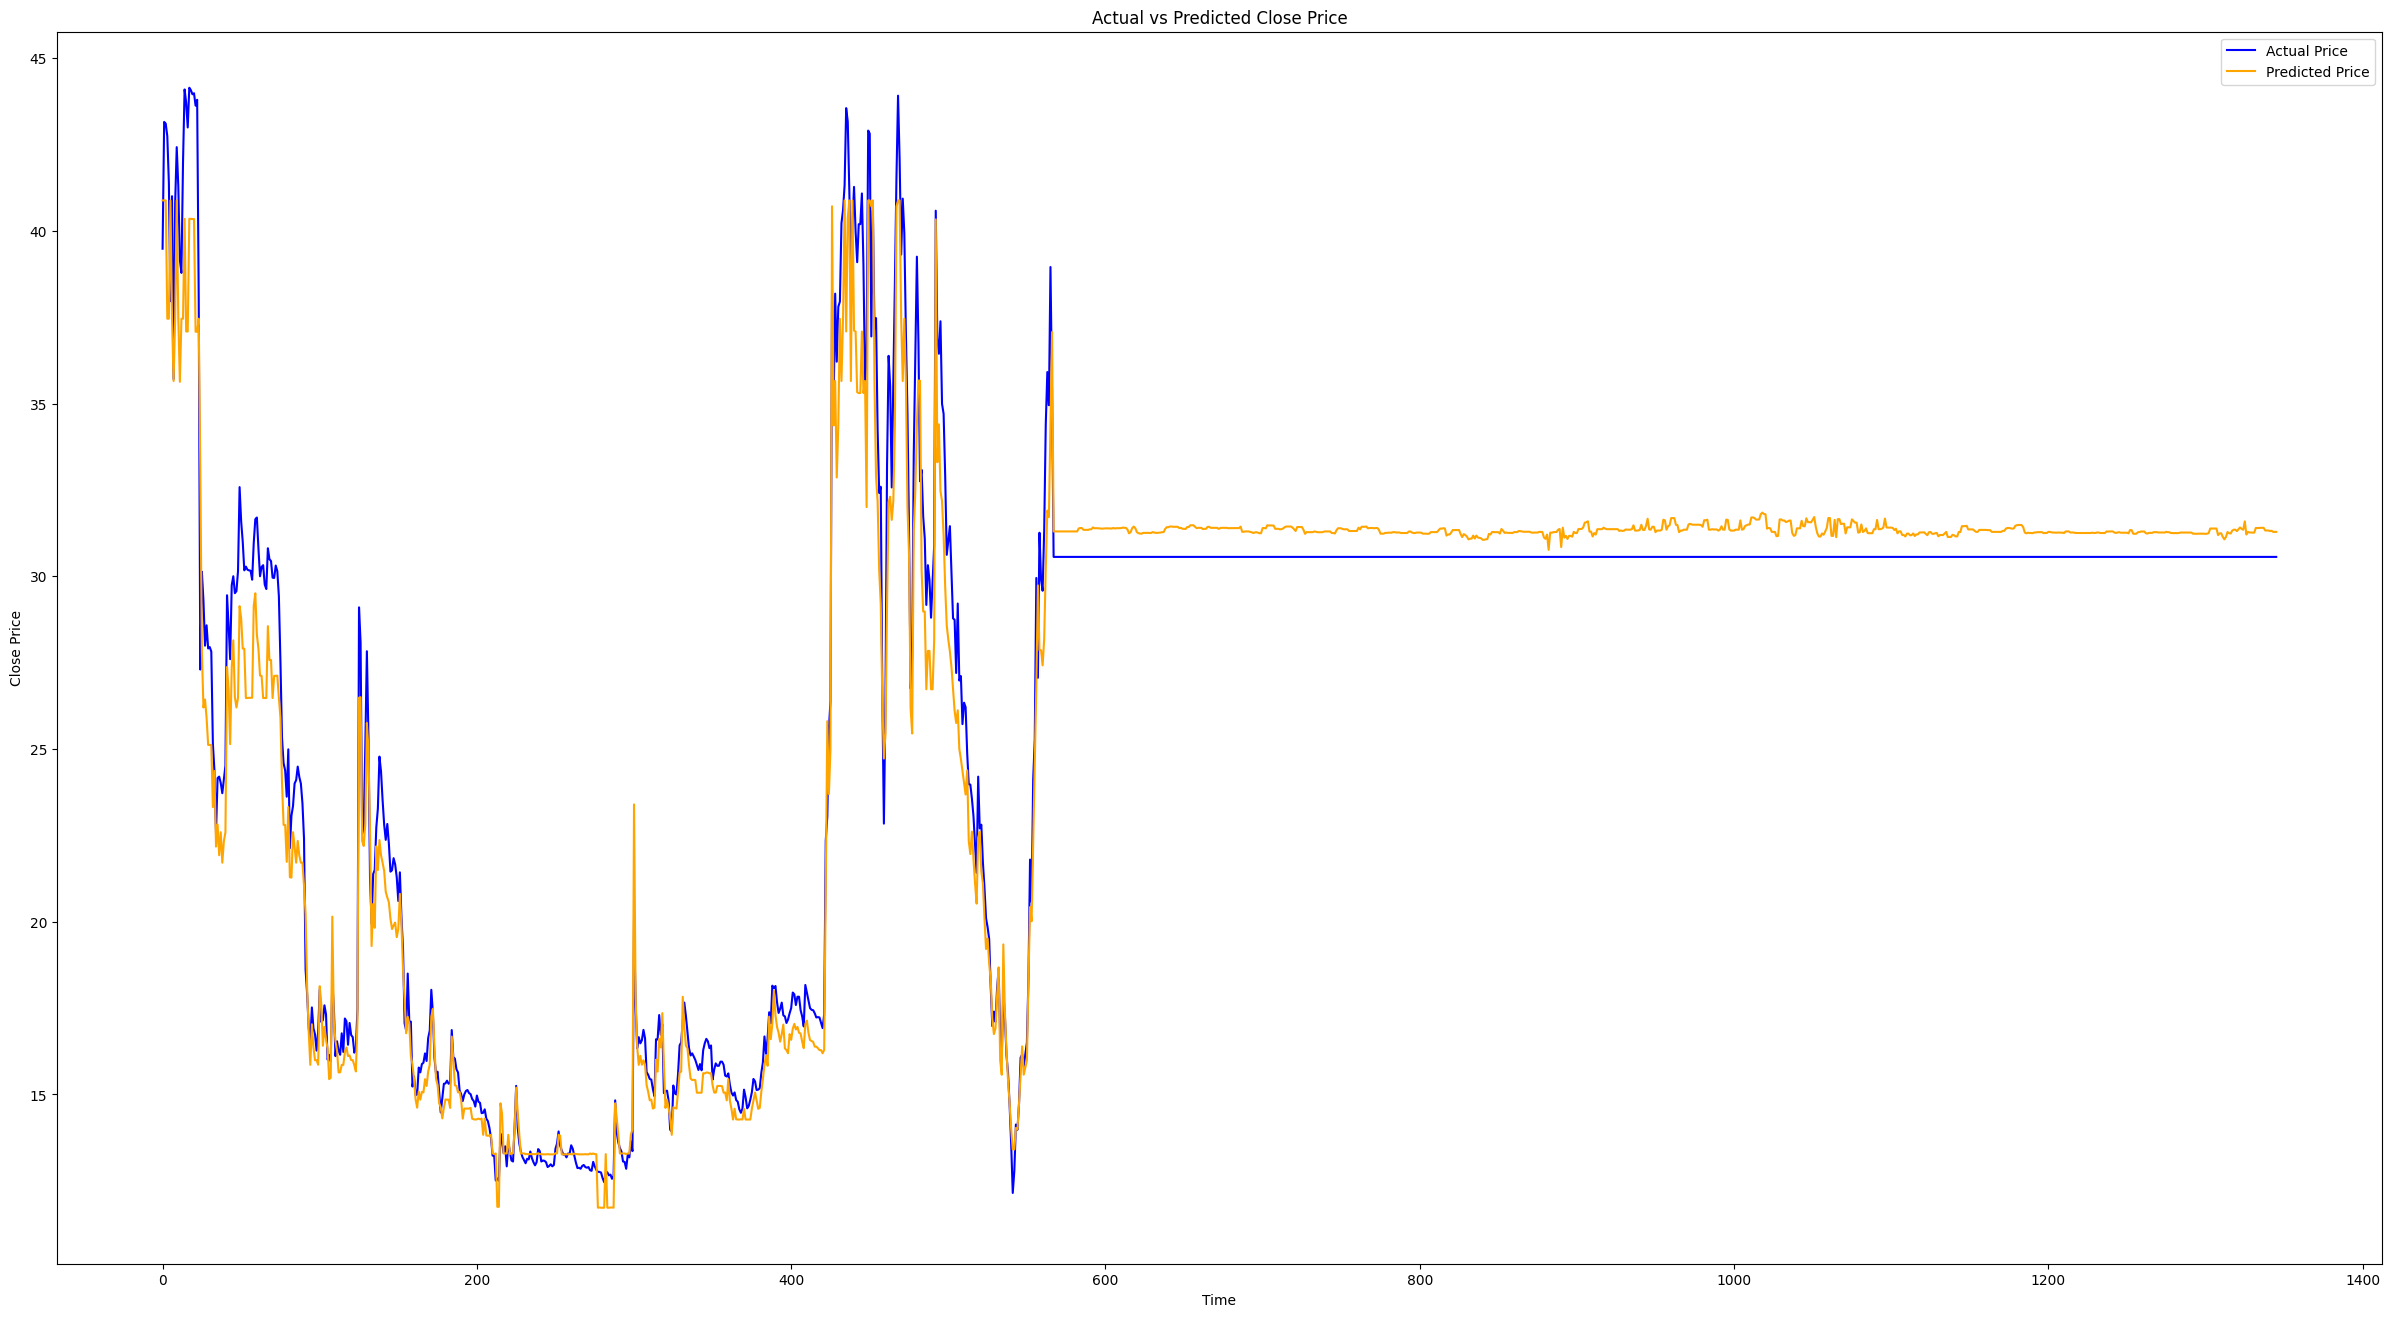

In [409]:
# Ensure y_pred and target are single-column DataFrames before reshaping
y_pred_reshaped = pd.DataFrame(y_pred, columns=["Close"]).values.reshape(-1, 1)
target_reshaped = pd.DataFrame(target_scaled, columns=["Close"]).values.reshape(-1, 1)

mse = mean_squared_error(target_reshaped, y_pred_reshaped)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Perform inverse transformation
y_pred_original = standard_scaler_close.inverse_transform(y_pred_reshaped)
target_original = standard_scaler_close.inverse_transform(target_reshaped)

# Plot the original vs. predicted values
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(target_original, y_pred_original)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(30, 16))
plt.plot(target_original, label="Actual Price", color="blue")
plt.plot(y_pred_original, label="Predicted Price", color="orange")
plt.title("Actual vs Predicted Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()
